# LAPTOP PRICE PREDICTION

### 📌 PROBLEM STATEMENT


SmartTech Co., a leading laptop manufacturing company, has partnered with our data science team to build a robust machine learning model capable of accurately predicting laptop prices. In a highly competitive and feature-rich market, determining the optimal price for a laptop based on its specifications is critical for maximizing profitability and staying ahead in the industry.

### 🎯 CLIENT OBJECTIVES


* **Accurate Pricing**: Develop a predictive model that estimates laptop prices based on technical and categorical features to support competitive pricing strategies.

* **Market Positioning**: Gain insights into how different specifications influence price, helping SmartTech Co. to strategically position its products in various market segments.

* **Brand Influence Analysis**: Evaluate the impact of brand reputation and perception on pricing trends to understand consumer behavior and market demand.

### ⚠️ Key Challenges

* **Specification Diversity**: The dataset includes laptops with a wide range of specifications, which poses a challenge in building a model that generalizes well across varying configurations.

* **Real-time Predictive Capability**: The model should be adaptable for predicting prices of newly launched laptops, keeping up with the rapidly evolving tech market.

* **Model Interpretability:** The solution must be interpretable and transparent, allowing SmartTech Co. to understand the reasoning behind each prediction and make informed business decisions.

## I. IMPORTING LIBRARIES

In [954]:
# Libraries for data exploration and ploting 
import numpy as np  # Initial use III. data cleaning --> 3.improving data quality --> D) cleaning memory feature np.nan
import pandas as pd # Initial use II. data exploration --> pd.read(....)
np.random.seed(42)
import matplotlib.pyplot as plt # Initial use III. data cleaning --> 6. outlier treatmen --> plt.figure()
import re # Inital use III. data cleaning --> 3.improving data quality --> D) cleaning memory feature re.search(....)
%matplotlib inline
import seaborn as sns # Inital use  III. data cleaning --> 6. outlier treatment --> sns.boxplot()

import warnings 
warnings.filterwarnings('ignore') #--> comment this line to see the warnings raised 

In [955]:
# Libraries used for Hypothesis testing 
from scipy.stats import spearmanr,pearsonr # Initial use V. feature engineering -->2. hypothesis testing --> A) corr analysis
from scipy.stats import shapiro # Initial use V. feature engineering -->2. hypothesis testing --> A) corr analysis 
from scipy.stats import levene # Initial use V. feature engineering -->2. hypothesis testing --> B) ttest
from scipy.stats import ttest_ind # Initial use V. feature engineering -->2. hypothesis testing --> B) ttest
from scipy.stats import f_oneway # Initial use V. feature engineering -->2. hypothesis testing --> C) anova test 
import pingouin as pg # Initial use V. feature engineering -->2. hypothesis testing --> C) anova test --> pg.welch_anova(.....)

In [956]:
# Machine Learning Libraries
from sklearn.preprocessing import OrdinalEncoder # Initial use VI. initial assessment --> 1.encoding 
from sklearn.preprocessing import StandardScaler #Inital use VI. initial assessment --> 3.scaling 
from sklearn.model_selection import train_test_split #Inital use VI. initial assessment --> 4.data partitioning
from sklearn.linear_model import LinearRegression #Initial use VI. initial assessment --> 5.model selection
from sklearn.neighbors import KNeighborsRegressor #Initial use VI. initial assessment --> 5.model selection
from sklearn.tree import DecisionTreeRegressor #Initial use VI. initial assessment --> 5.model selection
from sklearn.ensemble import RandomForestRegressor #Initial use VI. initial assessment --> 5.model selection
from sklearn.svm import SVR #Initial use VI. initial assessment --> 5.model selection
from xgboost import XGBRegressor #Initial use VI. initial assessment --> 5.model selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error #Initial use VI. initial assessment --> 5.model selection
from sklearn.model_selection import cross_val_score,cross_validate # Initial use VI. initial assessment --> 6.graphical representation

from sklearn.model_selection import KFold # Initial use VII. preparing data --> 1. encoding --> b. leakage free target mean encoding


from sklearn.feature_selection import RFE # Initial use VIII. comprehensive feature selection --> 1. wrapper method
from sklearn.model_selection import cross_validate # Initial use VIII. comprehensive feature selection --> 1. wrapper method
from sklearn.inspection import permutation_importance # Initial use VIII. comprehensive feature selection --> 2. feature importance analysis --> C) permutation importance
import shap # Initial use VIII. comprehensive feature selection --> 2. feature importance analysis --> D) shapely additive explanantion 


from sklearn.model_selection import GridSearchCV # Initial use IX. model implementation --> 1. hyperparameter tuning 
from sklearn.inspection import PartialDependenceDisplay # Initial use IX. model implementation --> 3. model interpretation --> D) partial....
from xgboost import plot_tree # Initial use IX. model implementation --> 3. model interpretation --> E) Tree plot 



In [957]:
# Model saving and interface
import joblib # Initial use X. saving,loading and verifying the model -->1.saving the model 
import gradio as gr # Initial use XI MODEL INTERFACE

## II. DATA LOADING &  EXPLORARTION

In [958]:
df = pd.read_csv("laptop.csv")
print(df.shape)
df.head()

(1303, 13)


Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

         Price  
0   71378.6832  
1   47895.5232  
2   30636.0000  
3  135195.3360  
4   96095.8080

In [959]:
# i don't need first 2 columns removing them 
try:
    df = df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])
    df.columns = df.columns.str.lower()
    print('The unnecessary columns are removed')
except: 
    print('Error raised because the columns are already removed')
print(df.shape)
df.head()

The unnecessary columns are removed
(1303, 11)


company   typename inches                    screenresolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          cpu   ram               memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            gpu  opsys  weight        price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [960]:
# info of the columns to find null objects 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1273 non-null   object 
 1   typename          1273 non-null   object 
 2   inches            1273 non-null   object 
 3   screenresolution  1273 non-null   object 
 4   cpu               1273 non-null   object 
 5   ram               1273 non-null   object 
 6   memory            1273 non-null   object 
 7   gpu               1273 non-null   object 
 8   opsys             1273 non-null   object 
 9   weight            1273 non-null   object 
 10  price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [961]:
# descriptive stats 
df.describe()

price
count    1273.000000
mean    59955.814073
std     37332.251005
min      9270.720000
25%     31914.720000
50%     52161.120000
75%     79333.387200
max    324954.720000

**OBSERVATIONS:**
1. Column Summary:

    * The dataset contains 11 columns in total.

    * Based on the business objective, price is the dependent variable (target), and the other 10 columns are independent variables (features).

2. Data Types (based on business logic):

    * Categorical (Nominal): `company, typename, opsys, cpu, gpu`

    * Continuous Numerical: `inches, weight, price`

    * Discrete Numerical: `ram, memory` – with Memory potentially split further based on storage type (e.g., SSD, HDD).

    * Derived Continuous Feature: `screenresolution` → to extract ppi (Pixels Per Inch) later.

3. Data Type Mismatch:

    * All columns (except price) are stored as object type in the DataFrame.

    * This requires conversion to appropriate data types (e.g., numerical, categorical) for analysis and modeling.

4. Null Values Insight:

    * Although .info() shows 30 missing entries per column, these missing values are uniform across all columns.

    * This suggests that the last 30 rows of the dataset are completely empty, likely due to blank rows present at the bottom of the CSV file, rather than partial missing values within the data.
5. Target Variable Description:
    * The standard deviation is ₹37K, which is ~60% of the mean (₹59K) — indicating high variability in laptop prices.
    * Median (₹52K) < Mean (₹59K) and the IQR is large (₹79K - ₹32K = ₹47K), with a maximum value of ₹325K.
    * These stats indicate a right-skewed distribution (not left), likely due to high-end outliers.
    * Further visual exploration and handling are addressed in the **Outlier Treatment** section.



## III. DATA CLEANING FOR EDA

### 1. HANDLING MISSING VALUES

In [962]:
# initially dropping null columns because there exist 30 rows that are actually empty
print('Null values before treating:\n',df.isnull().sum())
# The null value columns
df[df.isnull().any(axis=1)]


Null values before treating:
 company             30
typename            30
inches              30
screenresolution    30
cpu                 30
ram                 30
memory              30
gpu                 30
opsys               30
weight              30
price               30
dtype: int64


company typename inches screenresolution  cpu  ram memory  gpu opsys  \
20       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
46       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
50       NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
115      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
125      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
148      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
190      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
209      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
267      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
336      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
350      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
478      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
567      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
616      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
625      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
629      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
666      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
699      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
726      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
747      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
753      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
774      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
922      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
923      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
938      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
978      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
994      NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
1060     NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
1202     NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   
1245     NaN      NaN    NaN              NaN  NaN  NaN    NaN  NaN   NaN   

     weight  price  
20      NaN    NaN  
46      NaN    NaN  
50      NaN    NaN  
115     NaN    NaN  
125     NaN    NaN  
148     NaN    NaN  
190     NaN    NaN  
209     NaN    NaN  
267     NaN    NaN  
336     NaN    NaN  
350     NaN    NaN  
478     NaN    NaN  
567     NaN    NaN  
616     NaN    NaN  
625     NaN    NaN  
629     NaN    NaN  
666     NaN    NaN  
699     NaN    NaN  
726     NaN    NaN  
747     NaN    NaN  
753     NaN    NaN  
774     NaN    NaN  
922     NaN    NaN  
923     NaN    NaN  
938     NaN    NaN  
978     NaN    NaN  
994     NaN    NaN  
1060    NaN    NaN  
1202    NaN    NaN  
1245    NaN    NaN

In [963]:
df = df.dropna() 
print('Total Null values after treating: ',df.isnull().sum().sum())
# Resseting Index
print('Length of the dataframe',df.shape)
# resetting indeX
df = df.reset_index(drop = True)
df.head()

Total Null values after treating:  0
Length of the dataframe (1273, 11)


company   typename inches                    screenresolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          cpu   ram               memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            gpu  opsys  weight        price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

* As assumed it is clear that 30 rows are null rows but instead at the end of csv file the lies at various position 
* we have directly dropped the missing rows using (df.dropna()). The length of the dataframe after dropping null values is 1273 rows

### 2. DATA DEDUPLICATION

In [964]:
print('Total of original rows that have duplicates in the dataframe: ',df.duplicated(keep=False).sum()-df.duplicated().sum())
print('Total duplicate rows in the dataframe: ',df.duplicated().sum())
print('Total of original rows and their duplicates in the dataframe: ',df.duplicated(keep=False).sum())
df[df.duplicated(keep=False)].sort_values(by = ['company','typename','inches','cpu'])

Total of original rows that have duplicates in the dataframe:  14
Total duplicate rows in the dataframe:  29
Total of original rows and their duplicates in the dataframe:  43


company            typename inches  \
1233    Acer            Notebook   15.6   
1247    Acer            Notebook   15.6   
1261    Acer            Notebook   15.6   
1144    Asus            Notebook   15.6   
1244    Asus            Notebook   15.6   
1258    Asus            Notebook   15.6   
1272    Asus            Notebook   15.6   
1239    Asus            Notebook   15.6   
1253    Asus            Notebook   15.6   
1267    Asus            Notebook   15.6   
1231    Asus           Ultrabook   13.3   
1245    Asus           Ultrabook   13.3   
1259    Asus           Ultrabook   13.3   
1234    Dell            Notebook   15.6   
1248    Dell            Notebook   15.6   
1262    Dell            Notebook   15.6   
1232    Dell            Notebook   15.6   
1246    Dell            Notebook   15.6   
1260    Dell            Notebook   15.6   
1237    Dell            Notebook   15.6   
1251    Dell            Notebook   15.6   
1265    Dell            Notebook   15.6   
1238      HP             Netbook   11.6   
1252      HP             Netbook   11.6   
1266      HP             Netbook   11.6   
1236      HP            Notebook   15.6   
1250      HP            Notebook   15.6   
1264      HP            Notebook   15.6   
1243      HP            Notebook   15.6   
1257      HP            Notebook   15.6   
1271      HP            Notebook   15.6   
1241  Lenovo  2 in 1 Convertible   13.3   
1255  Lenovo  2 in 1 Convertible   13.3   
1269  Lenovo  2 in 1 Convertible   13.3   
1240  Lenovo  2 in 1 Convertible     14   
1254  Lenovo  2 in 1 Convertible     14   
1268  Lenovo  2 in 1 Convertible     14   
1242  Lenovo            Notebook     14   
1256  Lenovo            Notebook     14   
1270  Lenovo            Notebook     14   
1235  Lenovo            Notebook   15.6   
1249  Lenovo            Notebook   15.6   
1263  Lenovo            Notebook   15.6   

                                screenresolution  \
1233                                    1366x768   
1247                                    1366x768   
1261                                    1366x768   
1144                                    1366x768   
1244                                    1366x768   
1258                                    1366x768   
1272                                    1366x768   
1239                                    1366x768   
1253                                    1366x768   
1267                                    1366x768   
1231                 IPS Panel Full HD 1920x1080   
1245                 IPS Panel Full HD 1920x1080   
1259                 IPS Panel Full HD 1920x1080   
1234                                    1366x768   
1248                                    1366x768   
1262                                    1366x768   
1232                                    1366x768   
1246                                    1366x768   
1260                                    1366x768   
1237                                    1366x768   
1251                                    1366x768   
1265                                    1366x768   
1238                                    1366x768   
1252                                    1366x768   
1266                                    1366x768   
1236                           Full HD 1920x1080   
1250                           Full HD 1920x1080   
1264                           Full HD 1920x1080   
1243                                    1366x768   
1257                                    1366x768   
1271                                    1366x768   
1241  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1255  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1269  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1240   IPS Panel Full HD / Touchscreen 1920x1080   
1254   IPS Panel Full HD / Touchscreen 1920x1080   
1268   IPS Panel Full HD / Touchscreen 1920x1080   
1242                                    1366x768   
1256                                    1366x768   
1270                            

In [965]:
# The above duplicates need to be dropped
df = df.drop_duplicates() 
print('Total duplicate values in the dataframe after cleaning: ',df.duplicated().sum())
print('Length of the dataframe',df.shape)
# resetting indeX
df = df.reset_index(drop = True)
df.head()

Total duplicate values in the dataframe after cleaning:  0
Length of the dataframe (1244, 11)


company   typename inches                    screenresolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          cpu   ram               memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            gpu  opsys  weight        price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [966]:
print('total of original rows and duplicate rows excluding price column',df[df.columns.difference(['price'])].duplicated(keep=False).sum())
print('total of duplicate rows excluding price column',df.drop('price',axis=1).duplicated().sum())
print('total of original rows that have duplicates with varying prices',df.drop('price',
                        axis=1).duplicated(keep=False).sum() - df.drop('price',axis=1).duplicated().sum())

# Finding duplicates excluding price column
duplicates_all_except_price = df[df.duplicated(subset=df.columns.difference(['price']), keep=False)]

# Group by all columns except 'Price' and filter groups with multiple different 'Price' values
price_conflicts = (
    duplicates_all_except_price
    .groupby(list(df.columns.difference(['price'])))
    .filter(lambda x: x['price'].nunique() > 1)
)

# sorting the results to view the columns with price conflicts
price_conflicts = price_conflicts.sort_values(by=list(df.columns))


total of original rows and duplicate rows excluding price column 78
total of duplicate rows excluding price column 39
total of original rows that have duplicates with varying prices 39


In [967]:
# Example groupby keys — change based on your dataset
group_cols = list(df.columns.difference(['price']))

# Step 1: Compute price range within each group
price_range = df.groupby(group_cols)['price'].agg(['min', 'max']).reset_index()
price_range['price_diff'] = price_range['max'] - price_range['min']
price_range[price_range['price_diff']!=0]['price_diff'].describe()


count       39.000000
mean      5905.883077
std       4857.536146
min        137.995200
25%       2492.704800
50%       4488.307200
75%       8398.792800
max      16783.200000
Name: price_diff, dtype: float64

In [968]:
# Threshold for price conflict so that our ML model doesn't confuse
threshold = 3000  
# Step 2: Split groups based on threshold
mild_conflict_groups = price_range[price_range['price_diff'] <= threshold][group_cols]
high_conflict_groups = price_range[price_range['price_diff'] > threshold][group_cols]
print(f'Total groups (unique rows excluding price) whose price conflict is less than {threshold} rs/- : ',len(mild_conflict_groups))
print(f'Total groups (unique rows excluding price) whose price conflict is greater than {threshold} rs/- : ',len(high_conflict_groups))
# # Step 3: Keep mild conflicts as-is
df_mild = df.merge(mild_conflict_groups, on=group_cols, how='inner')
print(len(df_mild))
# # Step 4: Aggregate high conflict groups (e.g., take median price and first of other features)
df_high = df.merge(high_conflict_groups, on=group_cols, how='inner')

df_high_agg = df_high.groupby(group_cols).agg({
    'price': 'median', # in our case even mean works as there are only two price conflict rows for each group (39*2)
}).reset_index()
df_high_agg

# # Step 5: Combine both sets
df = pd.concat([df_mild, df_high_agg], ignore_index=True)
print('Length of the dataframe',df.shape)
# resetting indeX
df = df.reset_index(drop = True)
df.head()

Total groups (unique rows excluding price) whose price conflict is less than 3000 rs/- :  1180
Total groups (unique rows excluding price) whose price conflict is greater than 3000 rs/- :  25
1194
Length of the dataframe (1219, 11)


company   typename inches                    screenresolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          cpu   ram               memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            gpu  opsys  weight        price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [969]:
# # use this code cell for completely removing price conflict columns
# df = (
#     df.groupby(df.columns.difference(['price']).tolist())
#       .agg({'price': 'median'})  # or mean
#       .reset_index()
# )
# print('Length of the dataframe',df.shape)
# # resetting indeX
# df = df.reset_index(drop = True)
# df.head()

**📌 OBSERVATIONS ON DUPLICATES AND PRICE CONFLICTS**

1. 🔁 Duplicates
- A total of **29 duplicate rows** were identified across **14 unique instances** (i.e., duplicate groups).
- These were removed using `df.drop_duplicates()`, ensuring that **exact row-level duplicates** (including price) are eliminated.

---

2. 🔀 Price Conflicts (Feature Duplicates with Varying Prices)
- Price conflicts refer to rows with **identical features** but **different prices**.
- After thorough inspection, most price differences were **minor and within acceptable limits**, though a few rows showed **significant variation**.
- Based on this, a decision was made to **partially retain** and **partially aggregate** the conflicting rows using a **hybrid approach**.

---

**✅ Pros of Keeping Price Conflicts**
- The model becomes **more robust** to natural price fluctuations and noise.
- Retaining variations can help the model **generalize better** to real-world market variability.
- Captures the **imperfect nature of real-world pricing**, improving applicability in production environments.

---

**⚠️ Cons of Keeping Price Conflicts**
- Conflicting prices for identical features may **confuse the model**, reducing its ability to learn a clear price-function mapping.
- Increased **error variance** due to spread in target values can negatively impact **RMSE/MAE**.
- The model may **overfit to one version** of a conflicting row, especially if both versions are present across train and validation/test splits.
- **Data leakage risk** arises if near-duplicate rows are split across training and test sets, leading to **artificially high performance**.

---

**⚖️ Hybrid Conflict Resolution Strategy**
- Out of **39 price conflict groups** (totaling **78 rows**):
  - **25 groups** had a **price difference > ₹3000** — these were **aggregated using the median price**.
  - **14 groups** had a **price difference ≤ ₹3000** — these were **retained as-is**, as the variation is considered within acceptable noise limits.
- The threshold of ₹3000 was chosen based on the 25th percentile (₹2492), ensuring we focus aggregation on conflicts with more than mild price variation.

---

**📊 Final Data Shape**
- Original rows: **1273**
- Rows removed due to exact duplicates: **29**
- Rows removed due to price conflict aggregation: **25**
- **Final dataset size: 1219 rows**

### 3. DATA QUALITY FIXES & FEATURE EXTRACTION

In [970]:
df_edit = df.copy()
df_edit.head()

company   typename inches                    screenresolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          cpu   ram               memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            gpu  opsys  weight        price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

#### A) CLEANING `Inches` FEATURE

In [971]:
# Inches column 
print('Unique values in Inches column: \n',df_edit['inches'].unique(),'\n')
# There is an unusual data among the Inches column
print("Rows that contain unusal data: ")
df_edit[df_edit['inches']=='?']

Unique values in Inches column: 
 ['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1'] 

Rows that contain unusal data: 


company     typename inches   screenresolution  \
444    Dell  Workstation      ?  Full HD 1920x1080   

                             cpu  ram     memory                  gpu  \
444  Intel Core i7 7700HQ 2.8GHz  8GB  256GB SSD  Nvidia Quadro M1200   

          opsys  weight      price  
444  Windows 10  1.78kg  128298.24

In [972]:
# Mode value 
dell_workstation_inches_mode = df_edit[(df_edit['company']=='Dell')&(df_edit['typename']=='Workstation')]['inches'].mode()[0]
# Lets replace them with simple mode value 
df_edit['inches'] = df_edit['inches'].replace({"?":dell_workstation_inches_mode})
# print('Unique values in Inches column after treatment: \n',df_edit['Inches'].unique(),'\n')

# Converting the data type to float 
df_edit['inches'] = df_edit['inches'].astype('float')
print('inches column after type conversion to float: \n',df_edit['inches'])

inches column after type conversion to float: 
 0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1214    17.3
1215    17.3
1216    15.6
1217    15.6
1218    15.6
Name: inches, Length: 1219, dtype: float64


#### B) CLEANING `Weight` FEATURE

In [973]:
# Weight column 
print('Unique values in Weight column: \n',df_edit['weight'].unique(),'\n')

# There is an unusual data among the Inches column
print("Rows that contain unusal data: \n",)
df_edit[df_edit['weight']=='?']


Unique values in Weight column: 
 ['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg' '1.35kg'
 '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg' '2kg'
 '2.65kg' '2.77kg' '3.2kg' '1.49kg' '2.4kg' '2.13kg' '2.43kg' '1.7kg'
 '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg' '1.63kg'
 '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg' '1.58kg'
 '1.85kg' '1.23kg' '2.16kg' '2.36kg' '7.2kg' '2.05kg' '1.32kg' '1.75kg'
 '0.97kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg' '2.03kg' '1.05kg'
 '5.4kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg' '1.12kg'
 '3.49kg' '3.35kg' '2.23kg' '?' '4.42kg' '2.69kg' '2.37kg' '4.7kg' '3.6kg'
 '2.08kg' '4.3kg' '1.68kg' '1.41kg' '2.9kg' '4.14kg' '2.18kg' '2.24kg'
 '2.67kg' '4.1kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '5.8kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '8.23kg' '1.26kg'
 '1.84kg' '0.0002kg' '2.6kg' '2.26kg' '3.25kg

company   typename  inches   screenresolution                         cpu  \
195    Dell  Ultrabook    13.3  Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   

     ram     memory                     gpu       opsys weight     price  
195  8GB  256GB SSD  Intel UHD Graphics 620  Windows 10      ?  77202.72

In [974]:
dell_ultrabook_weight_mode = df_edit[(df_edit['company']=='Dell')&(df_edit['typename']=='Ultrabook')]['weight'].mode()[0]
# Lets replace them with null values 
df_edit['weight'] = df_edit['weight'].replace({"?":dell_ultrabook_weight_mode})
# print('Unique values in Weight column after treatment: \n',df_edit['Weight'].unique(),'\n')


# Removing the kg from the values and Converting the data type to float
try: 
    df_edit['weight'] = df_edit['weight'].str.replace("kg",'')
    print("Removed 'kg' string from weight column")
except: 
    print('Error raised as the column operation is already performed')

df_edit['weight'] = df_edit['weight'].astype('float')
print('Weight column after type conversion to float: \n',df_edit['weight'])

Removed 'kg' string from weight column
Weight column after type conversion to float: 
 0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1214    2.70
1215    2.70
1216    2.10
1217    2.00
1218    2.00
Name: weight, Length: 1219, dtype: float64


In [975]:
df_edit.loc[[201],:]

company  typename  inches   screenresolution                         cpu  \
201      HP  Notebook    14.0  Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   

     ram     memory                   gpu       opsys  weight     price  
201  8GB  256GB SSD  Nvidia GeForce 930MX  Windows 10    1.63  54931.68

#### C) CLEANING `Ram` FEATURE

In [976]:
# Ram column 
print('Unique values in Ram column: \n',df_edit['ram'].unique(),'\n')

# Removing the GB from the values and Converting the data type to int
try:
    df_edit['ram'] = df_edit['ram'].str.replace("GB",'')
    print("Removed 'GB' string from ram column")
except:
    print('Error raised as the column operations has already been performed')

df_edit['ram'] = df_edit['ram'].astype('float')
print('Ram column after type conversion to int: \n',df_edit['ram'])

Unique values in Ram column: 
 ['8GB' '16GB' '4GB' '2GB' '12GB' '64GB' '6GB' '32GB' '24GB' '1GB'] 

Removed 'GB' string from ram column
Ram column after type conversion to int: 
 0        8.0
1        8.0
2        8.0
3       16.0
4        8.0
        ... 
1214    16.0
1215     8.0
1216     4.0
1217     8.0
1218     8.0
Name: ram, Length: 1219, dtype: float64


#### D) CLEANING `Memory` FEATURE

In [977]:
df_edit['memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [978]:
df_edit[df_edit['memory']=='?']


company  typename  inches   screenresolution                         cpu  \
714    Dell  Notebook    15.6  Full HD 1920x1080  Intel Core i7 7500U 2.7GHz   

      ram memory                 gpu       opsys  weight       price  
714  16.0      ?  AMD Radeon R7 M445  Windows 10     2.3  62938.0656

In [979]:
dell_notebook_memory_mode =df_edit[(df_edit['company']=='Dell')&
                                    (df_edit['typename']=='Notebook')&
                                    (df_edit['ram']==16)]['memory'].mode()[0]
# Replacing '?' with mode of the data 
df_edit['memory'] = df_edit['memory'].replace({'?':dell_notebook_memory_mode})
df_edit.loc[[749],:]

company typename  inches       screenresolution  \
749    Dell   Gaming    15.6  4K Ultra HD 3840x2160   

                             cpu   ram     memory                         gpu  \
749  Intel Core i7 7700HQ 2.8GHz  16.0  512GB SSD  Nvidia GeForce GTX 1050 Ti   

          opsys  weight     price  
749  Windows 10    2.62  89457.12

In [980]:
def clean_memory(memory):
    if not isinstance(memory,str):
        return pd.Series([np.nan,np.nan,np.nan,np.nan,np.nan])
    memory_dict = {"ssd":0,"hdd":0,"flash":0,"hybrid":0}
    dual_memory = 0
    memory = memory.replace(" ","").lower() 
    memory_list = memory.split("+") 
    if len(memory_list)>1:
        dual_memory = 1 
    for memory_val in memory_list: 
       memory_match = re.search(r'[\d\.]+',memory_val)
       if memory_match: 
           memory_size = memory_match.group()
           memory_size = int(float(memory_size)*1024) if 'tb' in memory_val else int(memory_size) 
           for key in memory_dict: 
               if key in memory_val: 
                  memory_dict[key]+=memory_size 
    return pd.Series([memory_dict['ssd'],memory_dict['hdd'],memory_dict['flash'],memory_dict['hybrid'],dual_memory])


In [981]:
df_edit[['ssd','hdd','flashstorage','hybrid','dual_memory']] = df_edit['memory'].apply(clean_memory)

In [982]:
df_edit.head()

company   typename  inches                    screenresolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          cpu   ram               memory  \
0        Intel Core i5 2.3GHz   8.0            128GB SSD   
1        Intel Core i5 1.8GHz   8.0  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8.0            256GB SSD   
3        Intel Core i7 2.7GHz  16.0            512GB SSD   
4        Intel Core i5 3.1GHz   8.0            256GB SSD   

                            gpu  opsys  weight        price  ssd  hdd  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  128    0   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232    0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000  256    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  512    0   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080  256    0   

   flashstorage  hybrid  dual_memory  
0             0       0            0  
1           128       0            0  
2             0       0            0  
3             0       0            0  
4             0       0            0

In [983]:
# Modifying Memory_type columns
print('Total SSD hard drive in dataset',len(df_edit[df_edit['ssd']!=0]),'\n',df_edit['ssd'].unique())
print('Total HDD hard drive in dataset',len(df_edit[df_edit['hdd']!=0]),'\n',df_edit['hdd'].unique())
print('Total Flash storage hard drive in dataset',len(df_edit[df_edit['flashstorage']!=0]),'\n',df_edit['flashstorage'].unique())
print('Total Flash storage hard drive in dataset',len(df_edit[df_edit['hybrid']!=0]),'\n',df_edit['hybrid'].unique())
print('Total dual hard drives in dataset',len(df_edit[df_edit['dual_memory']!=0]),'\n',df_edit['dual_memory'].unique())

Total SSD hard drive in dataset 800 
 [ 128    0  256  512   32   64 1024   16  768  180  240    8]
Total HDD hard drive in dataset 532 
 [   0  500 1024 2048   32  128]
Total Flash storage hard drive in dataset 68 
 [  0 128 256  64  32  16 512]
Total Flash storage hard drive in dataset 10 
 [   0 1024  508]
Total dual hard drives in dataset 196 
 [0 1]


#### E) CLEANING `ScreenResolution` FEATURE

In [984]:
df_edit['screenresolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [985]:
# Conversion ScreenResolution, Aspect Ratio & Touchscreen detection
def extract_screen(resolution):
    resolution = resolution.lower()
    tech = "Unknown"
    is_touchscreen = 0

    if "ips" in resolution:
        tech = "IPS"
    elif "retina" in resolution:
        tech = "Retina"
    elif "full hd" in resolution or "1920x1080" in resolution:
        tech = "Full HD"
    if "touchscreen" in resolution:
        is_touchscreen = 1

    match = re.search(r'(\d+)x(\d+)', resolution)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    else:
        width, height = np.nan, np.nan

    # Aspect Ratio
    aspect_ratio = round(width / height, 2) if width and height else np.nan

    return pd.Series([tech, width, height, aspect_ratio, is_touchscreen])

df_edit[['screen_tech', 'screen_width', 'screen_height', 'aspect_ratio', 'is_touchscreen']] = df_edit['screenresolution'].apply(extract_screen)

In [986]:
# Finding ppi using diagonal inches and screen width and height 

df_edit['ppi'] = round(((df_edit['screen_width']**2 + df_edit['screen_height']**2)**0.5)/df_edit['inches'],2)
df_edit.head()

company   typename  inches                    screenresolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          cpu   ram               memory  \
0        Intel Core i5 2.3GHz   8.0            128GB SSD   
1        Intel Core i5 1.8GHz   8.0  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8.0            256GB SSD   
3        Intel Core i7 2.7GHz  16.0            512GB SSD   
4        Intel Core i5 3.1GHz   8.0            256GB SSD   

                            gpu  opsys  weight  ...  hdd  flashstorage  \
0  Intel Iris Plus Graphics 640  macOS    1.37  ...    0             0   
1        Intel HD Graphics 6000  macOS    1.34  ...    0           128   
2         Intel HD Graphics 620  No OS    1.86  ...    0             0   
3            AMD Radeon Pro 455  macOS    1.83  ...    0             0   
4  Intel Iris Plus Graphics 650  macOS    1.37  ...    0             0   

   hybrid  dual_memory  screen_tech  screen_width screen_height  aspect_ratio  \
0       0            0          IPS          2560          1600          1.60   
1       0            0      Unknown          1440           900          1.60   
2       0            0      Full HD          1920          1080          1.78   
3       0            0          IPS          2880          1800          1.60   
4       0            0          IPS          2560          1600          1.60   

   is_touchscreen     ppi  
0               0  226.98  
1               0  127.68  
2               0  141.21  
3               0  220.53  
4               0  226.98  

[5 rows x 22 columns]

In [987]:
print(f'The total unique rows in the screen_width column: ',df_edit['screen_width'].nunique())
print(df_edit['screen_width'].unique())
print(f'The total unique rows in the screen_height column: ',df_edit['screen_height'].nunique())
print(df_edit['screen_height'].unique())
print(f'The total unique rows in the screen_tech column: ',df_edit['screen_tech'].nunique())
print(df_edit['screen_tech'].unique())
print(f'The total unique rows in the aspect_ratio column: ',df_edit['aspect_ratio'].nunique())
print(df_edit['aspect_ratio'].unique())
print(f'The total touchscreen models in the dataset:  ',df_edit['is_touchscreen'].sum())

The total unique rows in the screen_width column:  13
[2560 1440 1920 2880 1366 2304 3200 2256 3840 2160 1600 2736 2400]
The total unique rows in the screen_height column:  10
[1600  900 1080 1800  768 1440 1504 2160 1824 1200]
The total unique rows in the screen_tech column:  3
['IPS' 'Unknown' 'Full HD']
The total unique rows in the aspect_ratio column:  3
[1.6  1.78 1.5 ]
The total touchscreen models in the dataset:   176


#### F) CLEANING `Price` FEATURE

In [988]:
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['price']

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1214     82365.5520
1215     77143.3128
1216     36816.4800
1217     58634.6400
1218     51255.3600
Name: price, Length: 1219, dtype: float64

#### G) EXPLORING REMAINING FEATURES

In [989]:
print('The total of unique rows in company column is: ',df_edit['company'].nunique())
print(df_edit['company'].unique())
df_edit['company'].value_counts()

The total of unique rows in company column is:  19
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


company
Dell         278
Lenovo       273
HP           257
Asus         146
Acer          99
MSI           51
Toshiba       44
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [990]:
print('The total of unique rows in typename column is: ',df_edit['typename'].nunique())
print(df_edit['typename'].unique())
df_edit['typename'].value_counts()

The total of unique rows in typename column is:  6
['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']


typename
Notebook              677
Gaming                197
Ultrabook             187
2 in 1 Convertible    107
Workstation            29
Netbook                22
Name: count, dtype: int64

In [991]:
print('The total of unique rows in opsys column is: ',df_edit['opsys'].nunique())
print(df_edit['opsys'].unique())
df_edit['opsys'].value_counts()

The total of unique rows in opsys column is:  9
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Windows 10 S'
 'Chrome OS' 'Windows 7' 'Android']


opsys
Windows 10      999
No OS            63
Linux            55
Windows 7        45
Chrome OS        27
macOS            13
Mac OS X          8
Windows 10 S      8
Android           1
Name: count, dtype: int64

In [992]:
print('The total of unique rows in cpu column is: ',df_edit['cpu'].nunique())
print(df_edit['cpu'].unique())
df_edit['cpu'].value_counts()

The total of unique rows in cpu column is:  118
['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series E2-6110 1.5GHz'
 'AMD A6-Series 9220 2.5GHz' 'Intel Celeron Dual Core N3350 1.1GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 2.0GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Celeron Dual Core N3060 1.6GHz' 'Intel Core i5 1.3GHz'
 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core M 6Y75 1.2GHz'
 'I

cpu
Intel Core i5 7200U 2.5GHz     179
Intel Core i7 7700HQ 2.8GHz    136
Intel Core i7 7500U 2.7GHz     121
Intel Core i7 8550U 1.8GHz      68
Intel Core i5 8250U 1.6GHz      67
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 6440HQ 2.6GHz      1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [993]:
df_edit['clock_speed'] = df_edit['cpu'].str.extract(r'([\d\.]+)GHz')[0].astype('float')
print(df_edit['clock_speed'].unique())
df_edit['clock_speed'].value_counts()

[2.3  1.8  2.5  2.7  3.1  3.   2.2  1.6  2.   2.8  1.2  2.9  2.4  1.5
 1.9  1.44 1.1  1.3  2.6  3.6  3.2  1.   2.1  0.9  1.92]


clock_speed
2.50    273
2.80    155
2.70    153
1.60    117
2.00     83
2.30     82
2.60     73
1.80     73
1.10     53
2.40     50
2.90     19
3.00     19
1.20     15
2.20     11
1.50     10
1.44      9
1.30      6
3.60      5
3.10      3
2.10      3
1.90      2
0.90      2
3.20      1
1.00      1
1.92      1
Name: count, dtype: int64

In [994]:
print('The total of unique rows in gpu column is: ',df_edit['gpu'].nunique())
df_edit['gpu'].unique()

The total of unique rows in gpu column is:  110


array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

* `Company, TypeName, Cpu, Gpu, OpSys` doesn't need cleaning as they column quality is acceptable

**🛠️ Data Preprocessing Summary**

- The `inches`, `weight`, and `ram` columns were converted to numeric types.
- Missing values in:
  - `inches` and `weight` were imputed using the **mode** for the same `company` and `typename`.
  - `memory` was imputed using the **mode** for the same `company`, `typename`, and `ram`.

---

**💾 Storage (Memory) Transformation**

- The `memory` column was **unpivoted** into separate binary/size columns:
  - `ssd`, `hdd`, `hybrid`, `flashstorage`, and `dual_memory`.
- Frequency of storage types across models:
  - 💾 **Dual Memory**: 196 models  
  - ⚡ **SSD**: 800 models  
  - 🧠 **HDD**: 532 models  
  - 🔁 **Hybrid**: 68 models  
  - 💡 **Flash Storage**: 10 models  

---

**📺 Screen Resolution Processing**

- From the `screen_resolution` column, the following features were extracted:
  - `screen_width`, `screen_height`, `screen_tech`, `aspect_ratio`, and `is_touchscreen`.
- A new column `ppi` (Pixels Per Inch) was created using the formula:

$$
[\text{ppi} = \frac{\sqrt{\text{screen\_width}^2 + \text{screen\_height}^2}}{\text{inches}}]
$$

- Total models with **touchscreen**: **176**

---

**🧠 Other Feature Summaries**

- `company` column contains **19 unique brands**.
- `typename` column includes **6 unique types**.
- `opsys` (Operating System) column includes **9 unique systems**.

---

**⚙️ CPU & GPU Details**

- `cpu` column contains **118 unique processor strings**.
- `gpu` column contains **110 unique GPU strings**.
- A new column `clock_speed` was extracted from the `cpu` field to isolate CPU frequencies.



* `inches, weight, ram` column are converted to numerical 
* The unknown data in `inches and weight` column is replaced with mode of the data which has common company and typename
* The unknown data in memory column is replaced using the mode of the data which  has same company typename and ram 
* The memory column is unpivoted and extracted into `ssd, hdd, hybrid, flashstorage and dual_memory` columns.
* In the total dataset there are 196 models which have dual memories, 800 models wich contains ssd drive, 532 models which contains hdd, 68 models which has hybrid storage and 10 modesl contains flashstorage hard drives.
* from screen resolution column screen_widht, screen_height, screen_tech, aspect_ratio , is_touchscreen columns were extracted 
* new column ppi is defined from screen_width, scren_height and inches column using formula 
        sqrt(screen_width** 2 + screen_height**2)/inches
* The dataset contains 176 models with touchscreen
* The dataset contain 19 brands from company column, 6 types from typename column and 9 operating systems from opsys column
* The cpu and gpu column contains 118 and 110 unique values. From cpu column clock_speed column is extracted,


### 4. REMOVING UNNECESSARY COLUMNS

In [995]:
# Dropping Memory and ScreenResolution columns as we have extracted required columns from them
try:
    df_edit = df_edit.drop(columns = ['memory','screenresolution'])
    print('Removed unnecessary columns')
except:
    print('Error Raised, Execution failed because operation is already performed')
df_edit.head()

Removed unnecessary columns


company   typename  inches                         cpu   ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz   8.0   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz   8.0   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8.0   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz  16.0   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz   8.0   

                            gpu  opsys  weight        price  ssd  ...  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  128  ...   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232    0  ...   
2         Intel HD Graphics 620  No OS    1.86   30636.0000  256  ...   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  512  ...   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080  256  ...   

   flashstorage  hybrid  dual_memory  screen_tech screen_width  screen_height  \
0             0       0            0          IPS         2560           1600   
1           128       0            0      Unknown         1440            900   
2             0       0            0      Full HD         1920           1080   
3             0       0            0          IPS         2880           1800   
4             0       0            0          IPS         2560           1600   

   aspect_ratio  is_touchscreen     ppi  clock_speed  
0          1.60               0  226.98          2.3  
1          1.60               0  127.68          1.8  
2          1.78               0  141.21          2.5  
3          1.60               0  220.53          2.7  
4          1.60               0  226.98          3.1  

[5 rows x 21 columns]

In [996]:
# Renaming all columns to lowercase if any missed by chance
df_edit.columns = df_edit.columns.str.lower()
df_edit.head()

company   typename  inches                         cpu   ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz   8.0   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz   8.0   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8.0   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz  16.0   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz   8.0   

                            gpu  opsys  weight        price  ssd  ...  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  128  ...   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232    0  ...   
2         Intel HD Graphics 620  No OS    1.86   30636.0000  256  ...   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  512  ...   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080  256  ...   

   flashstorage  hybrid  dual_memory  screen_tech screen_width  screen_height  \
0             0       0            0          IPS         2560           1600   
1           128       0            0      Unknown         1440            900   
2             0       0            0      Full HD         1920           1080   
3             0       0            0          IPS         2880           1800   
4             0       0            0          IPS         2560           1600   

   aspect_ratio  is_touchscreen     ppi  clock_speed  
0          1.60               0  226.98          2.3  
1          1.60               0  127.68          1.8  
2          1.78               0  141.21          2.5  
3          1.60               0  220.53          2.7  
4          1.60               0  226.98          3.1  

[5 rows x 21 columns]

* Dropped `memory` & `screenresolution` column as the required features are extracted

### 5. FINAL INTEGRITY CHECK

#### A) SCHEMA VERIFICATION

In [997]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1219 non-null   object 
 1   typename        1219 non-null   object 
 2   inches          1219 non-null   float64
 3   cpu             1219 non-null   object 
 4   ram             1219 non-null   float64
 5   gpu             1219 non-null   object 
 6   opsys           1219 non-null   object 
 7   weight          1219 non-null   float64
 8   price           1219 non-null   float64
 9   ssd             1219 non-null   int64  
 10  hdd             1219 non-null   int64  
 11  flashstorage    1219 non-null   int64  
 12  hybrid          1219 non-null   int64  
 13  dual_memory     1219 non-null   int64  
 14  screen_tech     1219 non-null   object 
 15  screen_width    1219 non-null   int64  
 16  screen_height   1219 non-null   int64  
 17  aspect_ratio    1219 non-null   f

#### B) MISSING VALUES

In [998]:
df_edit.isnull().sum()

company           0
typename          0
inches            0
cpu               0
ram               0
gpu               0
opsys             0
weight            0
price             0
ssd               0
hdd               0
flashstorage      0
hybrid            0
dual_memory       0
screen_tech       0
screen_width      0
screen_height     0
aspect_ratio      0
is_touchscreen    0
ppi               0
clock_speed       0
dtype: int64

#### C) DUPLICATES

In [999]:
df_edit.duplicated().sum()

0

### 6. OUTLIER TREATMENT 

In [1000]:
# We can now delete df and assign to df_edit
del df 
df = df_edit.copy()
df.head()

company   typename  inches                         cpu   ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz   8.0   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz   8.0   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8.0   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz  16.0   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz   8.0   

                            gpu  opsys  weight        price  ssd  ...  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  128  ...   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232    0  ...   
2         Intel HD Graphics 620  No OS    1.86   30636.0000  256  ...   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  512  ...   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080  256  ...   

   flashstorage  hybrid  dual_memory  screen_tech screen_width  screen_height  \
0             0       0            0          IPS         2560           1600   
1           128       0            0      Unknown         1440            900   
2             0       0            0      Full HD         1920           1080   
3             0       0            0          IPS         2880           1800   
4             0       0            0          IPS         2560           1600   

   aspect_ratio  is_touchscreen     ppi  clock_speed  
0          1.60               0  226.98          2.3  
1          1.60               0  127.68          1.8  
2          1.78               0  141.21          2.5  
3          1.60               0  220.53          2.7  
4          1.60               0  226.98          3.1  

[5 rows x 21 columns]

In [1001]:
df.describe()

inches          ram       weight          price          ssd  \
count  1219.000000  1219.000000  1219.000000    1219.000000  1219.000000   
mean     15.135439     8.517637     2.079319   60493.110651   186.795734   
std       1.968831     5.611270     0.817184   37632.972955   188.411753   
min      10.100000     1.000000     0.000200    9270.720000     0.000000   
25%      14.000000     4.000000     1.500000   32045.256000     0.000000   
50%      15.600000     8.000000     2.040000   52480.800000   256.000000   
75%      15.600000     8.000000     2.320000   79733.520000   256.000000   
max      35.600000    64.000000    11.100000  324954.720000  1024.000000   

               hdd  flashstorage       hybrid  dual_memory  screen_width  \
count  1219.000000   1219.000000  1219.000000  1219.000000   1219.000000   
mean    418.966366      4.580804     7.977030     0.160788   1898.754717   
std     528.599868     31.063746    88.861063     0.367486    494.428360   
min       0.000000      0.000000     0.000000     0.000000   1366.000000   
25%       0.000000      0.000000     0.000000     0.000000   1600.000000   
50%       0.000000      0.000000     0.000000     0.000000   1920.000000   
75%    1024.000000      0.000000     0.000000     0.000000   1920.000000   
max    2048.000000    512.000000  1024.000000     1.000000   3840.000000   

       screen_height  aspect_ratio  is_touchscreen          ppi  clock_speed  
count    1219.000000   1219.000000     1219.000000  1219.000000  1219.000000  
mean     1073.220673      1.773618        0.144381   146.306185     2.302116  
std       284.730495      0.037521        0.351620    43.332982     0.505654  
min       768.000000      1.500000        0.000000    44.020000     0.900000  
25%       900.000000      1.780000        0.000000   127.340000     2.000000  
50%      1080.000000      1.780000        0.000000   141.210000     2.500000  
75%      1080.000000      1.780000        0.000000   157.350000     2.700000  
max      2160.000000      1.780000        1.000000   352.470000     3.600000

In [1002]:
# Ram, Storage (ssd,hdd,flashstorage,hybrid),screen_width, screen_height, are discrete numerical so descriptive analytics are not necessary
# boolean(dual_memory,is_touchscreen) doesn't need descriptive analytics
# derived features ppi, clockspeed depends on other columns so direct outlier treatment is not applied
df[['inches','weight','price']].describe() # These three columns are the study of interest for outlier treatment

inches       weight          price
count  1219.000000  1219.000000    1219.000000
mean     15.135439     2.079319   60493.110651
std       1.968831     0.817184   37632.972955
min      10.100000     0.000200    9270.720000
25%      14.000000     1.500000   32045.256000
50%      15.600000     2.040000   52480.800000
75%      15.600000     2.320000   79733.520000
max      35.600000    11.100000  324954.720000

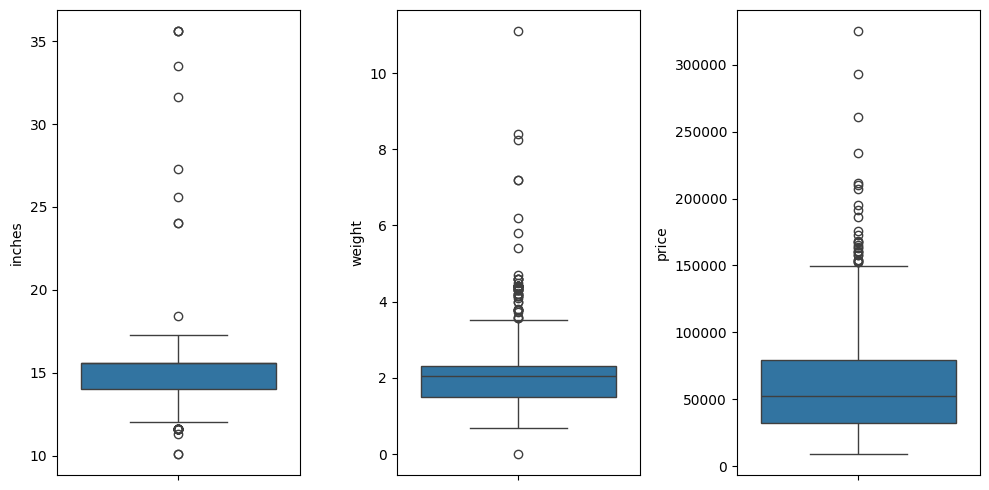

In [1003]:
continuous_columns = ['inches','weight','price']
plt.figure(figsize=(10,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = df[continuous_columns[i]])
plt.tight_layout()

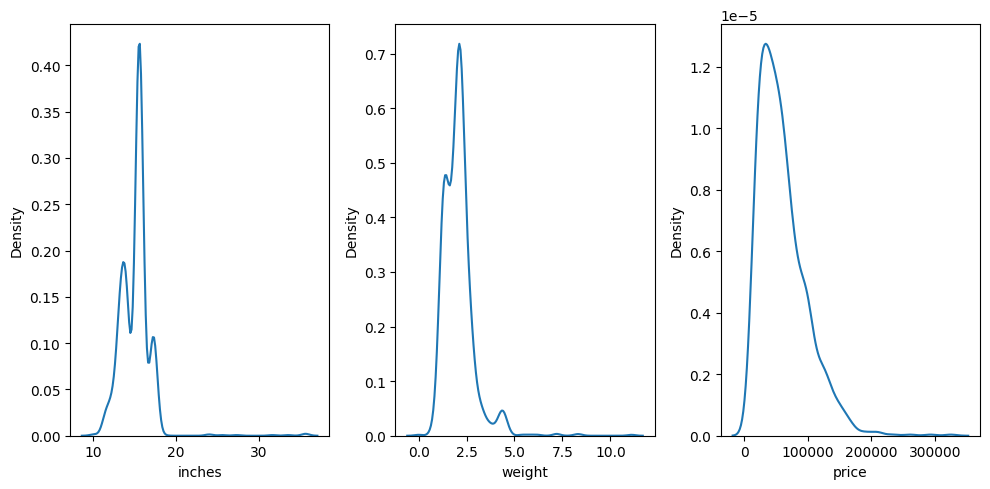

In [1004]:
continuous_columns = ['inches','weight','price']
plt.figure(figsize=(10,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x= df[continuous_columns[i]])
plt.tight_layout()

In [1009]:
Q1 = df[['inches','weight']].quantile(0.25)
Q3 = df[['inches','weight']].quantile(0.75)
IQR = Q3-Q1
upper_limit_inches,upper_limit_weight = Q3 + 1.5*IQR
print(upper_limit_inches,upper_limit_weight)
lower_limit_inches,lower_limit_weight = round(Q1 - 1.5*IQR,2)
print(lower_limit_inches,lower_limit_weight)

18.0 3.55
11.6 0.27


#### A) IDENTIFYING OUTLIERS

In [1007]:
# outliers from the inches column 
outliers_inches = df[(df['inches']>upper_limit_inches)|(df['inches']<lower_limit_inches)]
print('total_outliers in the inches column: ',len(outliers_inches))
outliers_inches

total_outliers in the inches column:  13


company            typename  inches                          cpu  \
167         MSI              Gaming    18.4  Intel Core i7 6920HQ 2.9GHz   
370      Lenovo            Notebook    25.6   Intel Core i5 8250U 1.6GHz   
376      Lenovo            Notebook    35.6     Intel Core i3 6006U 2GHz   
391        Asus            Notebook    35.6   Intel Core i3 7100U 2.4GHz   
392        Dell              Gaming    27.3  Intel Core i7 7820HK 2.9GHz   
406      Lenovo           Ultrabook    24.0   Intel Core i7 7500U 2.7GHz   
426   Microsoft           Ultrabook    33.5   Intel Core i7 7660U 2.5GHz   
491      Lenovo            Notebook    24.0   Intel Core i5 6200U 2.3GHz   
554        Dell  2 in 1 Convertible    31.6     Intel Core M 7Y30 1.0GHz   
622      Lenovo            Notebook    35.6  AMD E-Series E2-9000 2.2GHz   
875      Lenovo  2 in 1 Convertible    11.3  Intel Core M m7-6Y75 1.2GHz   
1039     Lenovo  2 in 1 Convertible    10.1  Intel Atom x5-Z8550 1.44GHz   
1205     Lenovo  2 in 1 Convertible    10.1  Intel Atom x5-Z8550 1.44GHz   

       ram                           gpu         opsys  weight        price  \
167   32.0            Nvidia GTX 980 SLI    Windows 10    4.40  149130.7200   
370    8.0             AMD Radeon RX 550    Windows 10    2.10   60978.9600   
376    4.0         Intel HD Graphics 520    Windows 10    2.20   21791.5200   
391    8.0          Nvidia GeForce 940MX         Linux    2.30   31808.1600   
392   16.0       Nvidia GeForce GTX 1070    Windows 10    4.42  149130.7200   
406   24.0         Intel HD Graphics 620    Windows 10    1.32  126912.9600   
426    8.0  Intel Iris Plus Graphics 640  Windows 10 S    1.25   95850.7200   
491    8.0         Intel HD Graphics 520     Windows 7    2.02   71395.2000   
554    4.0         Intel HD Graphics 615    Windows 10    1.39   32127.8400   
622    4.0        AMD Radeon R2 Graphics    Windows 10    2.20   18594.7200   
875    8.0         Intel HD Graphics 515    Windows 10    1.10   69210.7200   
1039   4.0         Intel HD Graphics 400       Android    0.69   29250.7200   
1205   4.0         Intel HD Graphics 400    Windows 10    0.69   29977.1928   

      ssd  ...  flashstorage  hybrid  dual_memory  screen_tech screen_width  \
167   512  ...             0       0            1      Full HD         1920   
370   256  ...             0       0            1          IPS         1920   
376     0  ...             0       0            0      Full HD         1920   
391     0  ...             0       0            0      Full HD         1920   
392   256  ...             0       0            1          IPS         2560   
406   512  ...             0       0            0      Unknown         2560   
426   256  ...             0       0            0      Unknown         2256   
491   256  ...             0       0            0      Full HD         1920   
554   128  ...             0       0            0      Unknown         1366   
622   128  ...             0       0            0      Unknown         1366   
875   256  ...             0       0            0          IPS         1920   
1039    0  ...            64       0            0          IPS         1920   
1205    0  ...            64       0            0          IPS         1920   

      screen_height  aspect_ratio  is_touchscreen     ppi  clock_speed  
167            1080          1.78               0  119.72         2.90  
370            1080          1.78               0   86.05         1.60  
376            1080          1.78               0   61.88         2.00  
391            1080          1.78               0   61.88         2.40  
392            1440          1.78               0  107.59         2.90  
406            1440          1.78               0  122.38         2.70  
426            1504          1.50               1   80.94         2.50  
491            1080          1.78               0   91.79         2.30  
554             768          1.78               1   49.59         1.00  

In [1014]:
outliers_weights = df[(df['weight']>upper_limit_weight)|(df['weight']<lower_limit_weight)]
print('total_outliers in the weight column: ',len(outliers_weights))
outliers_weights.head()

total_outliers in the weight column:  55


company  typename  inches                          cpu   ram  \
126     Acer  Notebook    15.6   Intel Core i3 7130U 2.7GHz   4.0   
163  Toshiba  Notebook    15.6   Intel Core i3 7100U 2.4GHz   4.0   
167      MSI    Gaming    18.4  Intel Core i7 6920HQ 2.9GHz  32.0   
208     Dell    Gaming    17.3  Intel Core i7 7700HQ 2.8GHz  16.0   
222     Asus    Gaming    17.3  Intel Core i7 7820HK 2.9GHz  32.0   

                         gpu       opsys  weight        price  ssd  ...  \
126     Nvidia GeForce MX130  Windows 10    7.20   30476.1600  256  ...   
163    Intel HD Graphics 620  Windows 10    5.40   26053.9200    0  ...   
167       Nvidia GTX 980 SLI  Windows 10    4.40  149130.7200  512  ...   
208  Nvidia GeForce GTX 1060  Windows 10    4.42  130873.7952  256  ...   
222  Nvidia GeForce GTX 1080  Windows 10    4.70  207259.2000  512  ...   

     flashstorage  hybrid  dual_memory  screen_tech screen_width  \
126             0       0            0      Full HD         1920   
163             0       0            0      Unknown         1366   
167             0       0            1      Full HD         1920   
208             0       0            1          IPS         1920   
222             0       0            1      Full HD         1920   

     screen_height  aspect_ratio  is_touchscreen     ppi  clock_speed  
126           1080          1.78               0  141.21          2.7  
163            768          1.78               0  100.45          2.4  
167           1080          1.78               0  119.72          2.9  
208           1080          1.78               0  127.34          2.8  
222           1080          1.78               0  127.34          2.9  

[5 rows x 21 columns]

##### OUTLIERS GREATER THAN UPPER LIMIT

In [764]:
df[df['inches']>upper_limit_inches][['typename','inches','screen_height',
                                     'screen_width','ppi','price']].sort_values(by=['inches','ppi'],ascending = [True,False])

typename  inches  screen_height  screen_width     ppi  \
167              Gaming    18.4           1080          1920  119.72   
406           Ultrabook    24.0           1440          2560  122.38   
491            Notebook    24.0           1080          1920   91.79   
370            Notebook    25.6           1080          1920   86.05   
392              Gaming    27.3           1440          2560  107.59   
554  2 in 1 Convertible    31.6            768          1366   49.59   
426           Ultrabook    33.5           1504          2256   80.94   
376            Notebook    35.6           1080          1920   61.88   
391            Notebook    35.6           1080          1920   61.88   
622            Notebook    35.6            768          1366   44.02   

         price  
167  149130.72  
406  126912.96  
491   71395.20  
370   60978.96  
392  149130.72  
554   32127.84  
426   95850.72  
376   21791.52  
391   31808.16  
622   18594.72

In [765]:
inches_greater_than_19 = df[df['inches']>19][['company','typename','inches','cpu','gpu','screen_height','screen_width',
                                     'ram','opsys', 'weight','ssd','price']]
for k,v in inches_greater_than_19.to_dict().items():
    print(k, ':', v)

company : {370: 'Lenovo', 376: 'Lenovo', 391: 'Asus', 392: 'Dell', 406: 'Lenovo', 426: 'Microsoft', 491: 'Lenovo', 554: 'Dell', 622: 'Lenovo'}
typename : {370: 'Notebook', 376: 'Notebook', 391: 'Notebook', 392: 'Gaming', 406: 'Ultrabook', 426: 'Ultrabook', 491: 'Notebook', 554: '2 in 1 Convertible', 622: 'Notebook'}
inches : {370: 25.6, 376: 35.6, 391: 35.6, 392: 27.3, 406: 24.0, 426: 33.5, 491: 24.0, 554: 31.6, 622: 35.6}
cpu : {370: 'Intel Core i5 8250U 1.6GHz', 376: 'Intel Core i3 6006U 2GHz', 391: 'Intel Core i3 7100U 2.4GHz', 392: 'Intel Core i7 7820HK 2.9GHz', 406: 'Intel Core i7 7500U 2.7GHz', 426: 'Intel Core i7 7660U 2.5GHz', 491: 'Intel Core i5 6200U 2.3GHz', 554: 'Intel Core M 7Y30 1.0GHz', 622: 'AMD E-Series E2-9000 2.2GHz'}
gpu : {370: 'AMD Radeon RX 550', 376: 'Intel HD Graphics 520', 391: 'Nvidia GeForce 940MX', 392: 'Nvidia GeForce GTX 1070', 406: 'Intel HD Graphics 620', 426: 'Intel Iris Plus Graphics 640', 491: 'Intel HD Graphics 520', 554: 'Intel HD Graphics 615', 62

NOTE: for the following data index might change due to above preprocessing but it is clear that the
* inches,screen_resolution and price from the dataset 
      
      {
      inches:{157: 35.6,270: 31.6, 496: 27.3, 820: 35.6, 861: 35.6, 893: 24.0, 960: 25.6, 1026: 24.0, 1136: 33.5}
      screen_width : {427: 2560, 513: 1920, 391: 1920, 413: 2560, 579: 1366, 447: 2256, 397: 1920, 412: 1920, 656: 1366}
      screen_height : {427: 1440, 513: 1080, 391: 1080, 413: 1440, 579: 768, 447: 1504, 397: 1080, 412: 1080, 656: 768}
      price : {427: 126912.96, 513: 71395.2, 391: 60978.96, 413: 149130.72, 579: 32127.84, 447: 95850.72, 397: 21791.52, 412: 31808.16, 656: 18594.72}
      }


* From internet sources (Google AI llama model) The inches are as follows
      
      {
      157: 15.6, 270: 11.6, 496: 15.6, 820: 15.6, 861: 15.6, 893: 14.0, 960: 15.6, 1026: 15.6, 1136: 13.5
      }


* Now clearly for a company and typename the screen size would be almost similar if there is any one outlier the most case would be data error for example as shown above for Lenova company ultraNotebook the screen size would be 14.0 " so we can also fill the outliers with mode of the company and typename

In [766]:
company_typename_inches_dict = df[df['inches']>19][['company','typename','inches']].to_dict()
inches_greater_outlier_indexes = company_typename_inches_dict['company'].keys() 
for index in inches_greater_outlier_indexes:
    mode_inches = df[(df['company']==company_typename_inches_dict['company'][index])&
                (df['typename']==company_typename_inches_dict['typename'][index])]['inches'].mode()[0]
    original_inches = df.loc[index,'inches']
    print(f'index {index}, original_inches : {original_inches},  Mode_inches : {mode_inches}')

index 370, original_inches : 25.6,  Mode_inches : 15.6
index 376, original_inches : 35.6,  Mode_inches : 15.6
index 391, original_inches : 35.6,  Mode_inches : 15.6
index 392, original_inches : 27.3,  Mode_inches : 15.6
index 406, original_inches : 24.0,  Mode_inches : 14.0
index 426, original_inches : 33.5,  Mode_inches : 13.5
index 491, original_inches : 24.0,  Mode_inches : 15.6
index 554, original_inches : 31.6,  Mode_inches : 13.3
index 622, original_inches : 35.6,  Mode_inches : 15.6


* The Mode of inches found from company and typename almost matches with the internet source so the outlier inches will be replaced by mode of tht data found from `company` and `typename`

In [767]:
df[df['weight']>upper_limit_weight][['typename','weight','price']].sort_values(by = ['weight','price'])

typename  weight        price
837               Gaming    3.58   68145.1200
992               Gaming    3.58  211788.0000
230               Gaming    3.60  159786.7200
751               Gaming    3.74   93186.7200
548               Gaming    3.78   79813.4400
974               Gaming    3.78   82351.6992
436               Gaming    3.78   90522.7200
1062              Gaming    3.78  127818.7200
1003              Gaming    3.78  133146.7200
605               Gaming    3.80  149130.7200
987               Gaming    4.00   53173.4400
1176              Gaming    4.00  101232.0000
247   2 in 1 Convertible    4.10   79866.7200
564               Gaming    4.14  117162.7200
240               Gaming    4.14  133146.7200
540               Gaming    4.14  145401.1200
676               Gaming    4.20  103096.8000
731               Gaming    4.20  122490.7200
1111              Gaming    4.20  138474.7200
233               Gaming    4.30   95850.7200
1119              Gaming    4.30  114552.0000
1024              Gaming    4.30  122490.7200
724               Gaming    4.30  125208.0000
461               Gaming    4.33   67612.3200
759               Gaming    4.36  133467.4656
870               Gaming    4.36  146946.2400
886               Gaming    4.36  168045.1200
670               Gaming    4.36  194972.8320
167               Gaming    4.40  149130.7200
424             Notebook    4.42  109010.8800
208               Gaming    4.42  130873.7952
516               Gaming    4.42  143802.7200
392               Gaming    4.42  149130.7200
903               Gaming    4.42  149184.0000
702               Gaming    4.42  152859.7872
496               Gaming    4.42  160520.3856
781               Gaming    4.42  163723.5792
611               Gaming    4.42  167691.8736
899               Gaming    4.42  167778.7200
723               Gaming    4.42  191211.2640
547               Gaming    4.50  125154.7200
975               Gaming    4.60  122010.6672
539               Gaming    4.60  141884.6400
1041              Gaming    4.60  146519.4672
1007              Gaming    4.60  172627.2000
222               Gaming    4.70  207259.2000
163             Notebook    5.40   26053.9200
279             Notebook    5.80   34578.7200
609             Notebook    6.20   48964.3200
126             Notebook    7.20   30476.1600
224             Notebook    7.20   31381.9200
303             Notebook    8.23   29250.7200
549            Ultrabook    8.40   89137.4400
588            Ultrabook   11.10  101232.0000

* Clearly the data upto the weight greater than 5kg is consistent but after that weight greater than 5kg and belong to Notebook and ultrabook might be false records

In [768]:
weight_greater_than_5kg = df[df['weight']>5][['company','typename','inches',
                                              'cpu','ram','gpu','opsys','weight','price']]
for k,v in weight_greater_than_5kg.to_dict().items():
    print(k, ':', v)

company : {126: 'Acer', 163: 'Toshiba', 224: 'Lenovo', 279: 'Lenovo', 303: 'Acer', 549: 'Lenovo', 588: 'Asus', 609: 'Dell'}
typename : {126: 'Notebook', 163: 'Notebook', 224: 'Notebook', 279: 'Notebook', 303: 'Notebook', 549: 'Ultrabook', 588: 'Ultrabook', 609: 'Notebook'}
inches : {126: 15.6, 163: 15.6, 224: 15.6, 279: 17.3, 303: 15.6, 549: 14.0, 588: 14.0, 609: 15.6}
cpu : {126: 'Intel Core i3 7130U 2.7GHz', 163: 'Intel Core i3 7100U 2.4GHz', 224: 'Intel Core i3 6006U 2GHz', 279: 'Intel Core i5 7200U 2.5GHz', 303: 'Intel Core i5 7200U 2.5GHz', 549: 'Intel Core i7 6600U 2.6GHz', 588: 'Intel Core i7 7500U 2.7GHz', 609: 'Intel Core i7 8550U 1.8GHz'}
ram : {126: 4.0, 163: 4.0, 224: 8.0, 279: 6.0, 303: 6.0, 549: 12.0, 588: 16.0, 609: 8.0}
gpu : {126: 'Nvidia GeForce MX130', 163: 'Intel HD Graphics 620', 224: 'Intel HD Graphics 520', 279: 'Nvidia GeForce GTX 940M', 303: 'Intel HD Graphics 620', 549: 'Intel HD Graphics 520', 588: 'Intel HD Graphics 620', 609: 'AMD Radeon 530'}
opsys : {126:

* The weights and prices present in dataset
original_weights:

        {
        "weight : {47: 7.2, 54: 8.23, 209: 11.1, 509: 6.2, 854: 7.2, 946: 5.8, 983: 8.4, 1156: 5.4}
        }
        
* From internet sources (Google AI llama model) following are the weights of the same models
internet_source:

        {
        "weight_kg": {47: 2.1, 54: 2.2, 209: 1.4, 509: 2.3, 854: 2.2, 946: 2.5, 983: 1.5, 1156: 2.0}
        }


In [769]:

company_typename_weight_dict = df[df['weight']>5][['company','typename','weight']].to_dict()
weight_greater_outlier_indexes = company_typename_weight_dict['company'].keys() 
for index in weight_greater_outlier_indexes:
    mode_weights = df[(df['company']==company_typename_weight_dict['company'][index])&
                (df['typename']==company_typename_weight_dict['typename'][index])]['weight'].mode()[0]
    original_weights = df.loc[index,'weight']
    print(f'index {index}, original_weights : {original_weights},  Mode_weight : {mode_weights}')

index 126, original_weights : 7.2,  Mode_weight : 2.1
index 163, original_weights : 5.4,  Mode_weight : 1.2
index 224, original_weights : 7.2,  Mode_weight : 2.2
index 279, original_weights : 5.8,  Mode_weight : 2.2
index 303, original_weights : 8.23,  Mode_weight : 2.1
index 549, original_weights : 8.4,  Mode_weight : 1.13
index 588, original_weights : 11.1,  Mode_weight : 1.1
index 609, original_weights : 6.2,  Mode_weight : 2.2


* It is clear that the mode of the weights are approx same as from internet source so we can replace the weights by mode values

##### OUTLIERS LESSER THAN LOWER LIMIT

In [770]:
df[df['inches']<lower_limit_inches][['company','typename','inches','screen_height',
                                     'screen_width','ppi','price']].sort_values(by=['inches','ppi'],ascending = [True,False])

company            typename  inches  screen_height  screen_width     ppi  \
1039  Lenovo  2 in 1 Convertible    10.1           1200          1920  224.17   
1205  Lenovo  2 in 1 Convertible    10.1           1200          1920  224.17   
875   Lenovo  2 in 1 Convertible    11.3           1080          1920  194.95   

           price  
1039  29250.7200  
1205  29977.1928  
875   69210.7200

* As the data is consistent and possible we keep the following outliers as it is

In [771]:
df[df['weight']<lower_limit_weight][['company','typename','weight','price']].sort_values(by = ['weight','price'])

company   typename  weight     price
323    Dell  Ultrabook  0.0002  35324.64

In [772]:
lower_mode_weight = df[(df['company']=='Dell')&(df['typename']=='Notebook')]['weight'].mode()[0]

* As the outlier value is not possible we will replace it with mode for that respective column

#### UPDATING THE OUTLIERS OF INCHES COLUMN

In [773]:
try:
    # Get the index of rows where inches > 19
    idx = df[df['inches'] > 19].index
    for i in idx: 
        company_value = df.loc[i,'company']
        typename_value = df.loc[i,'typename']
        inch_value = df[(df['company']==company_value)&(df['typename']==typename_value)]['inches'].mode()[0]
        df.loc[i,'inches'] = inch_value

except Exception as e:
    print("Error:", e)
finally:
    print(df.loc[idx,'inches'])

370    15.6
376    15.6
391    15.6
392    15.6
406    14.0
426    13.5
491    15.6
554    13.3
622    15.6
Name: inches, dtype: float64


* Inches column updated safely

#### UPDATING THE OUTLIERS OF WEIGHT COLUMN

In [774]:
try:
    # Get the index of rows where weight > 5
    idx = df[df['weight'] > 5].index
    for i in idx: 
        company_value = df.loc[i,'company']
        typename_value = df.loc[i,'typename']
        weight_value = df[(df['company']==company_value)&(df['typename']==typename_value)]['weight'].mode()[0]
        df.loc[i,'weight'] = weight_value



except Exception as e:
    print("Error:", e)
finally:
    print(df.loc[idx,'weight'])

126    2.10
163    1.20
224    2.20
279    2.20
303    2.10
549    1.13
588    1.10
609    2.20
Name: weight, dtype: float64


In [775]:
try:
    idx = df[df['weight']<lower_limit_weight].index
    df.loc[idx,'weight'] = lower_mode_weight
except Exception as e:
    print(f'Error : {e}')
finally:
    print(df.loc[idx,'weight'])
    print('weight obtained from mode of company and type : {lower_mode_weight}')

323    2.2
Name: weight, dtype: float64
weight obtained from mode of company and type : {lower_mode_weight}


In [776]:
# df['inches'] = df['inches'].clip(lower=lower_limit_inches,upper=upper_limit_inches)
# df['weight'] = df['weight'].clip(lower= lower_limit_weight,upper=upper_limit_weight)

#### CONVERTING `price & ppi` FEATURES

In [777]:
# The ouliers in the price column  is normal so we need to apply log transform so that the price value will be neutralized
df['price_log'] = df['price'].apply(np.log)

In [778]:
# As inches  column is redifined we need to adjust the ppi column as ppi is dependent on inches 
df['ppi'] = round(((df['screen_width']**2 + df['screen_height']**2)**0.5)/df['inches'],2)
df.head()

company   typename  inches                         cpu   ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz   8.0   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz   8.0   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8.0   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz  16.0   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz   8.0   

                            gpu  opsys  weight        price  ssd  ...  hybrid  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  128  ...       0   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232    0  ...       0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000  256  ...       0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  512  ...       0   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080  256  ...       0   

   dual_memory  screen_tech  screen_width screen_height  aspect_ratio  \
0            0          IPS          2560          1600          1.60   
1            0      Unknown          1440           900          1.60   
2            0      Full HD          1920          1080          1.78   
3            0          IPS          2880          1800          1.60   
4            0          IPS          2560          1600          1.60   

   is_touchscreen     ppi  clock_speed  price_log  
0               0  226.98          2.3  11.175755  
1               0  127.68          1.8  10.776777  
2               0  141.21          2.5  10.329931  
3               0  220.53          2.7  11.814476  
4               0  226.98          3.1  11.473101  

[5 rows x 22 columns]

In [779]:
df[['inches','weight','price_log',]].describe()

inches       weight    price_log
count  1219.000000  1219.000000  1219.000000
mean     15.021903     2.043962    10.825808
std       1.413884     0.676102     0.621803
min      10.100000     0.690000     9.134616
25%      14.000000     1.500000    10.374901
50%      15.600000     2.040000    10.868203
75%      15.600000     2.310000    11.286445
max      18.400000     4.700000    12.691441

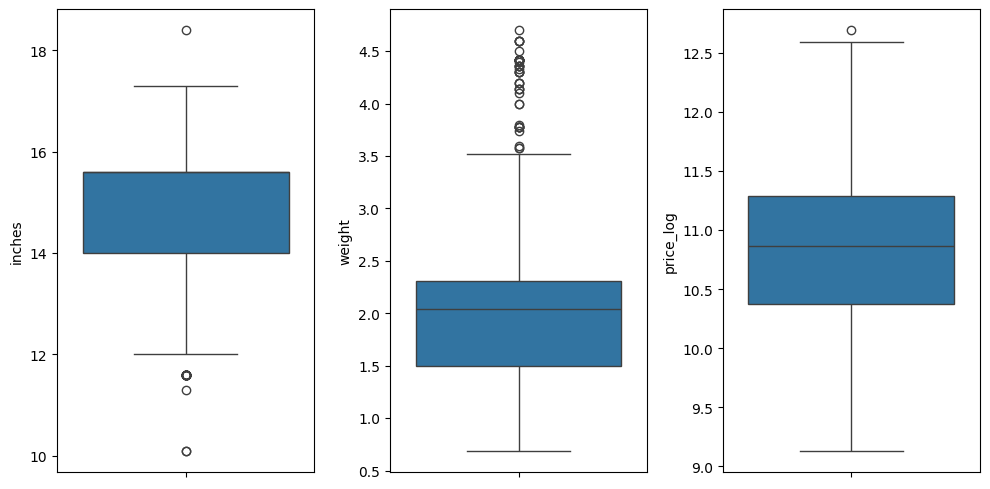

In [780]:
continuous_columns = ['inches','weight','price_log']
plt.figure(figsize=(10,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = df[continuous_columns[i]])
plt.tight_layout()

* The .describe() function is used to understant the descriptive statistics of the mode column 
* The 
* There is high abnormality in inches and weight column, Price may be high due to rare specifications 
* Weights greater than 5Kg and screen size greater than 20" is clearly a sign of data error
* In fact in rare of rare cases The laptop screen size will be in between `18" - 20+" ` and weight  will be `4.5kg - 5+kg`
* The lower limit outliers like 10" for screeen size is possible
* The lower limit outliers of weight column which is 0.0002 kg is not possible it also falls under data error
* From IQR method the upper_limit,lower_limit for inches and weights column is found to be (18.0 11.6) and (3.55 0.27) respectively 
* After clear inspection and analysis the limts are modified to (19,10) and (5,0.5) respectively 
* The total number of outliers in the inches column greater than upper limit amd less than lower limit are 9,0 respectively
* the total number of outliers in the weight column greater than upper limit and less than lower limit are 8,1 respectively
* For treating the outliers The mode imputation technique is used. The value for of each outlier is found using the mode of the inches/weight column under the same company and typename of the outlier 
* For confirmation the data is also searched in the internet and the mode values almost matches the values obtained from internet for the same specifications


## IV. EXPLORATORY DATA ANALYSIS

### 1. UNIVARIATE ANALYSIS

#### A) DISPLAY RELATED DATA

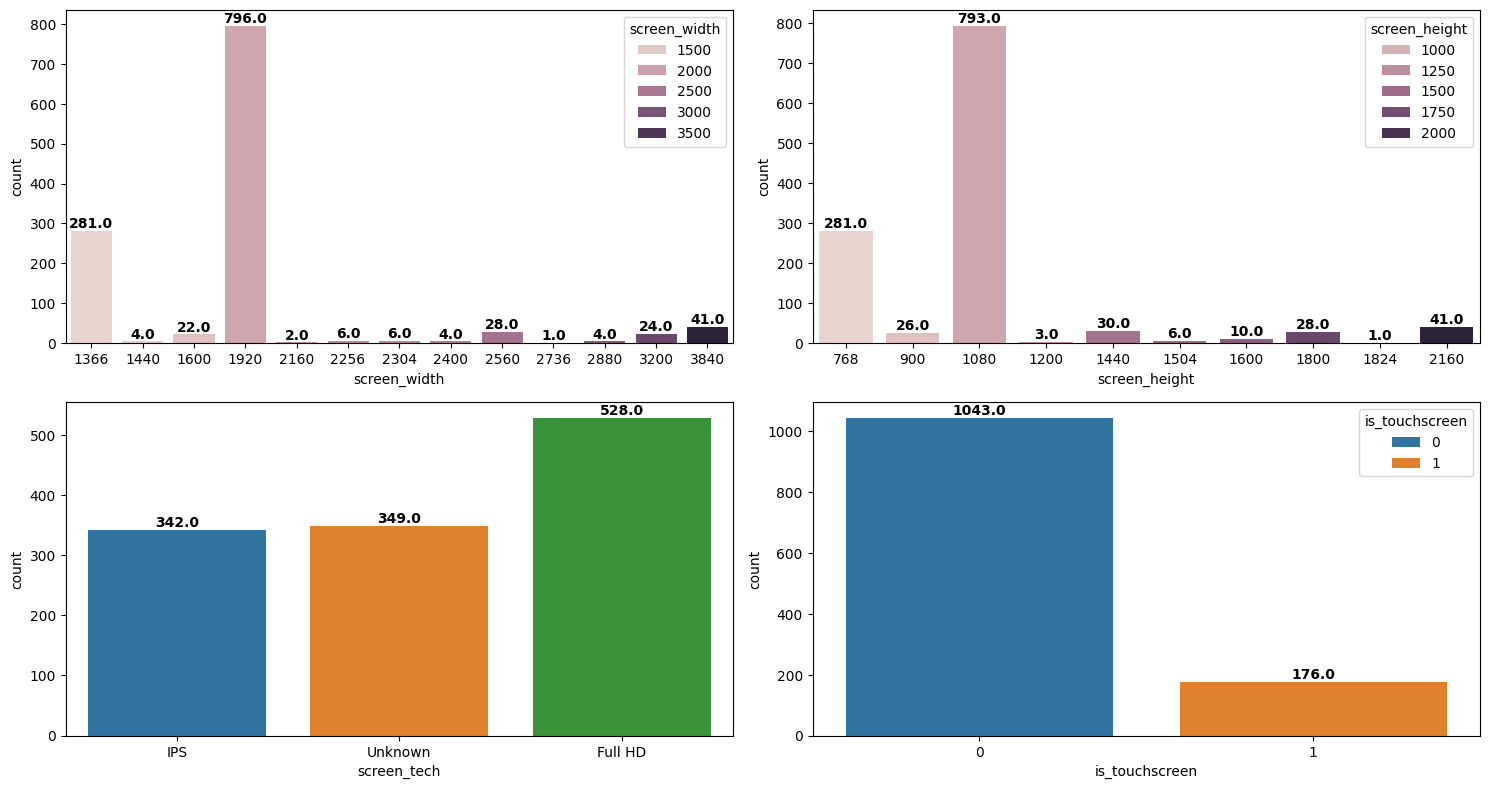

In [781]:
plt.figure(figsize=(15,8))
cols = ['screen_width','screen_height','screen_tech','is_touchscreen']

for i in range(1,5):
    plt.subplot(2,2,i)
    ax = sns.countplot(data = df, x = cols[i-1],hue=cols[i-1])
    for p in ax.patches:
        if p.get_height()>0:
            ax.annotate(f'{p.get_height()}',  
                        (p.get_x() + p.get_width() / 2, p.get_height()),  
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
# plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

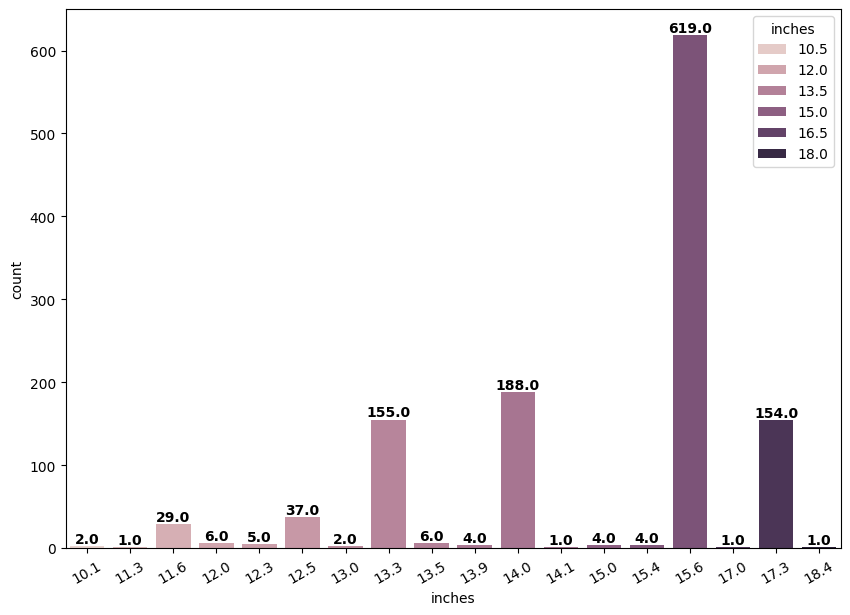

In [782]:
# it is best to visualize screen size as countplot instead of histogram due to unique values not exceeding 
plt.figure(figsize = (10,7))
ax = sns.countplot(data = df, x ='inches',hue = 'inches')
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(f'{p.get_height()}',  
                    (p.get_x() + p.get_width() / 2, p.get_height()),  
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.xticks(rotation = 30)
plt.show()

* The most ScreeResolution type is FULL HD and most of the screenResolution types are not mentioned.
* we can see most laptops screen resolutions are 1920 for pixel width and 1080 for pixel height

#### B) STORAGE RELEATED DATA

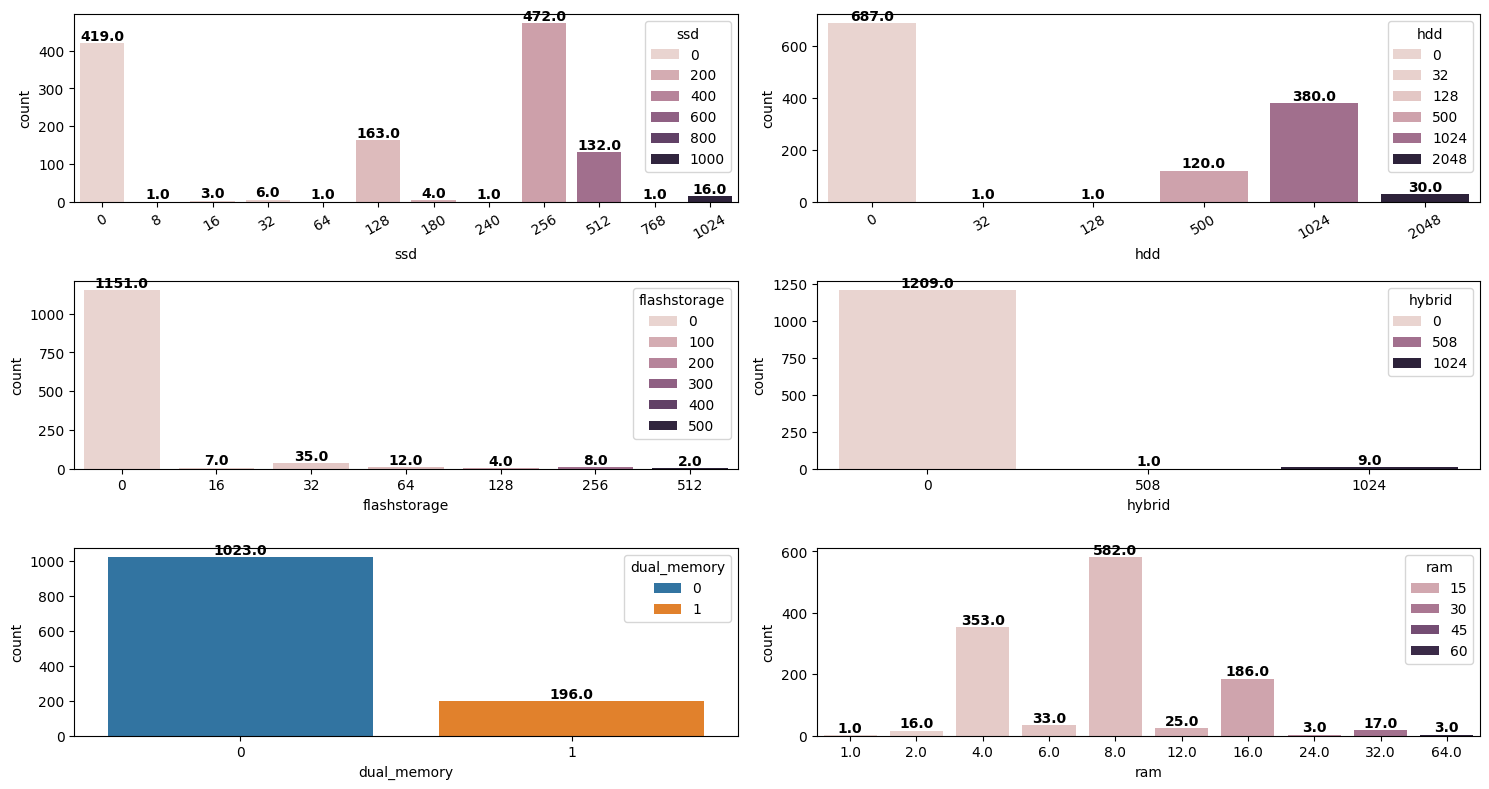

In [783]:
cols = ['ssd','hdd','flashstorage','hybrid','dual_memory','ram']
plt.figure(figsize=(15,8))
for i in range(6):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data = df, x=cols[i],hue = cols[i])
    for p in ax.patches:
        if p.get_height()>0:
            ax.annotate(f'{p.get_height()}',  
                        (p.get_x() + p.get_width() / 2, p.get_height()),  
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    if i <2:
        plt.xticks(rotation=30)
plt.tight_layout()

* The most common type of secondary storage is `SSD` storage.(least count of 0's implies most preferred)
* Very few laptops have dual_memory specifications
* The most common type of RAM is 8 GB.

#### C) TOP 10 PREFERRED CPU'S & GPU'S

Text(0.5, 1.0, "Top 10 common GPU's")

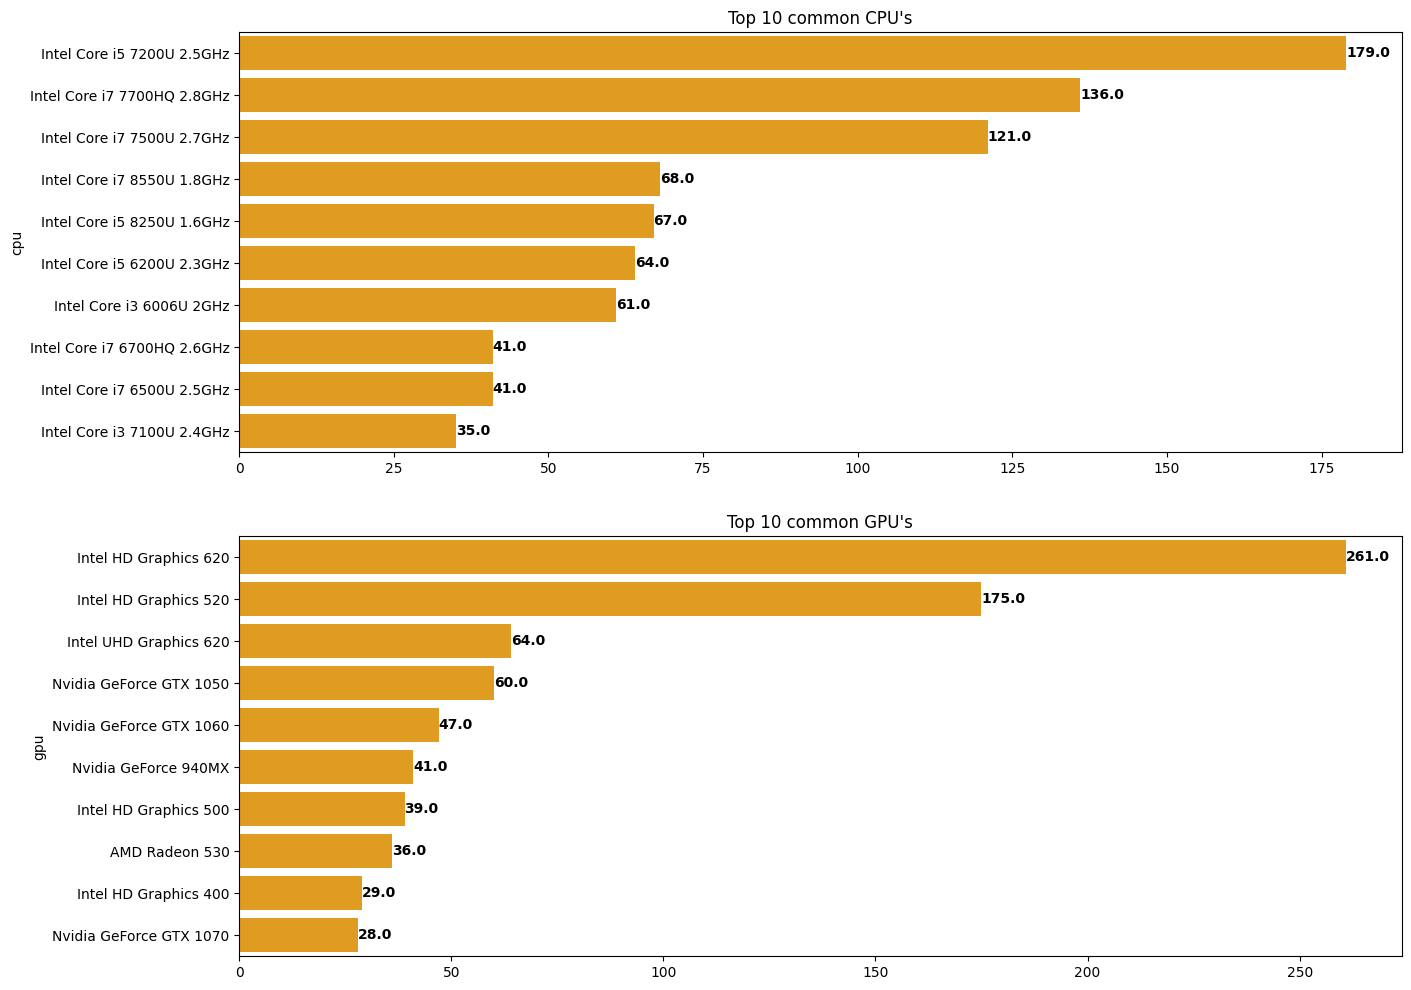

In [784]:
cpu_freq = df['cpu'].value_counts()

plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
ax = sns.barplot(x = cpu_freq.head(10).values,y= cpu_freq.head(10).index,color = 'orange')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(),(p.get_y()+p.get_height()/2)),
                ha = 'left',va='center',fontsize=10,fontweight = 'bold',color='black')
plt.title("Top 10 common CPU's")
gpu_freq = df['gpu'].value_counts()
plt.subplot(2,1,2)
ax = sns.barplot(x = gpu_freq.head(10).values,y = gpu_freq.head(10).index,color = 'orange')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(),(p.get_y()+p.get_height()/2)),
                ha = 'left',va='center',fontsize=10,fontweight = 'bold',color='black')
plt.title("Top 10 common GPU's")


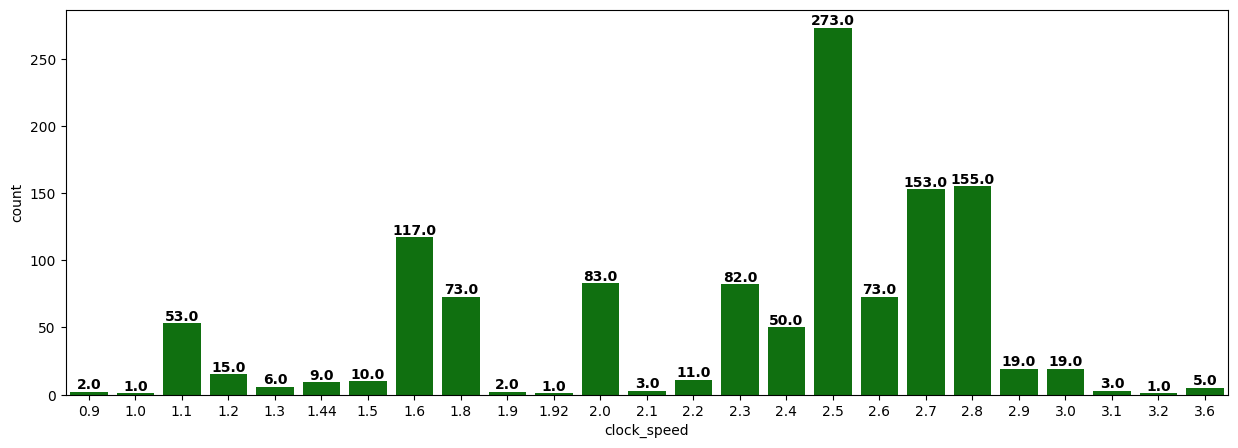

In [785]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df,x= 'clock_speed',color='green')
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(f'{p.get_height()}',  
                    (p.get_x() + p.get_width() / 2, p.get_height()),  
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

* Intel core i5 7200U 2.5GHz is the top common CPU and 
* Intel HD Graphics 620 is the top used GPU in the data
* As expected most used clock_speed in cpu's are 2.5GHz

#### D) FREQUENCY OF `opsys`,`company`,`typename`

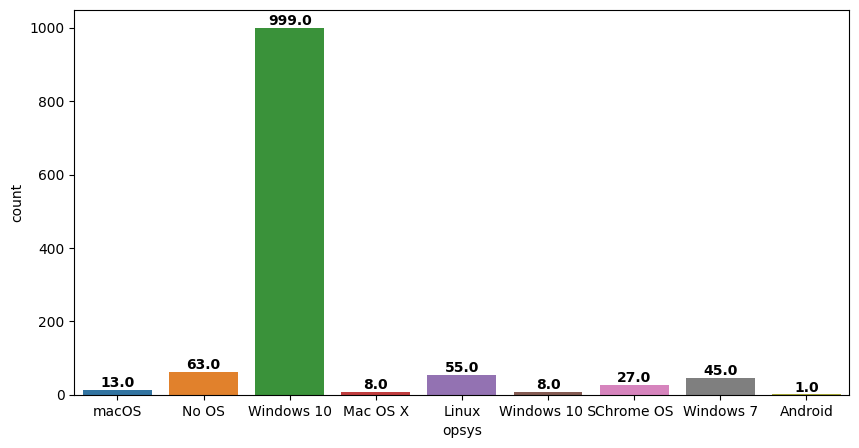

In [786]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data =df, x = 'opsys',hue='opsys')
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(f'{p.get_height()}',  
                    (p.get_x() + p.get_width() / 2, p.get_height()),  
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

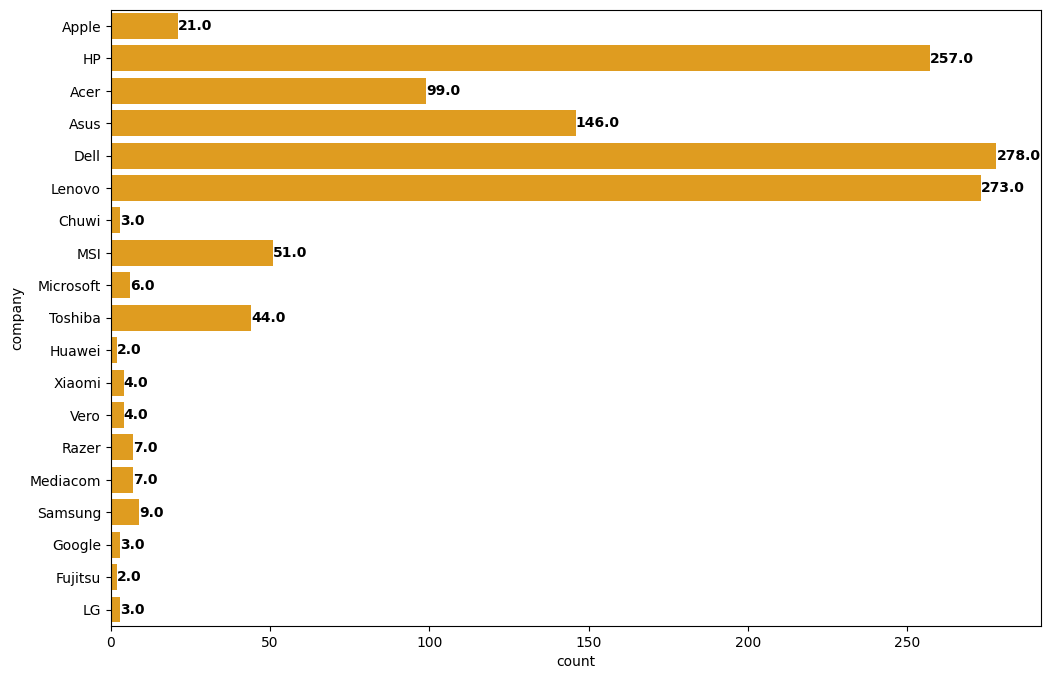

In [787]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data =df, y = 'company',color = 'orange')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width(),(p.get_y()+p.get_height()/2)),
                ha = 'left',va='center',fontsize=10,fontweight = 'bold',color='black')

* Lenova , Dell and HP are the top 3 companies with most varieties

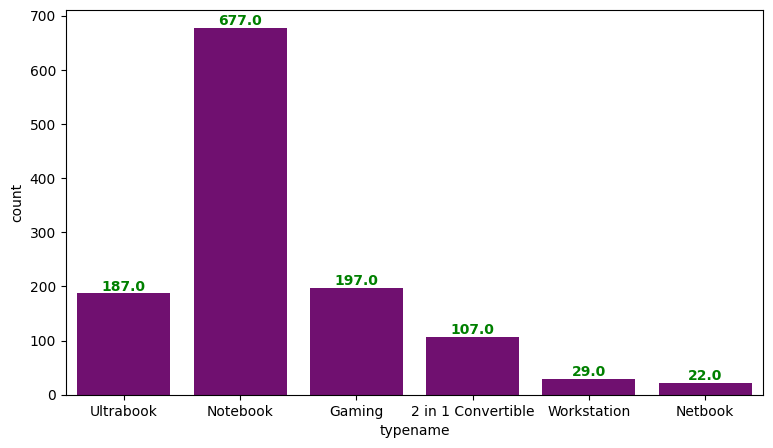

In [788]:
plt.figure(figsize=(9,5))
ax = sns.countplot(data = df, x = 'typename',color = 'purple')
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(f'{p.get_height()}',  
                    (p.get_x() + p.get_width() / 2, p.get_height()),  
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='green')

#### E) FREQUENCY DISTRIBUTION FOR CONTINUOUS VARIABLES

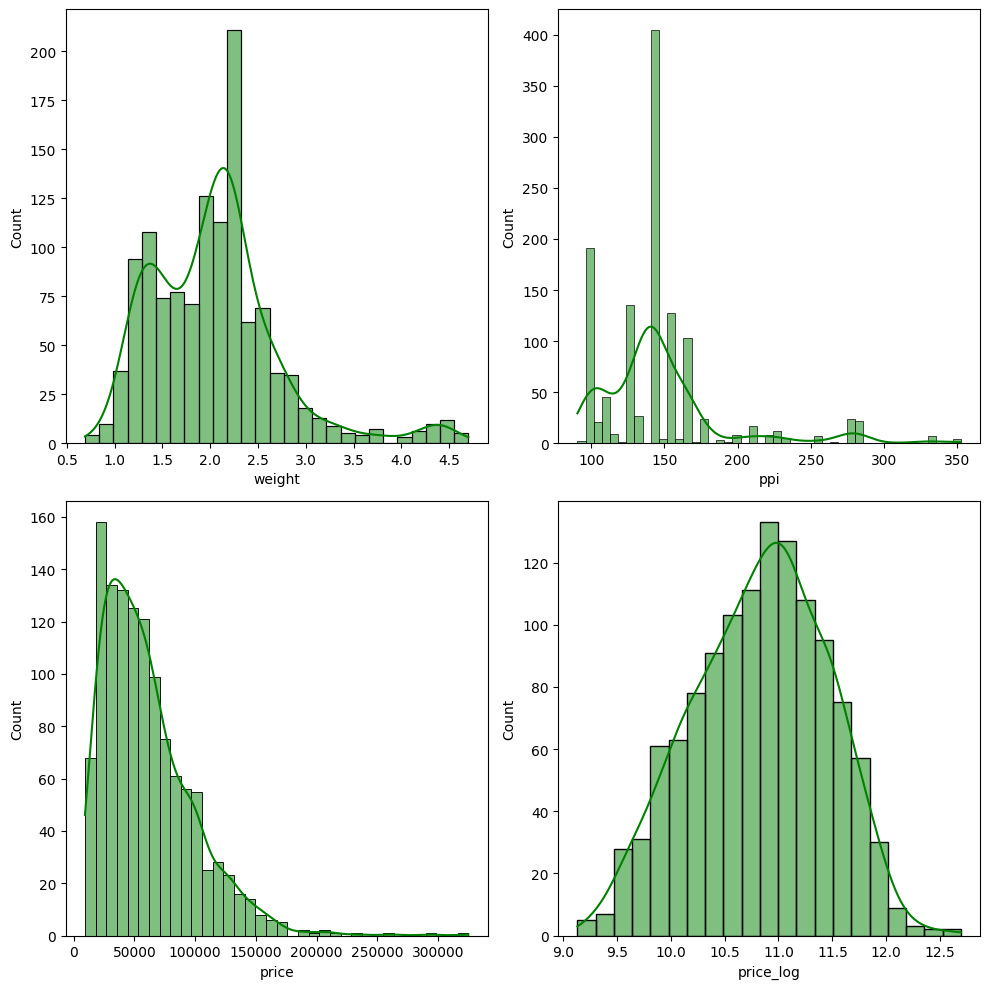

In [789]:
cols  = ['weight','ppi','price','price_log']
plt.figure(figsize=(10,10))
for i in range(1,5):
    plt.subplot(2,2,i)
    sns.histplot(data = df,x=cols[i-1],color='green',kde=True)
plt.tight_layout()
plt.show()


### 2. BIVARIATE ANALYSIS

* As price column is our main objective we will keep price variable as common variable

#### A) AVERAGE PRICE ESTIMATION PER CATEGORY

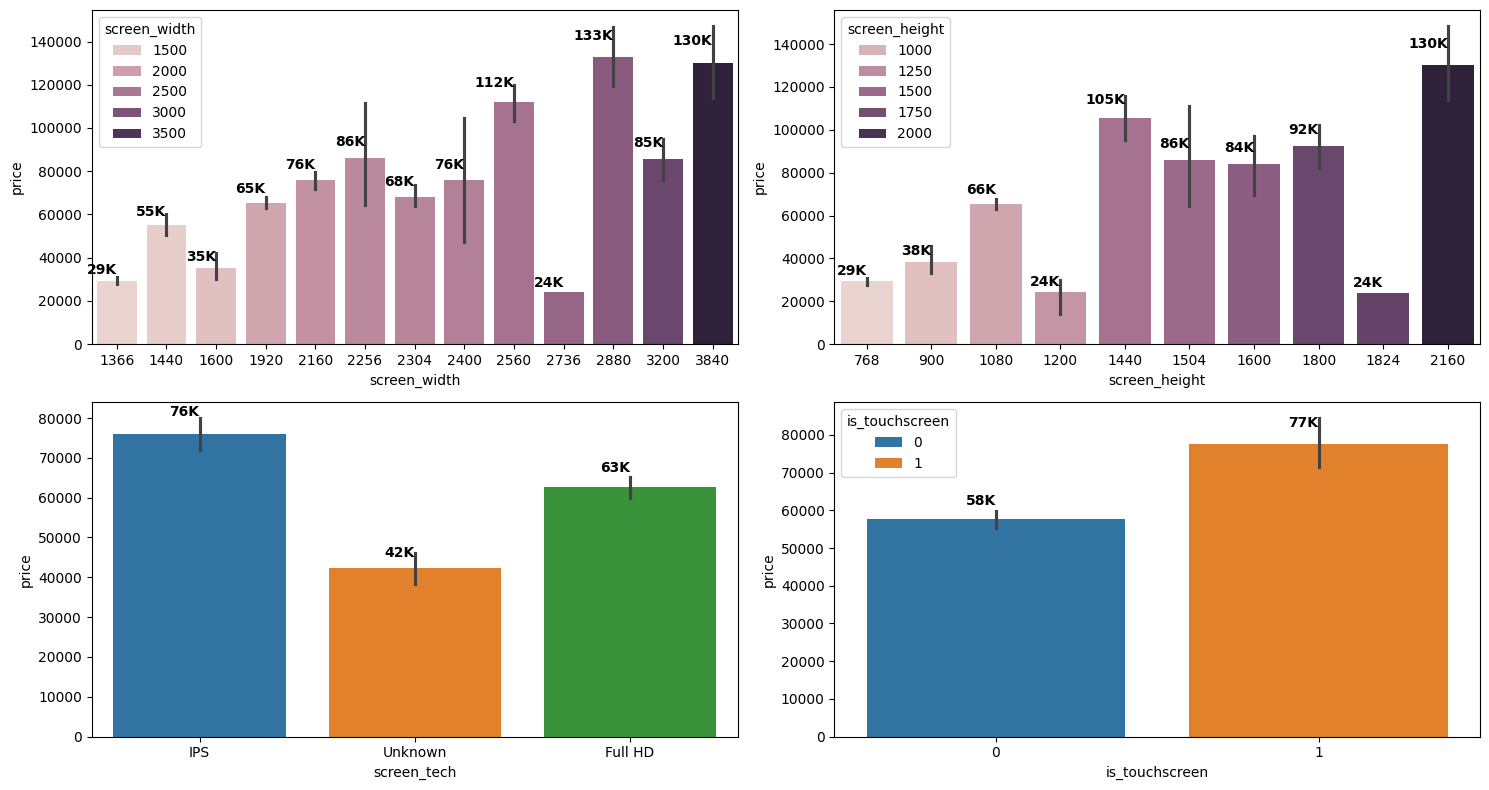

In [790]:
plt.figure(figsize=(15,8))
cols = ['screen_width','screen_height','screen_tech','is_touchscreen']

for i in range(1,5):
    plt.subplot(2,2,i)
    ax = sns.barplot(data = df, x = cols[i-1],y='price',estimator='mean',hue=cols[i-1])
    for p in ax.patches:
        if p.get_height()>0:
            ax.annotate(f'{round(p.get_height()/1000)}K',  
                        (p.get_x() + p.get_width() / 2, p.get_height()*1.05),  
                        ha='right', va='bottom', fontsize=10, fontweight='bold', color='black')
# plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

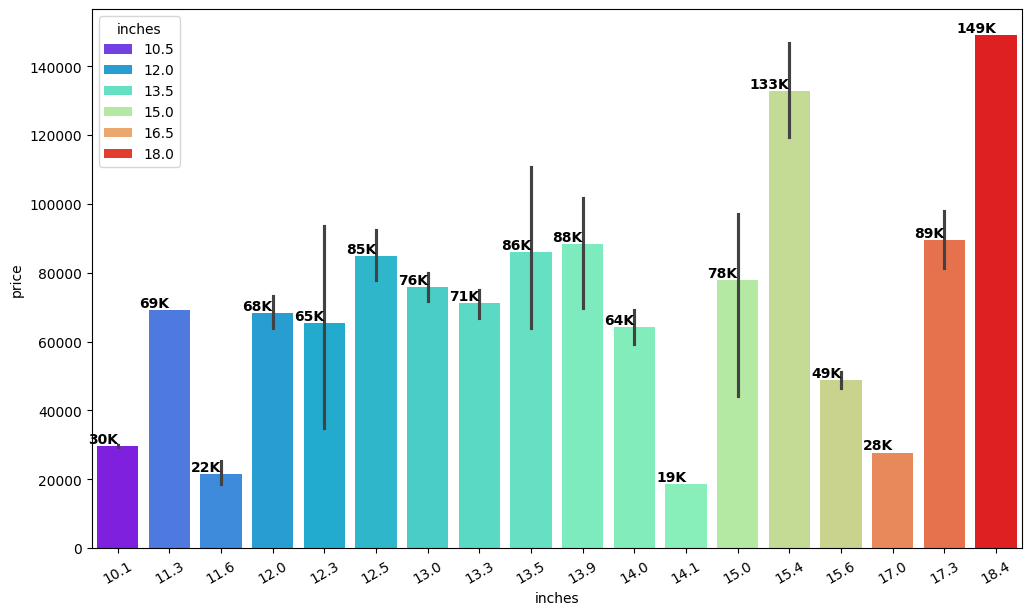

In [791]:
# it is best to visualize screen size as countplot instead of histogram due to unique values not exceeding 
plt.figure(figsize = (12,7))
ax = sns.barplot(data = df, x ='inches',y = 'price',estimator='mean',hue='inches',palette='rainbow')
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(f'{round(p.get_height()/1000)}K',  
                    (p.get_x() + p.get_width() / 2, p.get_height()),  
                    ha='right', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.xticks(rotation = 30)
plt.show()

* on an average IPS screen tech is more costly,
* as usual touch screen is most costly than normal screen

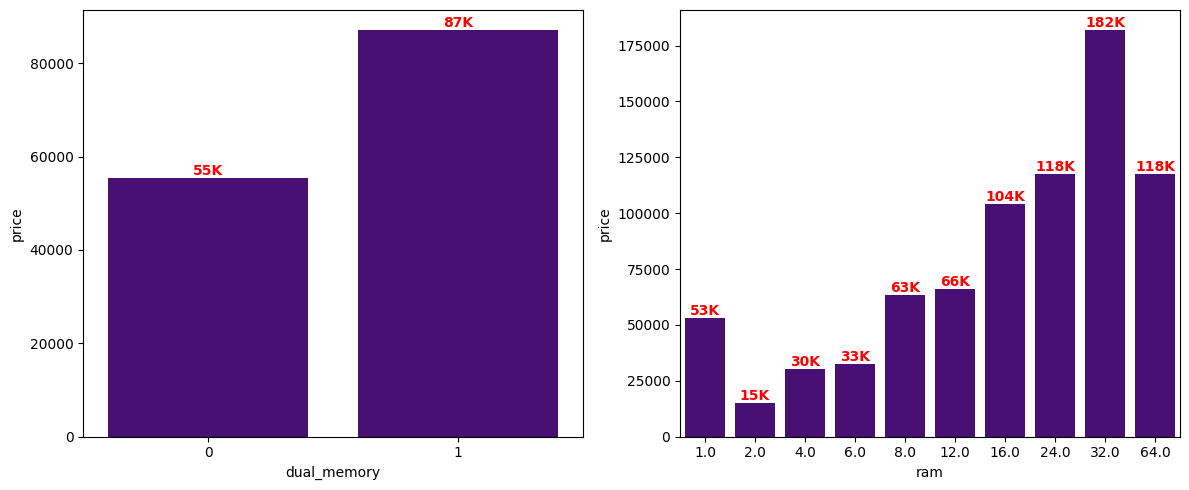

In [792]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First Barplot
ax1 = sns.barplot(data=df, x='dual_memory', y='price', estimator='mean', color='indigo',errorbar=None, ax=axes[0])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

# Second Barplot
ax2 = sns.barplot(data=df, x='ram', y='price', estimator='mean', color='indigo',errorbar = None, ax=axes[1])
for p in ax2.patches:
    ax2.annotate(f'{round(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

# Improve spacing and display
plt.tight_layout()
plt.show()


* on avg dual memory laptops has high pricing range
* increase in ram mostly has increase in pricing of the laptop

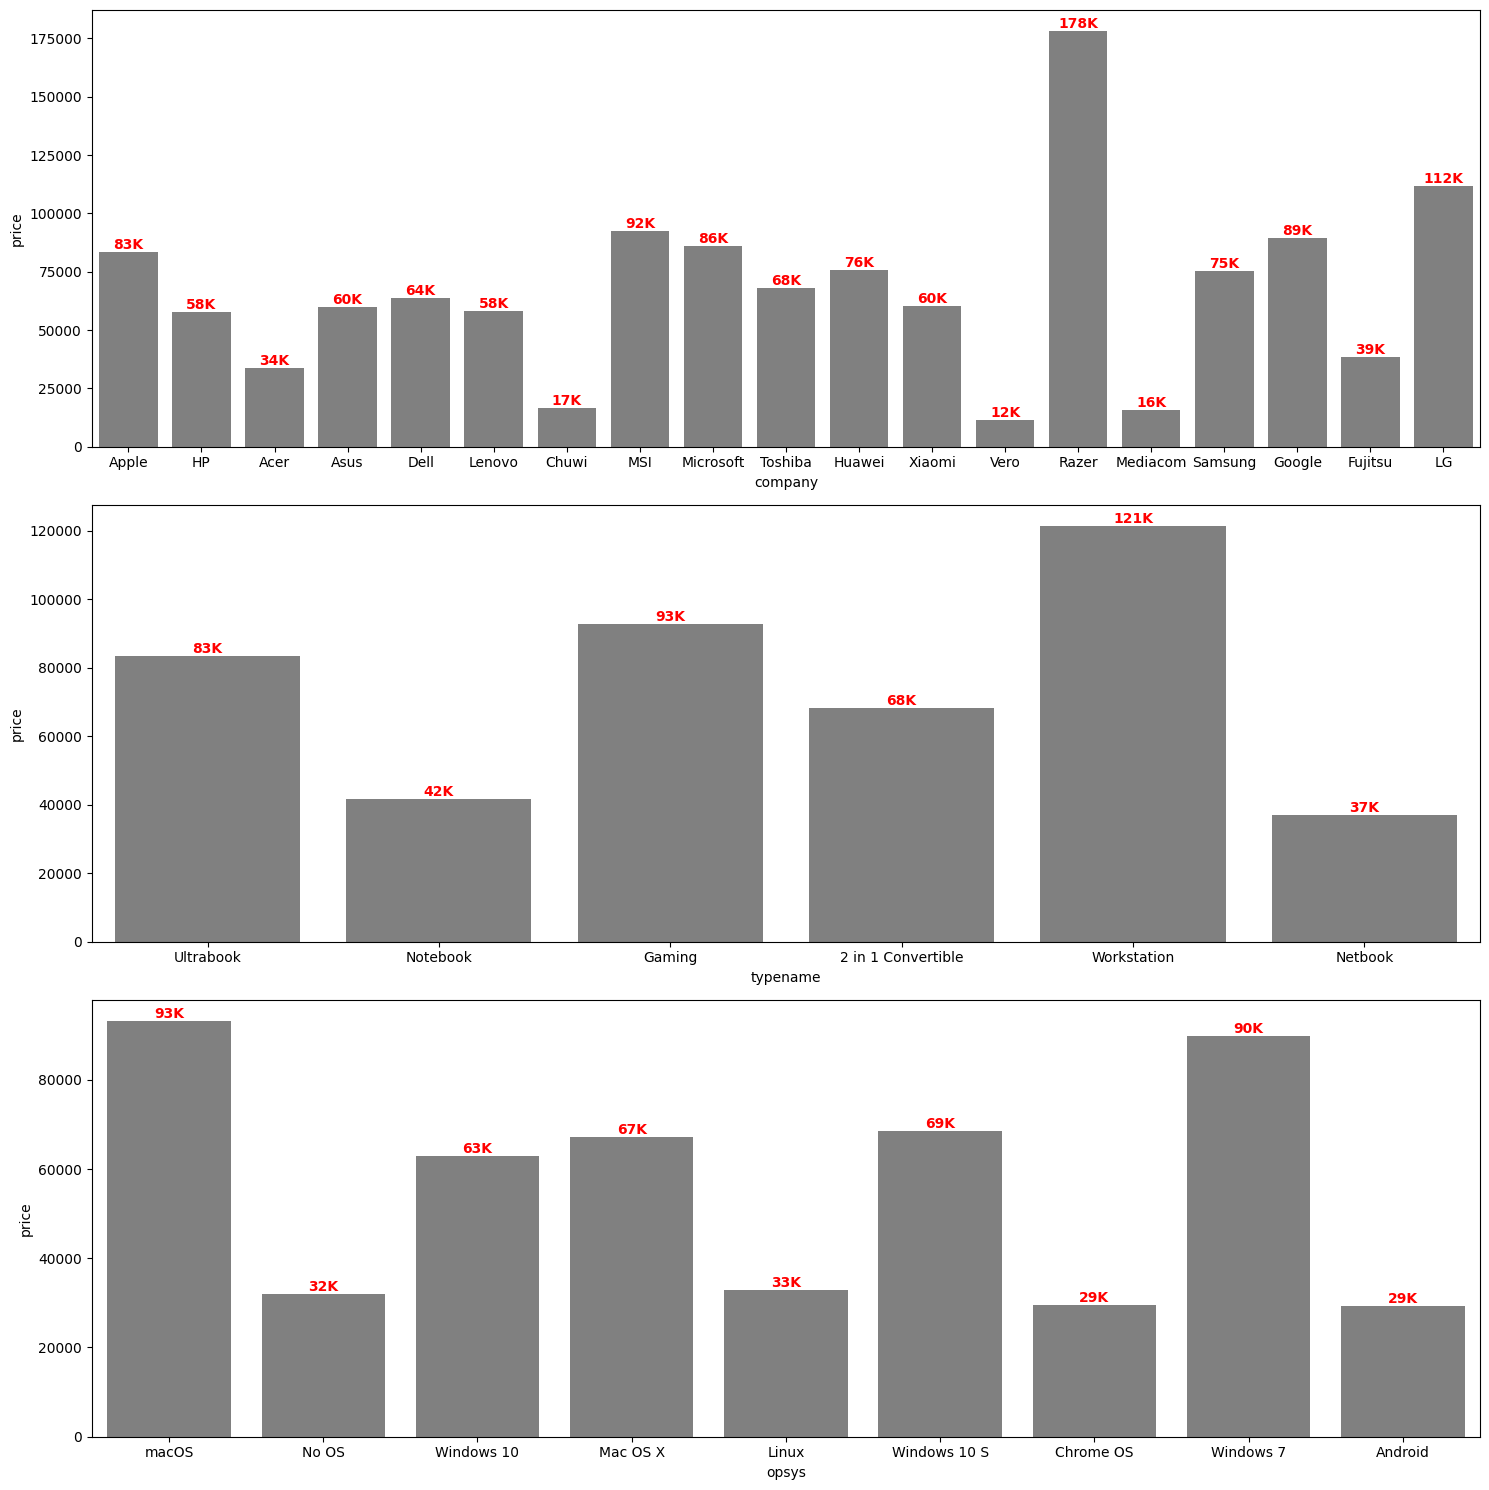

In [793]:
# Second Barplot

fig,axes = plt.subplots(3,1,figsize = (15,15))
ax1 = sns.barplot(data=df, x='company', y='price', estimator='mean', color='grey',errorbar = None,ax = axes[0])
for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
ax2 = sns.barplot(data=df, x='typename', y='price', estimator='mean', color='grey',errorbar = None,ax = axes[1])
for p in ax2.patches:
    ax2.annotate(f'{round(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
ax3 = sns.barplot(data=df, x='opsys', y='price', estimator='mean', color='grey',errorbar = None,ax = axes[2])
for p in ax3.patches:
    ax3.annotate(f'{round(p.get_height()/1000)}K',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
plt.tight_layout()
plt.show()

#### B) PRICE DISTRIBUTION AMONG CATEGORIES

* Razer company warkstation type and macos laptops have high price ranges

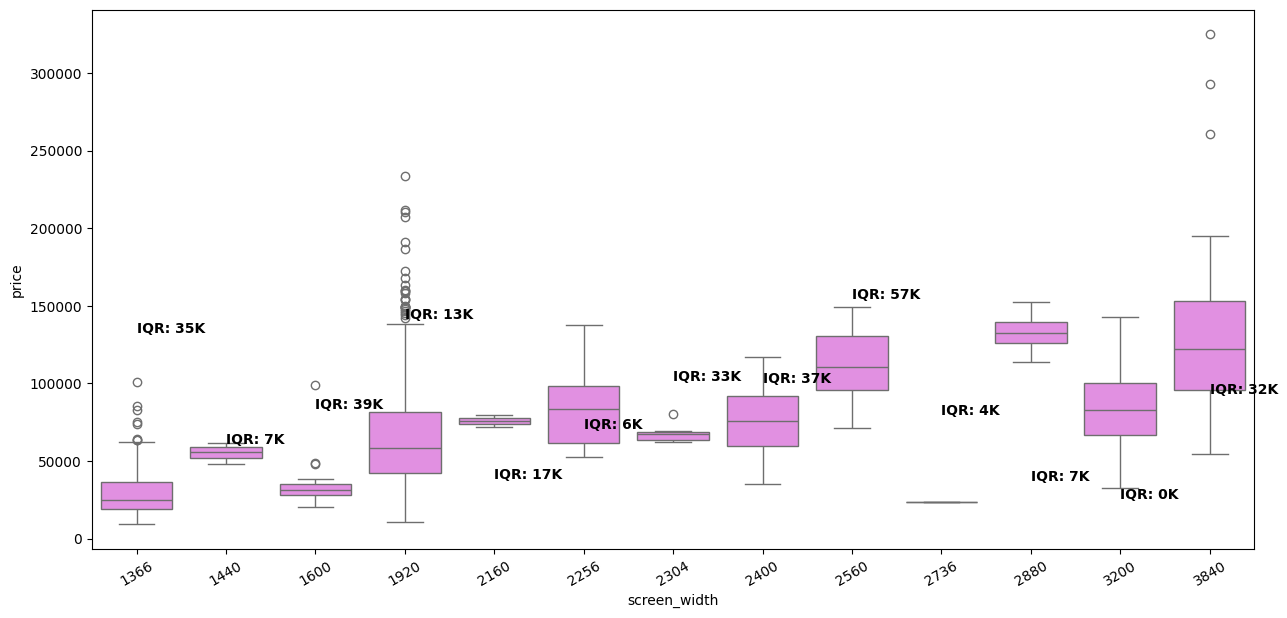

In [794]:
plt.figure(figsize=(15,7))
# Create boxplot
ax = sns.boxplot(data=df, x=cols[0], y='price', color='violet')

# Get IQR values (Q1 & Q3) for each category
for category in df[cols[0]].unique():
    data_category = df[df[cols[0]] == category]['price']
    
    Q1 = np.percentile(data_category, 25)
    Q3 = np.percentile(data_category, 75)
    IQR = Q3 - Q1
    
    # Get the x-coordinate for the category
    x_pos = list(df[cols[0]].unique()).index(category)
    
    # Annotate the IQR
    # ax.text(x_pos, Q3, f'Q3: {Q3/1000:.0f}K', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    # ax.text(x_pos, Q1, f'Q1: {Q1/1000:.0f}K', ha='center', va='top', fontsize=10, color='black', fontweight='bold')
    ax.text(x_pos, Q3, f'IQR: {IQR/1000:.0f}K', ha='left', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.show()


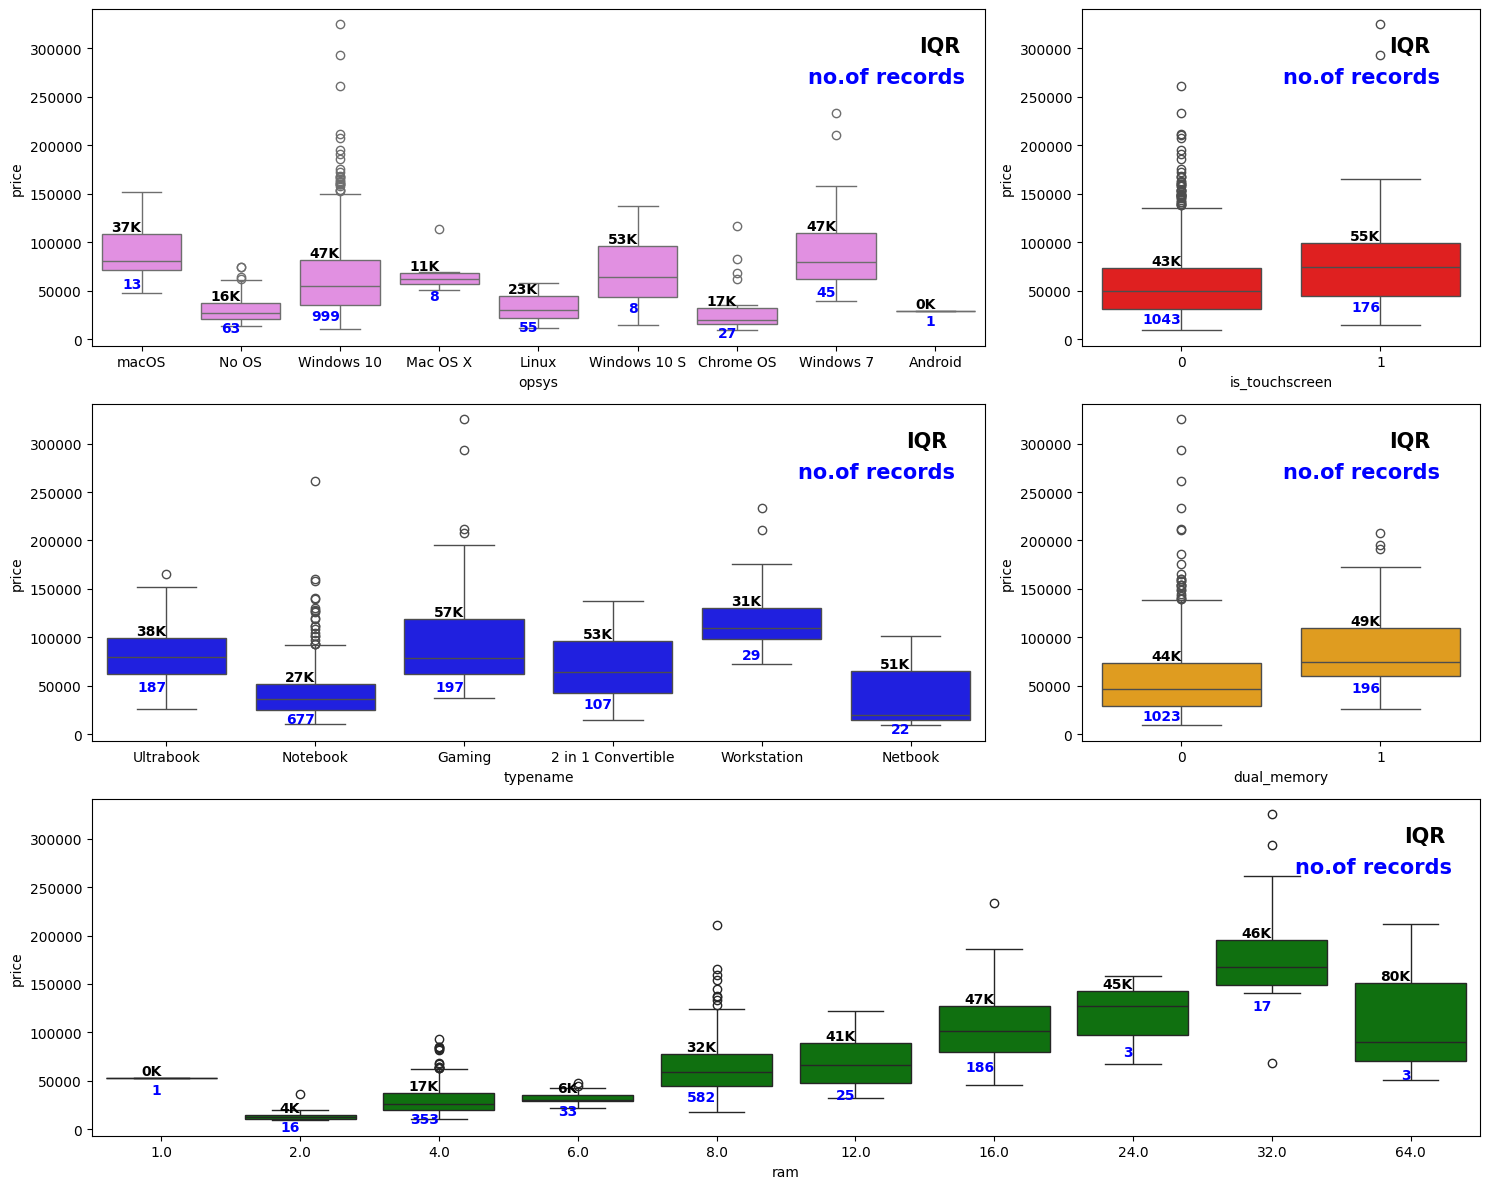

In [795]:
# df['ram'] = df['ram'].astype('str')
cols = ['opsys', 'is_touchscreen', 'typename', 'dual_memory', 'ram']
fig = plt.figure(figsize=(15, 12))

# Define subplot positions dynamically
positions = [ (3, 3, (1, 2)),   # First plot (spanning 2 slots in row 1)
              (3, 3, 3),        # Second plot (single slot in row 1)
              (3, 3, (4, 5)),   # Third plot (spanning 2 slots in row 2)
              (3, 3, 6),        # Fourth plot (single slot in row 2)
              (3, 3, (7, 9))]   # Fifth plot (spanning entire row 3)

# Loop through columns and plot
for i, (col, pos) in enumerate(zip(cols, positions)):
    ax = fig.add_subplot(*pos)  # Unpacking position tuple
    sns.boxplot(data=df, x=col, y='price', color=['violet', 'red', 'blue', 'orange', 'green'][i], ax=ax)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

    # Annotate IQR
    for category in df[col].unique():
        data_category = df[df[col] == category]['price']
        Q1, Q3 = np.percentile(data_category, [25, 75])
        IQR = Q3 - Q1
        x_pos = list(df[col].unique()).index(category)
        # as ram column is numerical the should be done based on column value instead of value_counts(because unique 
        # extracts category in order of descending frequency of the data)
        if col=='ram':
            x_pos = sorted(list(df[col].unique())).index(category)
        ax.text(x_pos, Q3, f'{IQR/1000:.0f}K', ha='right', va='bottom', fontsize=10, color='black', fontweight='bold')
        no_of_records = len(data_category)
        ax.text(x_pos, Q1*0.9, f'{no_of_records}', ha='right', va='top', fontsize=10, color='blue', fontweight='bold')


    ax.text(len(df[col].unique())-0.75, df['price'].max()*0.9, f'IQR', ha='right', va='bottom', fontsize=15, color='black', fontweight='bold')
    ax.text(len(df[col].unique())-0.7, df['price'].max()*0.8, f'no.of records', ha='right', va='bottom', fontsize=15, color='blue', fontweight='bold')

plt.tight_layout()
plt.show()


* from the plot it is clear that touchscreen,dualmemory has high Q1,Q3 and IQR 
* In opsys macos has high Q1 i.e. The starting price of macos is clearly high comparative to other os 
* In type workstation has high starting price(and Q1) comparative to other types 
* There is no clear distinction between ram but we can see increase in ram increases in price median on an avg

Text(18.3, 259963.77599999998, 'no.of records')

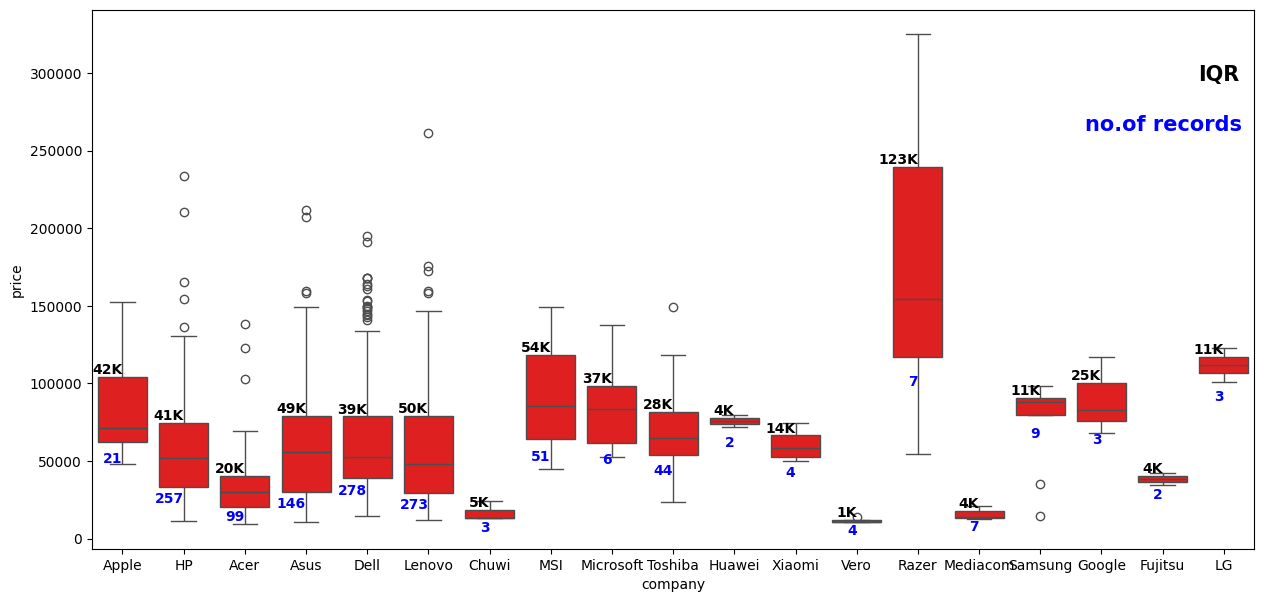

In [796]:
plt.figure(figsize = (15,7))
ax = sns.boxplot(data=df, x='company', y='price', color='red')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
col = 'company'
# Annotate IQR
for category in df[col].unique():
    data_category = df[df[col] == category]['price']
    Q1, Q3 = np.percentile(data_category, [25, 75])
    IQR = Q3 - Q1
    x_pos = list(df[col].unique()).index(category)
    ax.text(x_pos, Q3, f'{IQR/1000:.0f}K', ha='right', va='bottom', fontsize=10, color='black', fontweight='bold')
    no_of_records = len(data_category)
    ax.text(x_pos, Q1*0.9, f'{no_of_records}', ha='right', va='top', fontsize=10, color='blue', fontweight='bold')


ax.text(len(df[col].unique())-0.75, df['price'].max()*0.9, f'IQR', ha='right', va='bottom', fontsize=15, color='black', fontweight='bold')
ax.text(len(df[col].unique())-0.7, df['price'].max()*0.8, f'no.of records', ha='right', va='bottom', fontsize=15, color='blue', fontweight='bold')


* we can't extract any meaningful insights form the above boxplot of price distribution wrt company

#### C) PRICE DISTRIBUTION WRT CONTINUOUS FEATURES

<Axes: xlabel='clock_speed', ylabel='price_log'>

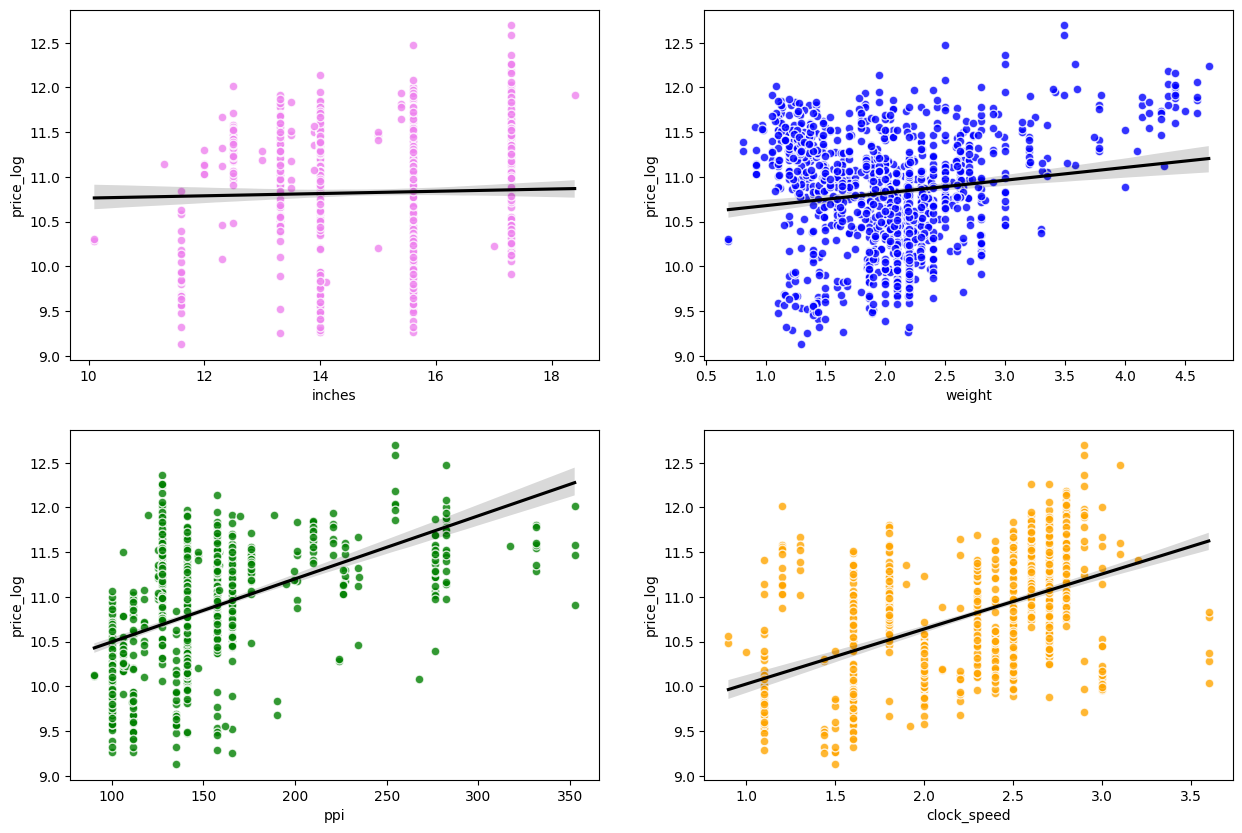

In [797]:
# SCATTERPLOT ANALYSIS OF CORRELATION COLUMNS
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
sns.regplot(data=df, x='inches', y='price_log', ax=ax1, 
            scatter=True, color='black', scatter_kws={'color': 'violet','edgecolor':'white','s':40})
ax2 = fig.add_subplot(2,2,2)
sns.regplot(data=df, x='weight', y='price_log', ax=ax2, 
            scatter=True, color='black', scatter_kws={'color': 'blue','edgecolor':'white','s':40})
ax3 = fig.add_subplot(2,2,3)
sns.regplot(data=df, x='ppi', y='price_log', ax=ax3, 
            scatter=True, color='black', scatter_kws={'color': 'green','edgecolor':'white','s':40})
ax4 = fig.add_subplot(2,2,4)
sns.regplot(data=df, x='clock_speed', y='price_log', ax=ax4, 
            scatter=True, color='black', scatter_kws={'color': 'orange','edgecolor':'white','s':40})

* We can see there is no relationship between price wrt inches and weight column
* but there is somewhat linear relationship between price wrt ppi and clock_speed variables

<Axes: >

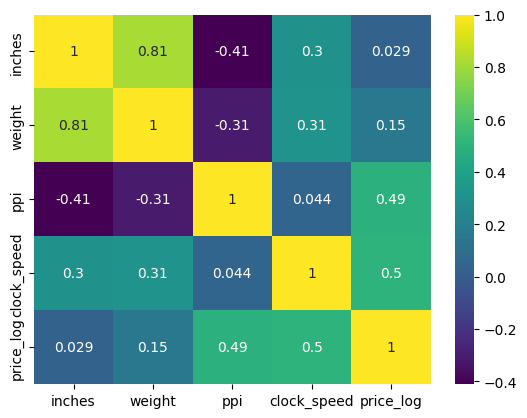

In [798]:
sns.heatmap(df[['inches','weight','ppi','clock_speed','price_log']].corr(method = 'pearson'),annot=True,cmap= 'viridis')

* as discussed above weigh and inches has negligible relationship with price_log column but 
* weight wrt inches has highest correlation of 0.8
* ppi and clock_speed has moderate correlation with price_log column

#### D) KDE PLOT OF PRICE FEATURE WRT CATEGORIES

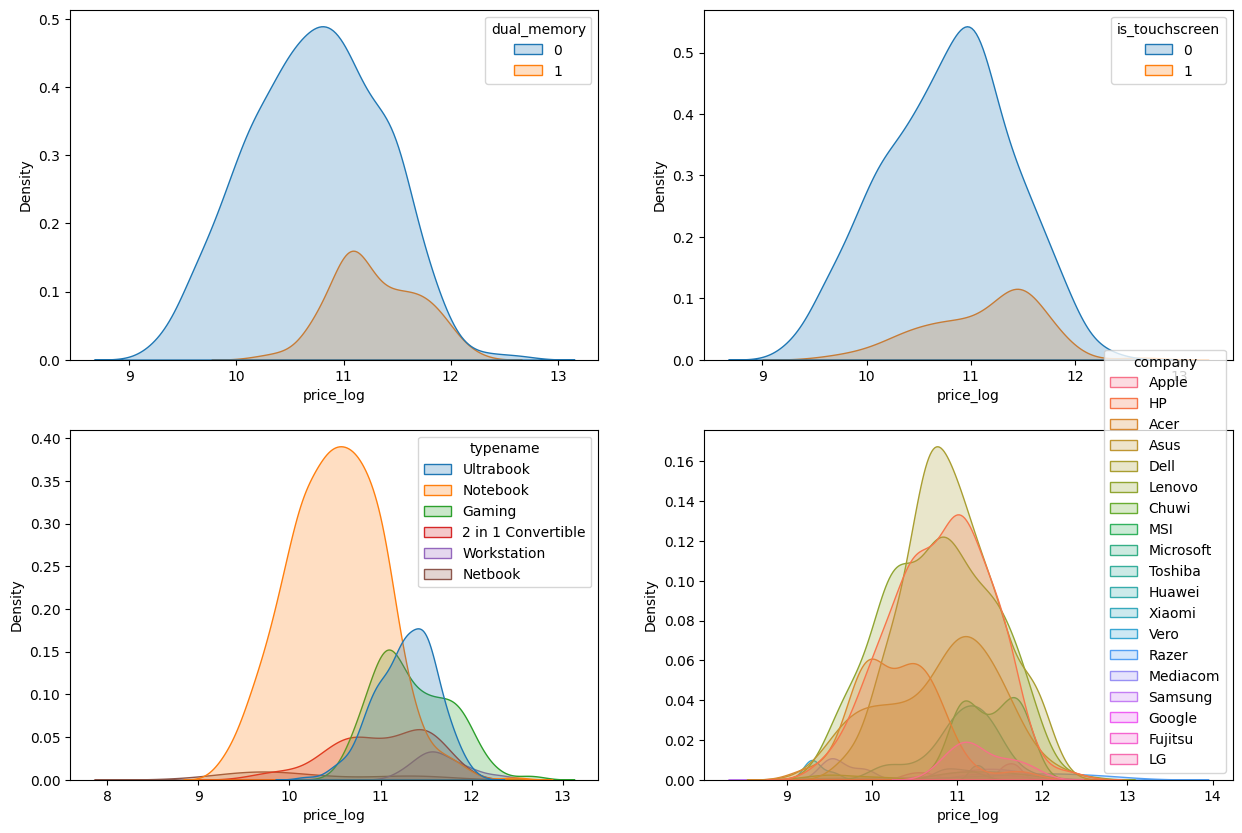

In [799]:
fig = plt.figure(figsize=(15,10))
cols = ['dual_memory','is_touchscreen','typename','company',]
for i in range(4):
    ax1 = fig.add_subplot(2,2,i+1)
    sns.kdeplot(data = df, x='price_log',hue=cols[i],fill=True,color = 'violet',ax=ax1)

### 3. MULTIVARIATE ANALYSIS

<Axes: xlabel='clock_speed', ylabel='price_log'>

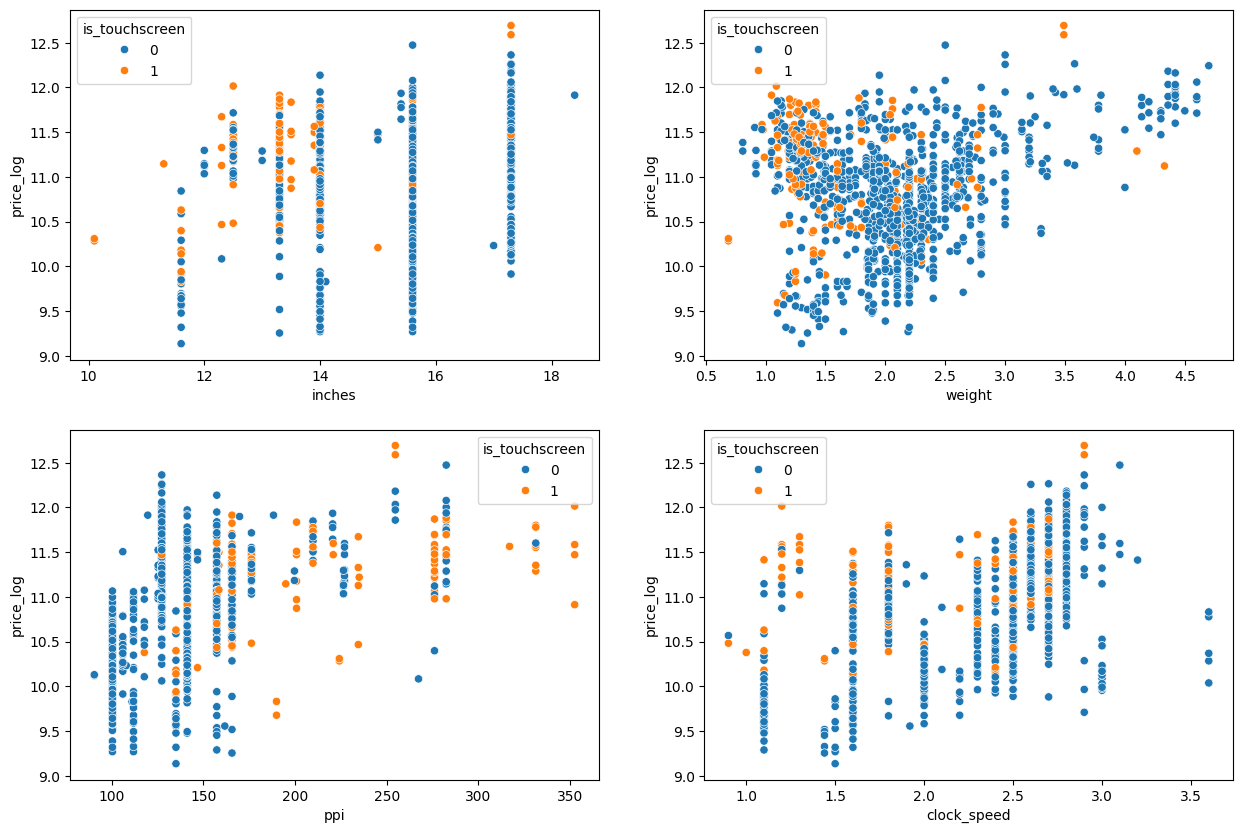

In [800]:
# SCATTERPLOT ANALYSIS OF CORRELATION COLUMNS
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
sns.scatterplot(data = df, x='inches',y='price_log',hue='is_touchscreen',color = 'violet',ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.scatterplot(data = df, x='weight',y='price_log',hue='is_touchscreen',color = 'blue',ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.scatterplot(data = df, x='ppi',y='price_log',hue='is_touchscreen',color = 'green',ax=ax3)

ax4 = fig.add_subplot(2,2,4)
sns.scatterplot(data = df, x='clock_speed',y='price_log',hue='is_touchscreen',color = 'orange',ax=ax4)


on a average touchscreen has high price range

<Axes: xlabel='clock_speed', ylabel='price_log'>

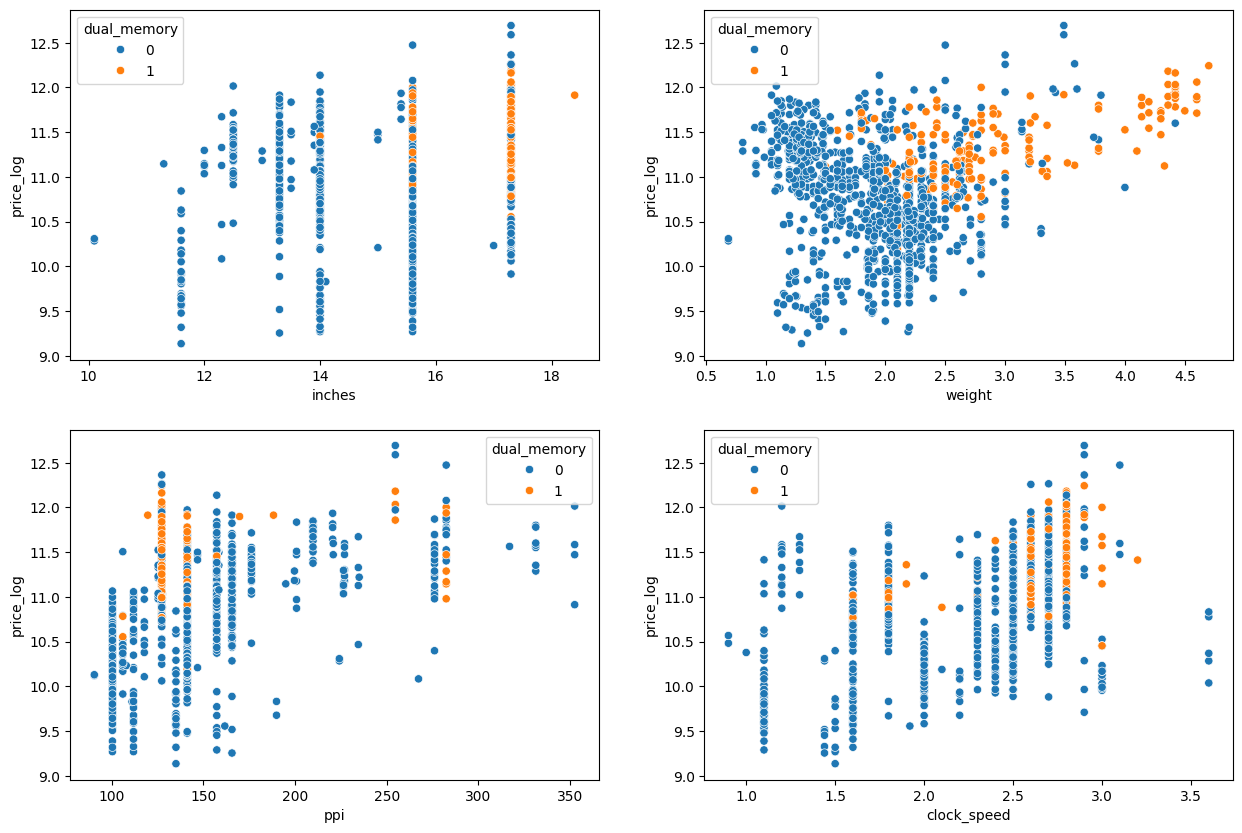

In [801]:
# SCATTERPLOT ANALYSIS OF CORRELATION COLUMNS
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
sns.scatterplot(data = df, x='inches',y='price_log',hue='dual_memory',color = 'violet',ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.scatterplot(data = df, x='weight',y='price_log',hue='dual_memory',color = 'blue',ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.scatterplot(data = df, x='ppi',y='price_log',hue='dual_memory',color = 'green',ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.scatterplot(data = df, x='clock_speed',y='price_log',hue='dual_memory',color = 'orange',ax=ax4)

* touchscreen and dual memory has high price ranges in comparative to no touchscreen and single memory laptops

## V. FEATURE ENGINEERING 

### 1. REMOVING UNNECESSARY COLUMUNS

In [802]:
df.columns

Index(['company', 'typename', 'inches', 'cpu', 'ram', 'gpu', 'opsys', 'weight',
       'price', 'ssd', 'hdd', 'flashstorage', 'hybrid', 'dual_memory',
       'screen_tech', 'screen_width', 'screen_height', 'aspect_ratio',
       'is_touchscreen', 'ppi', 'clock_speed', 'price_log'],
      dtype='object')

* We can remove screen_width, screen_height, aspect_ratio as they are represented by ppi 
* price column can be removed because we introduced price_log

In [803]:
try:
    df = df.drop(columns=['screen_width','screen_height','aspect_ratio'])
    print('dropped unnecessary columnn')
except: 
    print('error raised, the unnecessary columns are removed')
df.info()

dropped unnecessary columnn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1219 non-null   object 
 1   typename        1219 non-null   object 
 2   inches          1219 non-null   float64
 3   cpu             1219 non-null   object 
 4   ram             1219 non-null   float64
 5   gpu             1219 non-null   object 
 6   opsys           1219 non-null   object 
 7   weight          1219 non-null   float64
 8   price           1219 non-null   float64
 9   ssd             1219 non-null   int64  
 10  hdd             1219 non-null   int64  
 11  flashstorage    1219 non-null   int64  
 12  hybrid          1219 non-null   int64  
 13  dual_memory     1219 non-null   int64  
 14  screen_tech     1219 non-null   object 
 15  is_touchscreen  1219 non-null   int64  
 16  ppi             1219 non-null   float64
 17  clock

### 2. HYPOTHESIS TESTING

In [804]:
df.head()

company   typename  inches                         cpu   ram  \
0   Apple  Ultrabook    13.3        Intel Core i5 2.3GHz   8.0   
1   Apple  Ultrabook    13.3        Intel Core i5 1.8GHz   8.0   
2      HP   Notebook    15.6  Intel Core i5 7200U 2.5GHz   8.0   
3   Apple  Ultrabook    15.4        Intel Core i7 2.7GHz  16.0   
4   Apple  Ultrabook    13.3        Intel Core i5 3.1GHz   8.0   

                            gpu  opsys  weight        price  ssd  hdd  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  128    0   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232    0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000  256    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  512    0   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080  256    0   

   flashstorage  hybrid  dual_memory screen_tech  is_touchscreen     ppi  \
0             0       0            0         IPS               0  226.98   
1           128       0            0     Unknown               0  127.68   
2             0       0            0     Full HD               0  141.21   
3             0       0            0         IPS               0  220.53   
4             0       0            0         IPS               0  226.98   

   clock_speed  price_log  
0          2.3  11.175755  
1          1.8  10.776777  
2          2.5  10.329931  
3          2.7  11.814476  
4          3.1  11.473101

In [805]:
df.columns

Index(['company', 'typename', 'inches', 'cpu', 'ram', 'gpu', 'opsys', 'weight',
       'price', 'ssd', 'hdd', 'flashstorage', 'hybrid', 'dual_memory',
       'screen_tech', 'is_touchscreen', 'ppi', 'clock_speed', 'price_log'],
      dtype='object')

#### A) CORRELATION ANALYSIS

In [806]:
continuous_variables = ['clock_speed','inches','weight','ppi','ssd','hdd','flashstorage','hybrid','ram']

In [807]:
# correlation analysis

def correlation_test(df,cont_variable,target_variable):
    var_stat,var_p_value = shapiro(df[cont_variable])
    if var_p_value>=0.05:
        print(f'{cont_variable} is normally distributed --> using pearson correlation')
        corr, p_value = pearsonr(df[target_variable],df[cont_variable])
    else:
        print(f'{cont_variable} is not normally distributed --> using spearman correlation')
        corr, p_value = spearmanr(df[target_variable],df[cont_variable])
    if p_value <0.05:
        print(f'p_value: {p_value}, So "{cont_variable}" is statistcally significant and required\n') 
    else:
        print(f'p_value: {p_value}, So "{cont_variable}" is statistcally insignificant and does not required  <<==  <<==\n') 
    return corr,p_value

corr_parameter_dict = {}    
for i in continuous_variables:
    corr,p_value = correlation_test(df,i,'price_log')
    corr_parameter_dict[i] = [corr,p_value]


clock_speed is not normally distributed --> using spearman correlation
p_value: 3.5444070112480644e-88, So "clock_speed" is statistcally significant and required

inches is not normally distributed --> using spearman correlation
p_value: 0.049936128435960625, So "inches" is statistcally significant and required

weight is not normally distributed --> using spearman correlation
p_value: 0.40253405594418346, So "weight" is statistcally insignificant and does not required  <<==  <<==

ppi is not normally distributed --> using spearman correlation
p_value: 3.100454573825902e-85, So "ppi" is statistcally significant and required

ssd is not normally distributed --> using spearman correlation
p_value: 1.848760707511492e-170, So "ssd" is statistcally significant and required

hdd is not normally distributed --> using spearman correlation
p_value: 8.570820715623201e-08, So "hdd" is statistcally significant and required

flashstorage is not normally distributed --> using spearman correlation
p_

* it is found that inches,weight and hybrid columns are statistically insignificant 
* so we will descretize inches and weight columns and perform anova test to check for any significance

#### B) T-TEST

In [808]:
categorical_variables = ['is_touchscreen','dual_memory']


In [809]:
def students_ttest(df,cat_variable,target_variable):
    if df[cat_variable].nunique()!=2:
        print(f"{cat_variable} variable doesn't contain 2 categories use anova or other tests for proper results ")
        return None
    variable_group1,variable_group2 =[df[df[cat_variable]==var][target_variable]for var in df[cat_variable].unique()]
    stat,var_p_value = levene(variable_group1,variable_group2)
    #Null Hypothesis for shape test ==> variances are equal
    if var_p_value>=0.05: #Failing to Reject Null Hypothesis
        print(f'{var_p_value} is greater than or equal 0.05, variances are equal --> Proceeding with students ttest for "{cat_variable}" column')
        t_stat,p_value = ttest_ind(variable_group1,variable_group2,equal_var=True)

    else: # Rejecting Null hypothesis
        print(f'{var_p_value} is less than 0.05, variances are significantly different --> Using Welchs ttest for "{cat_variable}" column')
        t_stat,p_value = ttest_ind(variable_group1,variable_group2,equal_var=False)
    # Null Hypothesis for categorical_variable: The means of two groups are equal ==> cat_variable doesn't impact the target variable
    if p_value <0.05:# Rejecting null hypothesis
        print(f'p_value: {p_value}, So "{cat_variable}" is statistcally significant and required\n') 

    else:# Accepting Null Hypothesis
        print(f'p_value: {p_value}, So "{cat_variable}" is statistcally insignificant and does not required  <<==  <<==\n') 
    return t_stat,p_value

ttest_parameter_dict = {}    
for i in categorical_variables:
    t_stat,p_value = students_ttest(df,i,'price_log')
    ttest_parameter_dict[i] = [t_stat,p_value]


0.05586640088092453 is greater than or equal 0.05, variances are equal --> Proceeding with students ttest for "is_touchscreen" column
p_value: 1.5854720429319426e-11, So "is_touchscreen" is statistcally significant and required

6.94911531134758e-11 is less than 0.05, variances are significantly different --> Using Welchs ttest for "dual_memory" column
p_value: 5.892730598203667e-45, So "dual_memory" is statistcally significant and required



#### C) ANOVA TEST 

In [810]:
multi_categorical_variables = list(set(df.columns) - set(continuous_variables) - {'price', 'price_log'} - set(categorical_variables))
print(multi_categorical_variables)

['gpu', 'company', 'screen_tech', 'cpu', 'typename', 'opsys']


In [811]:

def anova_test(df,cat_variable,target_variable):
    variable_groups =[df[df[cat_variable]==var][target_variable]for var in df[cat_variable].unique()]
    stat,var_p_value = levene(*variable_groups)
    #Null Hypothesis for shape test ==> variances are equal
    if var_p_value>=0.05: #Failing to Reject Null Hypothesis
        print(f'{var_p_value} is greater than or equal 0.05, variances are equal --> Proceed with one-way anova for "{cat_variable}" column')
        f_stat, p_value = f_oneway(*variable_groups)

    else: # Rejecting Null hypothesis
        print(f'{var_p_value} is less than 0.05, variances are significantly different --> Use Welchs anova for "{cat_variable}" column')
        anova_results = pg.welch_anova(data=df, dv="price_log", between=cat_variable)
        p_value = anova_results.iloc[0]['p-unc']
        
    # Null Hypothesis for categorical_variable: The means of two groups are equal ==> cat_variable doesn't impact the target variable
    if p_value <0.05:# Rejecting null hypothesis
        print(f'p_value: {p_value}, So "{cat_variable}" is statistcally significant and required\n') 

    else:# Accepting Null Hypothesis
        print(f'p_value: {p_value}, So "{cat_variable}" is statistcally insignificant and does not required  <<==  <<==\n') 
    return p_value

anova_parameter_dict = {}    
for i in multi_categorical_variables:
    p_value = anova_test(df,i,'price_log')
    anova_parameter_dict[i] = p_value

2.5958473475894558e-39 is less than 0.05, variances are significantly different --> Use Welchs anova for "gpu" column
p_value: 3.775903211451267e-101, So "gpu" is statistcally significant and required

1.1746229639582795e-10 is less than 0.05, variances are significantly different --> Use Welchs anova for "company" column
p_value: 2.515369246797676e-16, So "company" is statistcally significant and required

0.0002198370971983525 is less than 0.05, variances are significantly different --> Use Welchs anova for "screen_tech" column
p_value: 3.22673769711946e-48, So "screen_tech" is statistcally significant and required

5.5785034215251994e-14 is less than 0.05, variances are significantly different --> Use Welchs anova for "cpu" column
p_value: 1.0, So "cpu" is statistcally insignificant and does not required  <<==  <<==

6.788945541232906e-15 is less than 0.05, variances are significantly different --> Use Welchs anova for "typename" column
p_value: 6.118759913181161e-59, So "typename" 

In [812]:
#The `cpu` column is showing 1.0 and produced a warning, it is because many categories in the `cpu` column has too few values when 
# you observe value_counts we can see that within group variance is negligible
print(df['cpu'].nunique())
df['cpu'].value_counts().tail(53)

118


cpu
AMD A6-Series A6-9220 2.5GHz             2
AMD E-Series 9000e 1.5GHz                1
Intel Core i7 2.9GHz                     1
Intel Celeron Dual Core N3060 1.60GHz    1
AMD A12-Series 9700P 2.5GHz              1
Intel Core i7 7500U 2.5GHz               1
Intel Pentium Dual Core 4405U 2.1GHz     1
AMD A4-Series 7210 2.2GHz                1
Intel Core i7 6560U 2.2GHz               1
Intel Core M m7-6Y75 1.2GHz              1
AMD FX 8800P 2.1GHz                      1
Intel Core M M7-6Y75 1.2GHz              1
Intel Core i5 7200U 2.50GHz              1
Intel Core i5 7200U 2.70GHz              1
Intel Core i5 7200U 2.7GHz               1
Intel Pentium Dual Core N4200 1.1GHz     1
Intel Core M m3 1.2GHz                   1
Intel Pentium Dual Core 4405Y 1.5GHz     1
Intel Core i7 2.8GHz                     1
Intel Core M 6Y54 1.1GHz                 1
Intel Core i7 2.2GHz                     1
Intel Core i5 2.9GHz                     1
Intel Core i7 2.7GHz                     1
Samsung

* Almost 52 out of 118 groups contain only 1 record so welch anova test failed
* as we already extracted clock speed from cpu column we will convert the column by converting all cpu groups with less than 3 count to 'other'

### 3. CREATING & TESTING NEW FEATURES & APPLYING HYPOTHESIS TESTING

#### A) DISCRETIZATION OF INCHES AND WEIGHT COLUMN

In [813]:
# Define bins and labels for screen size
inches_bins = [0, 12, 14, 16, float('inf')]  #0 and float('inf') is given to avoid np.nan values
inches_labels = ["Ultraportable", "Thin & Light", "Mainstream", "Desktop Replacement"]

# Apply binning
df['screen_category'] = pd.cut(df['inches'], bins=inches_bins, labels=inches_labels, include_lowest=True)

# Display
df[['inches', 'screen_category']].head()

inches screen_category
0    13.3    Thin & Light
1    13.3    Thin & Light
2    15.6      Mainstream
3    15.4      Mainstream
4    13.3    Thin & Light

In [814]:

# Define bins and labels for weight
weight_bins = [0, 1.5, 2.5, 4, float('inf')]  
weight_labels = ["Ultra-Light", "Lightweight", "Medium", "Heavy"]

# Apply binning
df['weight_category'] = pd.cut(df['weight'], bins=weight_bins, labels=weight_labels, include_lowest=True)

# Display
df[['weight', 'weight_category']].head()


weight weight_category
0    1.37     Ultra-Light
1    1.34     Ultra-Light
2    1.86     Lightweight
3    1.83     Lightweight
4    1.37     Ultra-Light

#### B) GROUPING CPU and GPU COLUMN

In [815]:
# converting cpu and gpu columns
df['cpu_common'] =df['cpu'].apply(lambda x: x if len(df[df['cpu']==x]) >9 else 'other')
df['gpu_common'] =df['gpu'].apply(lambda x: x if len(df[df['gpu']==x]) >9 else 'other')
print(df['cpu_common'].nunique())
print(df['gpu_common'].nunique())

23
25


#### C) PERFORMING ANOVA TEST FOR NEW FEATURES

In [816]:
new_features = ['screen_category','weight_category','cpu_common','gpu_common']
for i in new_features:
    p_value = anova_test(df,i,'price_log')

0.04582519027042498 is less than 0.05, variances are significantly different --> Use Welchs anova for "screen_category" column
p_value: 4.4218193074794834e-30, So "screen_category" is statistcally significant and required

7.633601867110344e-05 is less than 0.05, variances are significantly different --> Use Welchs anova for "weight_category" column
p_value: 6.77758760416546e-60, So "weight_category" is statistcally significant and required

2.1135976722155184e-95 is less than 0.05, variances are significantly different --> Use Welchs anova for "cpu_common" column
p_value: 6.648476087697272e-106, So "cpu_common" is statistcally significant and required

1.280661211935475e-58 is less than 0.05, variances are significantly different --> Use Welchs anova for "gpu_common" column
p_value: 1.7838546487316967e-107, So "gpu_common" is statistcally significant and required



## VI. INITIAL ASSESSMENT FOR SELECTING THE BEST ML MODEL

### 1.ENCODING

#### A) NOMINAL/ORDINAL ENCODING

* for basic evalutaion we will use ordinalEncoder to encode all variables

In [817]:
#Ordinal Encoding for object datatype
cols1 = df.select_dtypes(include='object').columns
cols2 = df.select_dtypes(include = 'category').columns
cols = list(cols1) + list(cols2)
screen_order = ['Ultraportable','Thin & Light','Mainstream','Desktop Replacement'][::-1]
weight_order = ['Heavy','Medium','Lightweight','Ultra-Light']
order = [df[col].unique() for col in cols1]
order = order +[screen_order,weight_order]
ordinal_encoding_initial = OrdinalEncoder(categories = order)
ordinal_encoding_initial_array = ordinal_encoding_initial.fit_transform(df[cols])
ordinal_encoding_initial_df = pd.DataFrame(data = ordinal_encoding_initial_array,columns = cols)
ordinal_encoding_initial_df.head()

company  typename  cpu  gpu  opsys  screen_tech  cpu_common  gpu_common  \
0      0.0       0.0  0.0  0.0    0.0          0.0         0.0         0.0   
1      0.0       0.0  1.0  1.0    0.0          1.0         0.0         0.0   
2      1.0       1.0  2.0  2.0    1.0          2.0         1.0         1.0   
3      0.0       0.0  3.0  3.0    0.0          0.0         0.0         0.0   
4      0.0       0.0  4.0  4.0    0.0          0.0         0.0         0.0   

   screen_category  weight_category  
0              2.0              3.0  
1              2.0              3.0  
2              1.0              2.0  
3              1.0              2.0  
4              2.0              3.0

In [818]:
df_initial_encoded = pd.concat([ordinal_encoding_initial_df,df.select_dtypes(include='number')],axis=1)
df_initial_encoded.head()

company  typename  cpu  gpu  opsys  screen_tech  cpu_common  gpu_common  \
0      0.0       0.0  0.0  0.0    0.0          0.0         0.0         0.0   
1      0.0       0.0  1.0  1.0    0.0          1.0         0.0         0.0   
2      1.0       1.0  2.0  2.0    1.0          2.0         1.0         1.0   
3      0.0       0.0  3.0  3.0    0.0          0.0         0.0         0.0   
4      0.0       0.0  4.0  4.0    0.0          0.0         0.0         0.0   

   screen_category  weight_category  ...        price  ssd  hdd  flashstorage  \
0              2.0              3.0  ...   71378.6832  128    0             0   
1              2.0              3.0  ...   47895.5232    0    0           128   
2              1.0              2.0  ...   30636.0000  256    0             0   
3              1.0              2.0  ...  135195.3360  512    0             0   
4              2.0              3.0  ...   96095.8080  256    0             0   

   hybrid  dual_memory  is_touchscreen     ppi  clock_speed  price_log  
0       0            0               0  226.98          2.3  11.175755  
1       0            0               0  127.68          1.8  10.776777  
2       0            0               0  141.21          2.5  10.329931  
3       0            0               0  220.53          2.7  11.814476  
4       0            0               0  226.98          3.1  11.473101  

[5 rows x 23 columns]

### 2. FEATURE-TARGET VARIABLE SEGMENTATION

In [819]:
X_initial = df_initial_encoded.drop(columns = ['price_log','price'])
y_initial = df_initial_encoded['price_log']

print('X_initial.shape:',X_initial.shape)
print('y_initial.shape:',y_initial.shape)

X_initial.shape: (1219, 21)
y_initial.shape: (1219,)


### 3. SCALING

In [820]:
X_initial = X_initial.astype('float64')
sc = StandardScaler()
X_initial.iloc[:,:] = sc.fit_transform(X_initial)
X_initial.head()

company  typename       cpu       gpu    opsys  screen_tech  cpu_common  \
0 -1.409618 -1.288079 -1.073633 -0.952591 -1.86845    -1.387128   -1.117356   
1 -1.409618 -1.288079 -1.034989 -0.907581 -1.86845    -0.183634   -1.117356   
2 -1.048701 -0.317641 -0.996345 -0.862571 -1.06363     1.019860   -0.950007   
3 -1.409618 -1.288079 -0.957701 -0.817561 -1.86845    -1.387128   -1.117356   
4 -1.409618 -1.288079 -0.919057 -0.772551 -1.86845    -1.387128   -1.117356   

   gpu_common  screen_category  weight_category  ...       ram    weight  \
0   -0.975867         1.035410         1.324623  ... -0.092287 -0.997244   
1   -0.975867         1.035410         1.324623  ... -0.092287 -1.041634   
2   -0.823746        -0.363886        -0.096781  ... -0.092287 -0.272204   
3   -0.975867        -0.363886        -0.096781  ...  1.334000 -0.316594   
4   -0.975867         1.035410         1.324623  ... -0.092287 -0.997244   

        ssd       hdd  flashstorage    hybrid  dual_memory  is_touchscreen  \
0 -0.312188 -0.792922     -0.147525 -0.089807    -0.437714       -0.410785   
1 -0.991830 -0.792922      3.974725 -0.089807    -0.437714       -0.410785   
2  0.367454 -0.792922     -0.147525 -0.089807    -0.437714       -0.410785   
3  1.726738 -0.792922     -0.147525 -0.089807    -0.437714       -0.410785   
4  0.367454 -0.792922     -0.147525 -0.089807    -0.437714       -0.410785   

        ppi  clock_speed  
0  1.864251    -0.004187  
1 -0.446304    -0.993412  
2 -0.131482     0.391502  
3  1.714170     0.787192  
4  1.864251     1.578572  

[5 rows x 21 columns]

### 4. DATA PARTITIONING

In [821]:

X_initial_train,X_initial_test,y_initial_train,y_initial_test = train_test_split(X_initial,y_initial,test_size=0.2,random_state=42)
print('X_initial_train.shape',X_initial_train.shape)
print('X_initial_test.shape',X_initial_test.shape)
print('y_initial_train.shape',y_initial_train.shape)
print('y_initial_test.shape',y_initial_test.shape)


X_initial_train.shape (975, 21)
X_initial_test.shape (244, 21)
y_initial_train.shape (975,)
y_initial_test.shape (244,)


### 5. MODEL SELECTION

In [822]:
models = {
    "Linear":LinearRegression(),
    "KNN":KNeighborsRegressor(n_neighbors=5),
    "Decision Tree":DecisionTreeRegressor(random_state=42),
    "Random Forest":RandomForestRegressor(n_estimators=100,random_state=42),
    "SVR-Linear":SVR(kernel = 'linear'),
    "SVR-NonLinear":SVR(kernel='rbf'),
    "XGBoost":XGBRegressor(n_estimators=100,random_state = 42)
}

In [823]:
def model_predictions(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    return model.predict(X_train),model.predict(X_test)
def metrics(y_pred,y_test):
    r2 = r2_score(y_pred,y_test)
    mae = mean_absolute_error(y_pred,y_test)
    mse = mean_squared_error(y_pred,y_test)
    rmse = root_mean_squared_error(y_pred,y_test)
    return {"MAE":round(mae,2),"MSE":round(mse,2),"RMSE":round(rmse,2),"R2_SCORE":round(r2,4)}

In [824]:
predictions = {}
results = {}
for name,model in models.items():
    y_initial_train_pred,y_initial_test_pred = model_predictions(model,X_initial_train,y_initial_train,X_initial_test)
    train_results = metrics(y_initial_train_pred,y_initial_train)
    test_results = metrics(y_initial_test_pred,y_initial_test)
    predictions[name] = [y_initial_train_pred,y_initial_test_pred]
    results[name+"_train_results"] = train_results 
    results[name+"_test_results"] = test_results 

In [825]:
results_df = pd.DataFrame(results).T
results_df

MAE   MSE  RMSE  R2_SCORE
Linear_train_results         0.27  0.12  0.34    0.5713
Linear_test_results          0.28  0.12  0.35    0.5366
KNN_train_results            0.18  0.06  0.24    0.8179
KNN_test_results             0.22  0.08  0.28    0.7386
Decision Tree_train_results  0.00  0.00  0.00    1.0000
Decision Tree_test_results   0.24  0.11  0.32    0.7464
Random Forest_train_results  0.06  0.01  0.08    0.9807
Random Forest_test_results   0.17  0.05  0.23    0.8560
SVR-Linear_train_results     0.27  0.12  0.35    0.5870
SVR-Linear_test_results      0.28  0.12  0.35    0.5502
SVR-NonLinear_train_results  0.13  0.03  0.17    0.9146
SVR-NonLinear_test_results   0.20  0.06  0.25    0.7968
XGBoost_train_results        0.02  0.00  0.03    0.9975
XGBoost_test_results         0.16  0.05  0.22    0.8760

### 6. GRAPHICAL REPRESENTATIONS OF Y_TEST and Y_PRED FOR VARIOUS MODELS

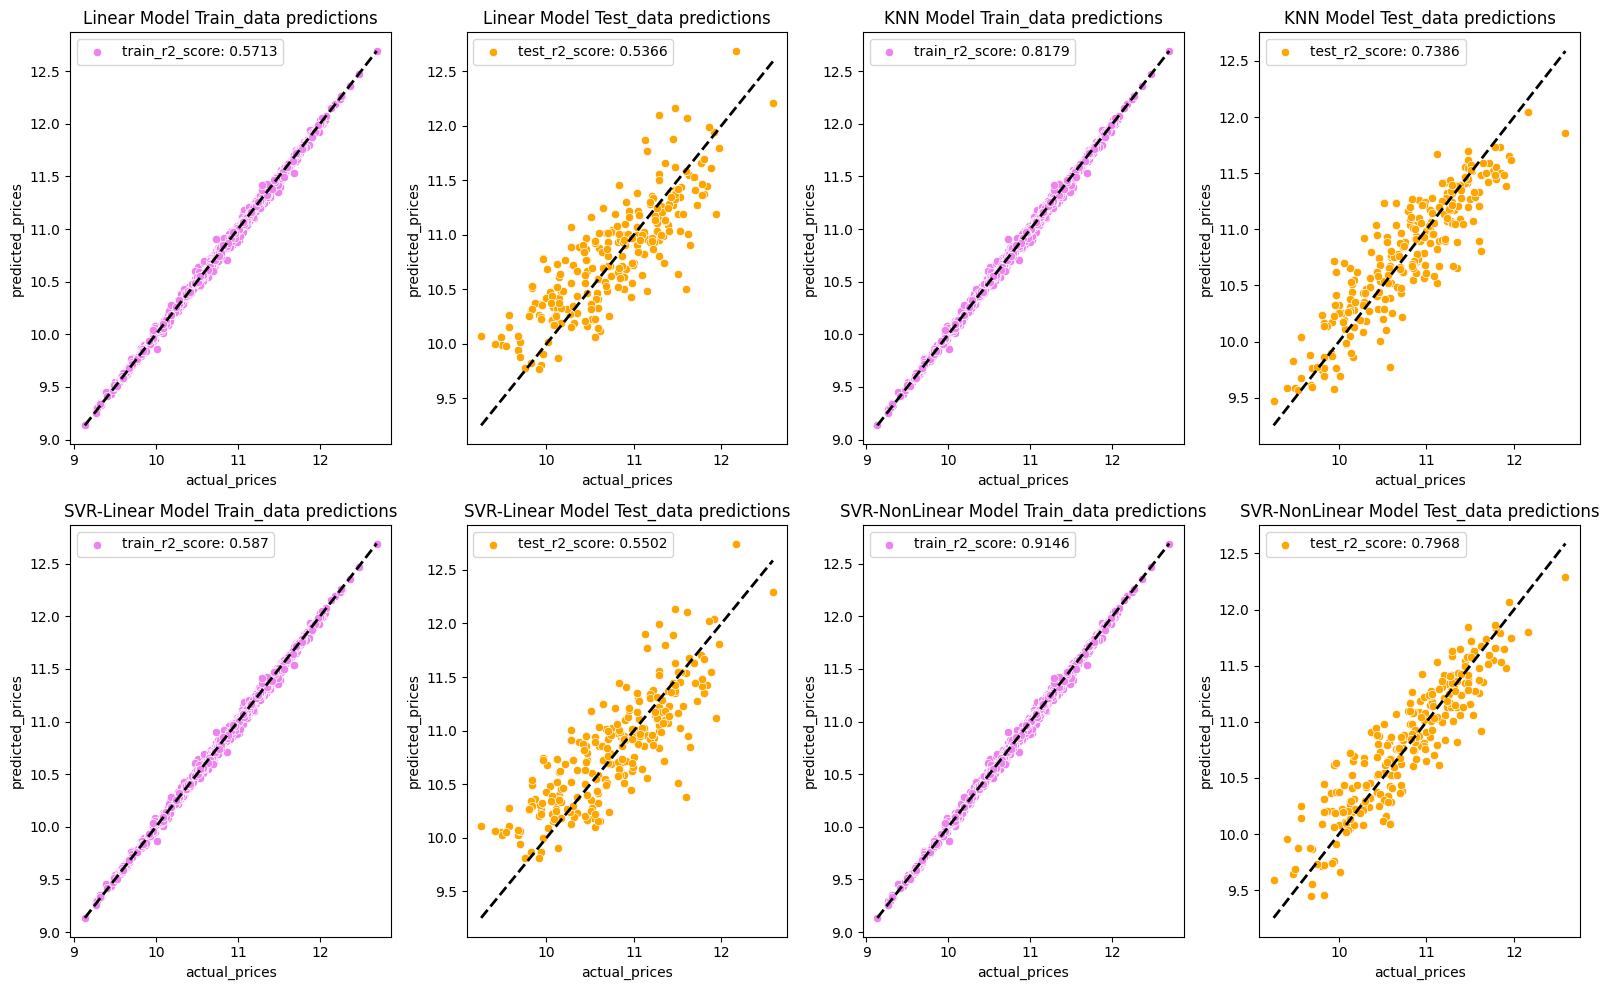

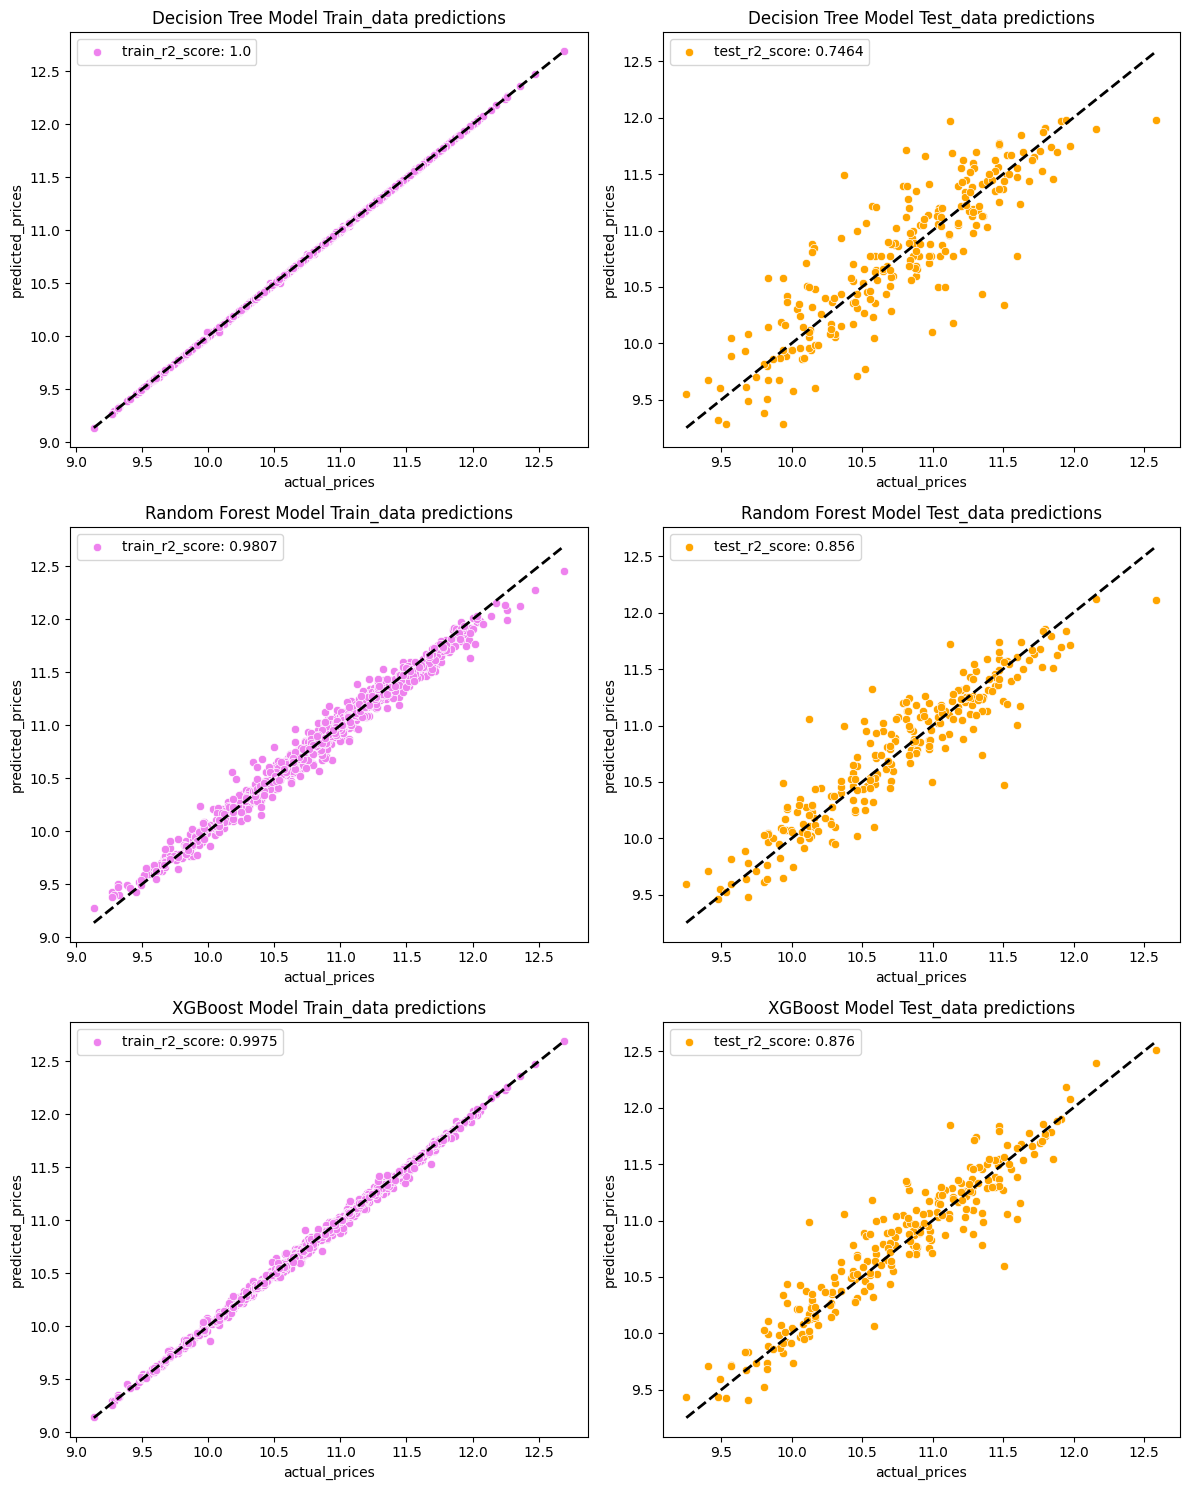

In [826]:
fig1 = plt.figure(figsize=(16,10))
plot_no =1 
for model,[y_inital_train_pred,y_initial_test_pred] in predictions.items():
    if model in ['Linear','SVR-Linear','SVR-NonLinear','KNN']:
        ax1 = fig1.add_subplot(2,4,plot_no)
        sns.scatterplot(x=y_initial_train,y=y_initial_train_pred,ax=ax1,color = 'violet',
                        label=f"train_r2_score: {results[f'{model}_train_results']['R2_SCORE']}")
        sns.lineplot(x=[y_initial_train.min(),y_initial_train.max()],y=[y_initial_train.min(),y_initial_train.max()],
                     color = 'black',ls='--',lw=2,ax = ax1,)
        ax1.set_xlabel('actual_prices')
        ax1.set_ylabel('predicted_prices')
        ax1.set_title(f'{model} Model Train_data predictions')
        ax2 = fig1.add_subplot(2,4,plot_no+1)
        sns.scatterplot(x=y_initial_test,y=y_initial_test_pred,ax=ax2,color = 'orange',
                        label=f"test_r2_score: {results[f'{model}_test_results']['R2_SCORE']}")
        sns.lineplot(x=[y_initial_test.min(),y_initial_test.max()],y=[y_initial_test.min(),y_initial_test.max()],
                     color = 'black',ls = '--',lw = 2,ax = ax2)
        ax2.set_xlabel('actual_prices')
        ax2.set_ylabel('predicted_prices')
        ax2.set_title(f'{model} Model Test_data predictions')
        plot_no+=2
plt.tight_layout()
plt.show()
fig2 = plt.figure(figsize=(12,15))
plot_no =1 
for model,[y_initial_train_pred,y_initial_test_pred] in predictions.items():
    if model in ['Decision Tree','Random Forest','XGBoost']:
        ax1 = fig2.add_subplot(3,2,plot_no)
        sns.scatterplot(x=y_initial_train,y=y_initial_train_pred,ax=ax1,color = 'violet',
                        label=f"train_r2_score: {results[f'{model}_train_results']['R2_SCORE']}")
        sns.lineplot(x=[y_initial_train.min(),y_initial_train.max()],y=[y_initial_train.min(),y_initial_train.max()],
                     color = 'black',ls='--',lw=2,ax = ax1,)
        ax1.set_xlabel('actual_prices')
        ax1.set_ylabel('predicted_prices')
        ax1.set_title(f'{model} Model Train_data predictions')
        ax2 = fig2.add_subplot(3,2,plot_no+1)
        sns.scatterplot(x=y_initial_test,y=y_initial_test_pred,ax=ax2,color = 'orange',
                        label=f"test_r2_score: {results[f'{model}_test_results']['R2_SCORE']}")
        sns.lineplot(x=[y_initial_test.min(),y_initial_test.max()],y=[y_initial_test.min(),y_initial_test.max()],
                     color = 'black',ls = '--',lw = 2,ax = ax2)
        ax2.set_xlabel('actual_prices')
        ax2.set_ylabel('predicted_prices')
        ax2.set_title(f'{model} Model Test_data predictions')
        plot_no+=2
plt.tight_layout()
plt.show()

* Randomforest and XGBoost are performing well so we will further use cv_score to check overall performance

In [827]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_scores = cross_validate(rfr, X_initial, y_initial, cv=5, scoring=['r2', 'neg_root_mean_squared_error'], return_train_score=True)
xgb = XGBRegressor(n_estimators = 100,random_state = 42)
xgb_scores = cross_validate(xgb, X_initial, y_initial, cv=5, scoring=['r2', 'neg_root_mean_squared_error'], return_train_score=True)
print('rfr_scores: ')
for i in rfr_scores:
    if ('r2' in i) or ('neg' in i):
        print(f'{i}: {rfr_scores[i]}, Mean :{rfr_scores[i].mean()}\n')
print('xgb_scores')            
for i in xgb_scores:
    if ('r2' in i) or ('neg' in i):
        print(f'{i}: {xgb_scores[i]}, Mean : {xgb_scores[i].mean()}\n')


rfr_scores: 
test_r2: [0.84325927 0.883911   0.87513295 0.81343882 0.86104654], Mean :0.8553577146987805

train_r2: [0.98277772 0.98174499 0.98207797 0.9833167  0.98368895], Mean :0.9827212673613845

test_neg_root_mean_squared_error: [-0.22839177 -0.21141226 -0.23646428 -0.24765921 -0.23807107], Mean :-0.2323997164307719

train_neg_root_mean_squared_error: [-0.08253472 -0.08400161 -0.08152905 -0.08128865 -0.07880558], Mean :-0.08163192194837433

xgb_scores
test_r2: [0.87363935 0.87990142 0.89341536 0.8349734  0.86845714], Mean : 0.8700773332704712

train_r2: [0.99691094 0.99721111 0.99717104 0.99739155 0.99698594], Mean : 0.9971341189105838

test_neg_root_mean_squared_error: [-0.20506684 -0.21503223 -0.21846855 -0.23292753 -0.23163575], Mean : -0.22062617911492613

train_neg_root_mean_squared_error: [-0.03495461 -0.03283311 -0.03239155 -0.03214251 -0.03387599], Mean : -0.033239555263427



* The best performing model is XGBoost. Now we perform feature selection and feature importance analysis

### 7. MODEL EVALUATION

In [828]:
xgb.fit(X_initial_train,y_initial_train)
y_initial_train_pred = xgb.predict(X_initial_train)
y_initial_test_pred = xgb.predict(X_initial_test)
xgb_train_score = metrics(y_initial_train_pred,y_initial_train)
xgb_test_score = metrics(y_initial_test_pred,y_initial_test)
print('Train Metrics:')
for k,v in xgb_train_score.items(): 
    print(f'{k} : {v}')

print('\nTest Metrics:')
for k,v in xgb_test_score.items():
    print(f'{k} : {v}')

Train Metrics:
MAE : 0.02
MSE : 0.0
RMSE : 0.03
R2_SCORE : 0.9975

Test Metrics:
MAE : 0.16
MSE : 0.05
RMSE : 0.22
R2_SCORE : 0.876


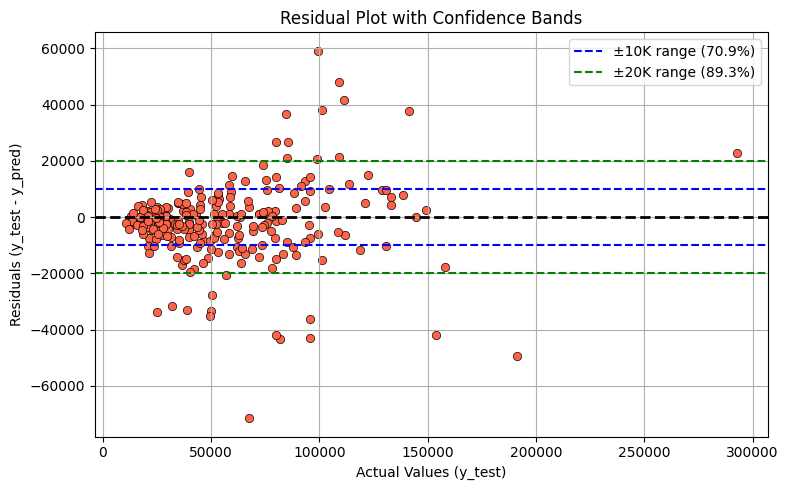

In [829]:
# Residuals
residuals = np.exp(y_initial_test) - np.exp(y_initial_test_pred)

# Compute percentages to plot 
total_points = len(residuals)
within_10k = np.sum((residuals >= -10000) & (residuals <= 10000)) / total_points * 100
within_20k = np.sum((residuals >= -20000) & (residuals <= 20000)) / total_points * 100

# other percentages to therotically understand the behaviour of low and high end laptops 


# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=np.exp(y_initial_test), y=residuals, color='tomato', edgecolor='black')
plt.axhline(0, linestyle='--', color='black', linewidth=2)
plt.axhline(-10000, linestyle='--', color='blue', linewidth=1.5, label=f'±10K range ({within_10k:.1f}%)')
plt.axhline(10000, linestyle='--', color='blue', linewidth=1.5)
plt.axhline(-20000, linestyle='--', color='green', linewidth=1.5, label=f'±20K range ({within_20k:.1f}%)')
plt.axhline(20000, linestyle='--', color='green', linewidth=1.5)

plt.title("Residual Plot with Confidence Bands")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals (y_test - y_pred)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#

Initial Model Assessment
* Residual analysis indicates that the model performs poorly on high-end laptops, with larger errors observed in this segment.

* This suggests the model struggles to generalize for premium-range laptops. The likely contributing factors are:

    * Underrepresentation of high-end laptops in the dataset, leading to model bias toward mid- and low-range devices.

    * Imbalanced data split, where high-end laptops were not evenly distributed across training and test sets.

* To address this, we will implement stratified sampling based on the target variable to ensure proportional representation of all price ranges during the train-test split.

## VII. COMPREHENSIVE FEATURE SELECTION AND IMPORTANCE ANALYSIS FOR MODEL OPTIMIZATION

### 1. DATA ENCODING

#### A) NOMINAL/ORDINAL ENCODING

In [830]:
#Ordinal Encoding for object datatype
cols1 = df.select_dtypes(include='object').columns
cols1 = [col for col in cols1 if col not in ['cpu','gpu','cpu_common','gpu_common']]
cols2 = df.select_dtypes(include = 'category').columns
cols = list(cols1) + list(cols2)
screen_order = ['Ultraportable','Thin & Light','Mainstream','Desktop Replacement'][::-1]
weight_order = ['Heavy','Medium','Lightweight','Ultra-Light']
order = [df[col].unique() for col in cols1]

# fs tag implies feature selection
order = order +[screen_order,weight_order]
ordinal_encoding_fs = OrdinalEncoder(categories = order)
oe_encoding_fs_array = ordinal_encoding_fs.fit_transform(df[cols])
ordinal_encoding_fs_df = pd.DataFrame(data = oe_encoding_fs_array,columns = cols)
ordinal_encoding_fs_df.head()

company  typename  opsys  screen_tech  screen_category  weight_category
0      0.0       0.0    0.0          0.0              2.0              3.0
1      0.0       0.0    0.0          1.0              2.0              3.0
2      1.0       1.0    1.0          2.0              1.0              2.0
3      0.0       0.0    0.0          0.0              1.0              2.0
4      0.0       0.0    0.0          0.0              2.0              3.0

In [831]:
df_fs_encoded = pd.concat([ordinal_encoding_fs_df,df[['cpu','gpu']],df.select_dtypes(include='number')],axis=1)
df_fs_encoded = df_fs_encoded.drop(columns = ['price'])
df_fs_encoded.head()

company  typename  opsys  screen_tech  screen_category  weight_category  \
0      0.0       0.0    0.0          0.0              2.0              3.0   
1      0.0       0.0    0.0          1.0              2.0              3.0   
2      1.0       1.0    1.0          2.0              1.0              2.0   
3      0.0       0.0    0.0          0.0              1.0              2.0   
4      0.0       0.0    0.0          0.0              2.0              3.0   

                          cpu                           gpu  inches   ram  \
0        Intel Core i5 2.3GHz  Intel Iris Plus Graphics 640    13.3   8.0   
1        Intel Core i5 1.8GHz        Intel HD Graphics 6000    13.3   8.0   
2  Intel Core i5 7200U 2.5GHz         Intel HD Graphics 620    15.6   8.0   
3        Intel Core i7 2.7GHz            AMD Radeon Pro 455    15.4  16.0   
4        Intel Core i5 3.1GHz  Intel Iris Plus Graphics 650    13.3   8.0   

   weight  ssd  hdd  flashstorage  hybrid  dual_memory  is_touchscreen  \
0    1.37  128    0             0       0            0               0   
1    1.34    0    0           128       0            0               0   
2    1.86  256    0             0       0            0               0   
3    1.83  512    0             0       0            0               0   
4    1.37  256    0             0       0            0               0   

      ppi  clock_speed  price_log  
0  226.98          2.3  11.175755  
1  127.68          1.8  10.776777  
2  141.21          2.5  10.329931  
3  220.53          2.7  11.814476  
4  226.98          3.1  11.473101

#### B) LEAKAGE-FREE TARGET MEAN ENCODING FOR `cpu` AND `gpu` FEATURES + SPLITING FEATURES (`x`) AND TARGET (`y`)

In [832]:
def kfold_cpu_gpu_encoding(kf,df_encoded):
    # Store mappings for final global use
    cpu_mean_mappings = []
    gpu_mean_mappings = []
    global_means_cpu = []
    global_means_gpu = []
    X_encoded = df_encoded.drop(columns = ['price_log'])
    y_series = df_encoded['price_log']
    # Fold-wise encoding for leakage-free target mean
    for train_idx, val_idx in kf.split(X_encoded):
        train_fold = X_encoded.iloc[train_idx].copy()
        val_fold = X_encoded.iloc[val_idx].copy()
        y_train_fold = y_series.iloc[train_idx]

        # CPU encoding
        cpu_mean_map = y_train_fold.groupby(train_fold['cpu']).mean().to_dict()
        global_mean_cpu = y_train_fold.mean()

        val_fold['cpu_mean'] = val_fold['cpu'].map(cpu_mean_map).fillna(global_mean_cpu)

        cpu_mean_mappings.append(cpu_mean_map)
        global_means_cpu.append(global_mean_cpu)

        # GPU encoding
        gpu_mean_map = y_train_fold.groupby(train_fold['gpu']).mean().to_dict()
        global_mean_gpu = y_train_fold.mean()

        val_fold['gpu_mean'] = val_fold['gpu'].map(gpu_mean_map).fillna(global_mean_gpu)

        gpu_mean_mappings.append(gpu_mean_map)
        global_means_gpu.append(global_mean_gpu)

        # Store in full encoded set
        X_encoded.loc[val_idx, 'cpu_mean'] = val_fold['cpu_mean']
        X_encoded.loc[val_idx, 'gpu_mean'] = val_fold['gpu_mean']

    # Final global encoding (averaged across folds) — for future use
    
            
    cpu_mean_final_map = {
        key: np.mean([fold_map.get(key, np.nan) for fold_map in cpu_mean_mappings if key in fold_map])
        for key in set(X_encoded['cpu'])
    }
    gpu_mean_final_map = {
        key: np.mean([fold_map.get(key, np.nan) for fold_map in gpu_mean_mappings if key in fold_map])
        for key in set(X_encoded['gpu'])
    }

    final_global_mean_cpu = np.mean(global_means_cpu)
    final_global_mean_gpu = np.mean(global_means_gpu)

    return {'cpu_mean_final_map':cpu_mean_final_map,'gpu_mean_final_map':gpu_mean_final_map,
            'final_global_mean_cpu':final_global_mean_cpu,
            'final_global_mean_gpu':final_global_mean_gpu,
            'X_encoded':X_encoded,'y_series':y_series}

In [833]:

kf = KFold(n_splits=5,shuffle=True,random_state=42)
map_dictionary = kfold_cpu_gpu_encoding(kf = kf, df_encoded = df_fs_encoded)
X_fs = map_dictionary['X_encoded']
y_fs = map_dictionary['y_series'] 

# other mapping for future encoding of cpu_mean and gpu_mean mappings 
# Not used anywhere in the code
cpu_mean_final_map = map_dictionary['cpu_mean_final_map']
gpu_mean_final_map = map_dictionary['gpu_mean_final_map']
final_global_mean_cpu = map_dictionary['final_global_mean_cpu']
final_global_mean_gpu= map_dictionary['final_global_mean_gpu']
pd.concat([X_fs,y_fs],axis=1).head()

company  typename  opsys  screen_tech  screen_category  weight_category  \
0      0.0       0.0    0.0          0.0              2.0              3.0   
1      0.0       0.0    0.0          1.0              2.0              3.0   
2      1.0       1.0    1.0          2.0              1.0              2.0   
3      0.0       0.0    0.0          0.0              1.0              2.0   
4      0.0       0.0    0.0          0.0              2.0              3.0   

                          cpu                           gpu  inches   ram  \
0        Intel Core i5 2.3GHz  Intel Iris Plus Graphics 640    13.3   8.0   
1        Intel Core i5 1.8GHz        Intel HD Graphics 6000    13.3   8.0   
2  Intel Core i5 7200U 2.5GHz         Intel HD Graphics 620    15.6   8.0   
3        Intel Core i7 2.7GHz            AMD Radeon Pro 455    15.4  16.0   
4        Intel Core i5 3.1GHz  Intel Iris Plus Graphics 650    13.3   8.0   

   ...  hdd  flashstorage  hybrid  dual_memory  is_touchscreen     ppi  \
0  ...    0             0       0            0               0  226.98   
1  ...    0           128       0            0               0  127.68   
2  ...    0             0       0            0               0  141.21   
3  ...    0             0       0            0               0  220.53   
4  ...    0             0       0            0               0  226.98   

   clock_speed   cpu_mean   gpu_mean  price_log  
0          2.3  11.301072  11.396478  11.175755  
1          1.8  11.030615  10.932775  10.776777  
2          2.5  10.718522  10.900033  10.329931  
3          2.7  10.831023  10.831023  11.814476  
4          3.1  11.596266  11.596266  11.473101  

[5 rows x 22 columns]

In [834]:
try:
    X_fs = X_fs.drop(columns = ['cpu','gpu'])
except:
    pass
X_fs.head()


company  typename  opsys  screen_tech  screen_category  weight_category  \
0      0.0       0.0    0.0          0.0              2.0              3.0   
1      0.0       0.0    0.0          1.0              2.0              3.0   
2      1.0       1.0    1.0          2.0              1.0              2.0   
3      0.0       0.0    0.0          0.0              1.0              2.0   
4      0.0       0.0    0.0          0.0              2.0              3.0   

   inches   ram  weight  ssd  hdd  flashstorage  hybrid  dual_memory  \
0    13.3   8.0    1.37  128    0             0       0            0   
1    13.3   8.0    1.34    0    0           128       0            0   
2    15.6   8.0    1.86  256    0             0       0            0   
3    15.4  16.0    1.83  512    0             0       0            0   
4    13.3   8.0    1.37  256    0             0       0            0   

   is_touchscreen     ppi  clock_speed   cpu_mean   gpu_mean  
0               0  226.98          2.3  11.301072  11.396478  
1               0  127.68          1.8  11.030615  10.932775  
2               0  141.21          2.5  10.718522  10.900033  
3               0  220.53          2.7  10.831023  10.831023  
4               0  226.98          3.1  11.596266  11.596266

In [835]:
X_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1219 non-null   float64
 1   typename         1219 non-null   float64
 2   opsys            1219 non-null   float64
 3   screen_tech      1219 non-null   float64
 4   screen_category  1219 non-null   float64
 5   weight_category  1219 non-null   float64
 6   inches           1219 non-null   float64
 7   ram              1219 non-null   float64
 8   weight           1219 non-null   float64
 9   ssd              1219 non-null   int64  
 10  hdd              1219 non-null   int64  
 11  flashstorage     1219 non-null   int64  
 12  hybrid           1219 non-null   int64  
 13  dual_memory      1219 non-null   int64  
 14  is_touchscreen   1219 non-null   int64  
 15  ppi              1219 non-null   float64
 16  clock_speed      1219 non-null   float64
 17  cpu_mean      

In [836]:
y_fs.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: price_log, dtype: float64

### 1. WRAPPER METHOD TO FIND THE BEST FEATURES WITHIN THE LIMITED SELECTION

In [837]:
# Model setup
model_fs = XGBRegressor(n_estimators=100, random_state=42, max_depth=4)

model_fs_scores = []
for i in range(1, len(X_fs.columns) + 1):  # Range of feature selection
    print(i,end=' ')
    X_encoded = X_fs.copy()
    y_series = y_fs.copy()
    # Applying RFE
    rfe = RFE(estimator=model_fs, n_features_to_select=i)
    X_selected = rfe.fit_transform(X_encoded, y_series)
    selected_features = X_encoded.columns[rfe.support_]

    # Cross-validation score on selected columns
    scores = cross_validate(model_fs, X_selected, y_series, cv=kf, scoring='r2', return_train_score=True)
    train_score, test_score = np.round([scores['train_score'], scores['test_score']], 3)
    train_score_mean, test_score_mean = np.round([train_score.mean(), test_score.mean()], 2)

    # Save result
    model_fs_scores.append([i, selected_features, train_score, test_score, train_score_mean, test_score_mean])
    



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [838]:
fs_scores_df = pd.DataFrame(model_fs_scores,columns = ['no_of_features','features','train_score','test_score','train_mean_score','test_mean_score',])
fs_scores_df

no_of_features                                           features  \
0                1                     Index(['ram'], dtype='object')   
1                2              Index(['ram', 'ssd'], dtype='object')   
2                3  Index(['ram', 'ssd', 'gpu_mean'], dtype='object')   
3                4  Index(['ram', 'ssd', 'cpu_mean', 'gpu_mean'], ...   
4                5  Index(['ram', 'ssd', 'ppi', 'cpu_mean', 'gpu_m...   
5                6  Index(['screen_category', 'ram', 'ssd', 'ppi',...   
6                7  Index(['opsys', 'screen_category', 'ram', 'ssd...   
7                8  Index(['opsys', 'screen_category', 'ram', 'wei...   
8                9  Index(['opsys', 'screen_category', 'inches', '...   
9               10  Index(['opsys', 'screen_category', 'inches', '...   
10              11  Index(['opsys', 'screen_category', 'inches', '...   
11              12  Index(['typename', 'opsys', 'screen_category',...   
12              13  Index(['company', 'typename', 'opsys', 'screen...   
13              14  Index(['company', 'typename', 'opsys', 'screen...   
14              15  Index(['company', 'typename', 'opsys', 'screen...   
15              16  Index(['company', 'typename', 'opsys', 'screen...   
16              17  Index(['company', 'typename', 'opsys', 'screen...   
17              18  Index(['company', 'typename', 'opsys', 'screen...   
18              19  Index(['company', 'typename', 'opsys', 'screen...   

                            train_score                           test_score  \
0   [0.599, 0.622, 0.612, 0.617, 0.617]  [0.656, 0.542, 0.603, 0.591, 0.587]   
1   [0.696, 0.703, 0.702, 0.704, 0.705]  [0.706, 0.666, 0.673, 0.671, 0.678]   
2    [0.871, 0.871, 0.87, 0.872, 0.871]  [0.733, 0.786, 0.748, 0.737, 0.784]   
3   [0.912, 0.917, 0.919, 0.918, 0.919]   [0.821, 0.825, 0.714, 0.79, 0.804]   
4     [0.95, 0.954, 0.953, 0.951, 0.95]   [0.851, 0.866, 0.81, 0.841, 0.848]   
5   [0.952, 0.953, 0.956, 0.951, 0.951]  [0.867, 0.874, 0.828, 0.852, 0.853]   
6   [0.958, 0.959, 0.963, 0.958, 0.958]  [0.878, 0.888, 0.835, 0.873, 0.875]   
7   [0.976, 0.976, 0.975, 0.975, 0.974]  [0.886, 0.884, 0.855, 0.878, 0.892]   
8   [0.977, 0.976, 0.978, 0.975, 0.974]   [0.895, 0.882, 0.857, 0.88, 0.903]   
9   [0.978, 0.976, 0.977, 0.974, 0.974]  [0.884, 0.886, 0.858, 0.888, 0.897]   
10  [0.979, 0.975, 0.977, 0.976, 0.974]  [0.889, 0.886, 0.872, 0.894, 0.908]   
11   [0.979, 0.98, 0.978, 0.974, 0.975]   [0.89, 0.885, 0.868, 0.898, 0.908]   
12    [0.981, 0.981, 0.98, 0.981, 0.98]    [0.905, 0.896, 0.878, 0.9, 0.916]   
13  [0.982, 0.981, 0.981, 0.979, 0.979]  [0.898, 0.895, 0.877, 0.896, 0.909]   
14  [0.981, 0.982, 0.982, 0.979, 0.979]     [0.904, 0.9, 0.89, 0.898, 0.916]   
15   [0.981, 0.981, 0.982, 0.98, 0.982]  [0.901, 0.895, 0.881, 0.899, 0.911]   
16   [0.981, 0.982, 0.984, 0.981, 0.98]  [0.906, 0.896, 0.886, 0.894, 0.918]   
17   [0.981, 0.982, 0.984, 0.981, 0.98]  [0.906, 0.896, 0.886, 0.894, 0.918]   
18    [0.983, 0.982, 0.983, 0.98, 0.98]  [0.902, 0.896, 0.889, 0.891, 0.919]   

    train_mean_score  test_mean_score  
0               0.61             0.60  
1               0.70             0.68  
2               0.87             0.76  
3               0.92             0.79  
4               0.95             0.84  
5               0.95             0.85  
6               0.96             0.87  
7               0.98             0.88  
8               0.98             0.88  
9               0.98             0.88  
10              0.98             0.89  
11              0.98             0.89  
12              0.98             0.90  
13              0.98             0.89  
14              0.98             0.90  
15              0.98             0.90  
16              0.98             0.90  
17              0.98             0.90  
18              0.98             0.90

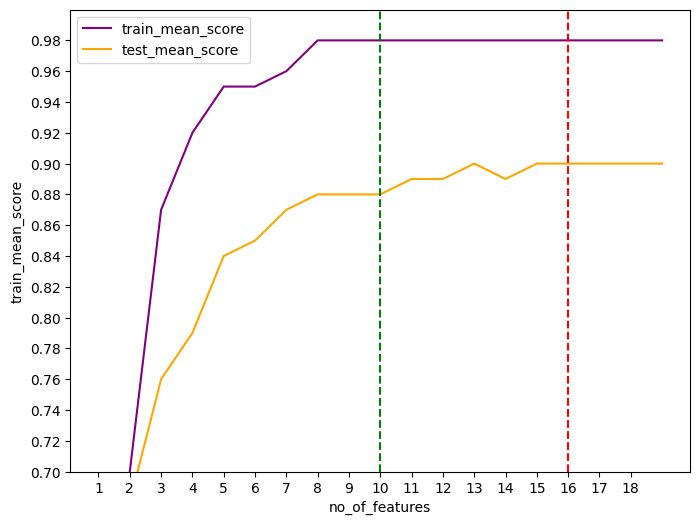

In [839]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(data = fs_scores_df,x = 'no_of_features',y='train_mean_score',color = 'purple',label = 'train_mean_score')
sns.lineplot(data = fs_scores_df,x = 'no_of_features',y='test_mean_score',color = 'orange',label = 'test_mean_score')
plt.plot([10,10],[0.7,1],ls='--',color= 'green')
plt.plot([16,16],[0.7,1],ls='--',color = 'red')
plt.xticks(list(range(1,19)))
plt.ylim(0.7,1)
ax.set_yticks([x/100 for x in list(range(70,100,2))])
plt.show()

* We can see there is no major changes after 10 features(i.e. test accuracy is 0.86~0.88) so keeping performance and complexity in mind we will select atmost 16 features


In [840]:
# Extracting 11 features
for i in range(0,15):
    print(fs_scores_df.iloc[i]['features'].to_list())

['ram']
['ram', 'ssd']
['ram', 'ssd', 'gpu_mean']
['ram', 'ssd', 'cpu_mean', 'gpu_mean']
['ram', 'ssd', 'ppi', 'cpu_mean', 'gpu_mean']
['screen_category', 'ram', 'ssd', 'ppi', 'cpu_mean', 'gpu_mean']
['opsys', 'screen_category', 'ram', 'ssd', 'ppi', 'cpu_mean', 'gpu_mean']
['opsys', 'screen_category', 'ram', 'weight', 'ssd', 'ppi', 'cpu_mean', 'gpu_mean']
['opsys', 'screen_category', 'inches', 'ram', 'weight', 'ssd', 'ppi', 'cpu_mean', 'gpu_mean']
['opsys', 'screen_category', 'inches', 'ram', 'weight', 'ssd', 'dual_memory', 'ppi', 'cpu_mean', 'gpu_mean']
['opsys', 'screen_category', 'inches', 'ram', 'weight', 'ssd', 'dual_memory', 'ppi', 'clock_speed', 'cpu_mean', 'gpu_mean']
['typename', 'opsys', 'screen_category', 'inches', 'ram', 'weight', 'ssd', 'dual_memory', 'ppi', 'clock_speed', 'cpu_mean', 'gpu_mean']
['company', 'typename', 'opsys', 'screen_category', 'inches', 'ram', 'weight', 'ssd', 'dual_memory', 'ppi', 'clock_speed', 'cpu_mean', 'gpu_mean']
['company', 'typename', 'opsys',

In [841]:
rfe_selected_features = fs_scores_df.iloc[14]['features'].to_list()
print(rfe_selected_features)

['company', 'typename', 'opsys', 'screen_category', 'inches', 'ram', 'weight', 'ssd', 'flashstorage', 'dual_memory', 'is_touchscreen', 'ppi', 'clock_speed', 'cpu_mean', 'gpu_mean']


### 2. FEATURE IMPORTANCE ANALYSIS

#### A) SINGLE FEATURE PREDICTION SCORE

In [842]:
def single_feature_score(column,X_var,y_var):
    X_one = X_var[[column]]
    model = XGBRegressor(n_estimators = 100,random_state =42,max_depth = 4)
    model.fit(X_one,y_var)
    scores = cross_validate(model, X_one, y_var, cv=kf, scoring='r2', return_train_score=True)
    train_score, test_score = np.round([scores['train_score'], scores['test_score']], 3)
    train_score_mean, test_score_mean = np.round([train_score.mean(), test_score.mean()], 2)
    return [column,train_score_mean,test_score_mean]

In [843]:
single_feature_results =[]
for i in X_fs.columns:
    result = single_feature_score(i,X_fs,y_fs)
    single_feature_results.append(result)

In [844]:
individual_feature_performance_df = pd.DataFrame(single_feature_results,columns = ['feature_name','train_mean_score','test_mean_score'])
individual_feature_performance_df = individual_feature_performance_df.sort_values(by=['test_mean_score','train_mean_score'],ascending=False)
individual_feature_performance_df

feature_name  train_mean_score  test_mean_score
17         cpu_mean              0.70             0.60
7               ram              0.61             0.60
16      clock_speed              0.53             0.50
18         gpu_mean              0.62             0.49
9               ssd              0.50             0.48
15              ppi              0.53             0.47
1          typename              0.41             0.40
8            weight              0.51             0.33
6            inches              0.22             0.20
3       screen_tech              0.20             0.19
0           company              0.19             0.17
5   weight_category              0.17             0.16
4   screen_category              0.16             0.16
2             opsys              0.15             0.13
11     flashstorage              0.13             0.12
13      dual_memory              0.11             0.10
10              hdd              0.08             0.06
14   is_touchscreen              0.04             0.03
12           hybrid              0.00            -0.01

* AS XGBOOST is a tree based model the effeciency will not be captured for features with less categories for example dual_memory and is_touchscreen as they have only 2 categories.
* so this method might not be the best but gives a general idea how the continuous columns perform wrt price variable

#### B) INDIVIDUAL FEATURE IMPORTANCE ON XGBOOST MODEL

In [845]:
# We will use all 18 features and select 15 features 
# all 18 features will be from above X_encoded and 
model_fs = XGBRegressor(n_estimators = 100,random_state = 42,max_depth = 4)
model_fi_score = cross_val_score(model_fs,X_fs,y_fs,cv=5)
print(model_fi_score)
print(model_fi_score.mean())

[0.87571634 0.90912006 0.90399137 0.84637084 0.87217152]
0.8814740271220891


In [846]:
#XGB feature_importance selection
model_fs.fit(X_fs,y_fs)
model_feature_importance_score = pd.Series(model_fs.feature_importances_, index=X_fs.columns).sort_values(ascending=False)
print(model_feature_importance_score)

ram                0.487855
ssd                0.109235
cpu_mean           0.083928
screen_category    0.073107
ppi                0.072256
gpu_mean           0.053286
opsys              0.019897
typename           0.019321
weight             0.015931
inches             0.012435
clock_speed        0.010617
flashstorage       0.008780
is_touchscreen     0.008592
dual_memory        0.008319
company            0.005550
hdd                0.004862
screen_tech        0.003155
weight_category    0.002405
hybrid             0.000468
dtype: float32


* `ram` column has high feature_importance for XGBRegressor Model.Followed by `ssd,cpu_mean,ppi` etc.
* This implies memory storage and processors(cpu,gpu) are key factors influencing the target variable (price).

In [847]:
fi_selected_features = model_feature_importance_score.index[:15].to_list()
print(fi_selected_features)

['ram', 'ssd', 'cpu_mean', 'screen_category', 'ppi', 'gpu_mean', 'opsys', 'typename', 'weight', 'inches', 'clock_speed', 'flashstorage', 'is_touchscreen', 'dual_memory', 'company']


#### C) PERMUTATION IMPORTANCE OF FEATURE

In [848]:
print('Model_name:',type(model))
perm_importance = permutation_importance(model_fs, X_fs, y_fs, scoring='r2', random_state=42)
perm_importance_df = pd.DataFrame({'Feature': X_fs.columns, 'R2_decrease': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='R2_decrease', ascending=False)
print(perm_importance_df)

Model_name: <class 'str'>
            Feature  R2_decrease
17         cpu_mean     0.141932
18         gpu_mean     0.140577
7               ram     0.127684
9               ssd     0.081187
15              ppi     0.064811
8            weight     0.062409
2             opsys     0.027480
16      clock_speed     0.023077
0           company     0.022367
6            inches     0.014765
4   screen_category     0.013702
1          typename     0.009862
10              hdd     0.005984
14   is_touchscreen     0.004570
11     flashstorage     0.004496
3       screen_tech     0.004096
13      dual_memory     0.003106
5   weight_category     0.000969
12           hybrid     0.000077


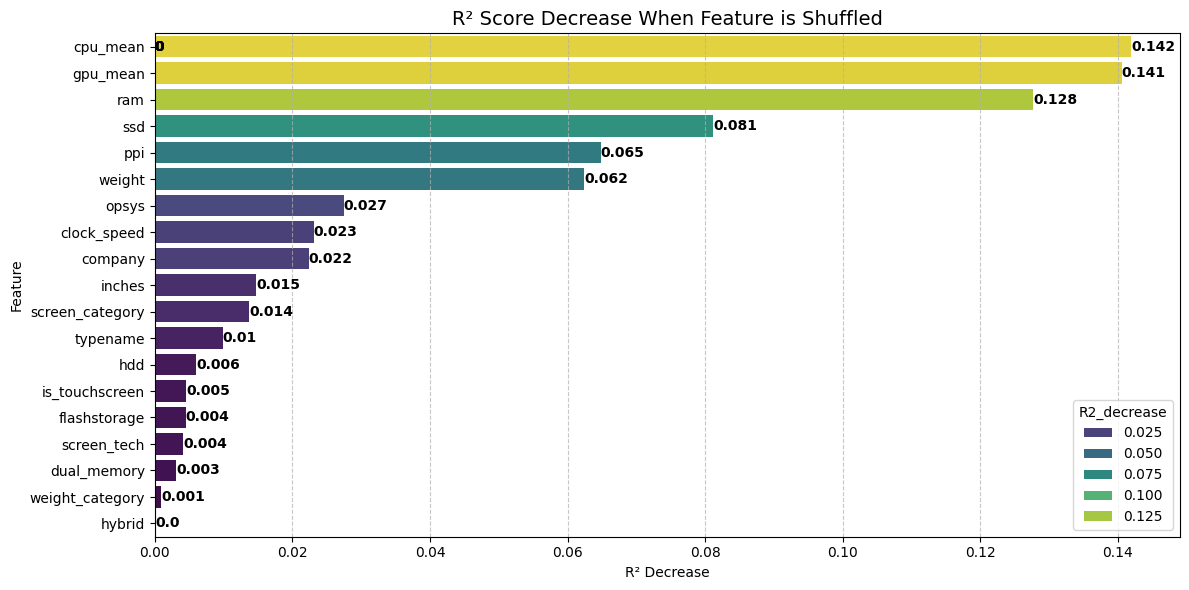

In [849]:
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='R2_decrease', y='Feature', data=perm_importance_df,hue='R2_decrease', palette='viridis')
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),3)}',
                (p.get_width(),p.get_y()+p.get_height()/2),
                ha = 'left',va='center',fontsize=10,fontweight = 'bold',color='black')
plt.title('R² Score Decrease When Feature is Shuffled', fontsize=14)
plt.xlabel('R² Decrease')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Conclusions drawn from permutation importance**

1) The top features by importance (based on $R^{2}$ drop when shuffled):
    * `gpu_mean` (0.154)
    * `ram` (0.15)
    * `cpu_mean` (0.13)
    * `ssd` (0.08)
These four are key drivers of model performance, indicating that hardware components strongly influence the price variable (target variable).

2) Features with minimal $R^{2}$ impact (<0.01) suggests:
* The contribute little predictive power or Their effect is captured by other correlated features (i.e. redundancy)
* ex: weight_category,dual_memory, hybrid etc
3) `screen_category` has lower importance (0.012) than its source `inches` (0.019) which may indicate that discretization added less value than the raw continous variables 
4) similarly `weight_category` has near-zero importance so we can drop both screen_category and weight_category
5) The fact that no single feature completely tanks performance when shuffled(i.e drop in $R^{2}$ not greater than 0.2) suggest:
    * Model is robust with information spread across multiple features.
    * Model is less prove to overfitting on a single dominant feature


In [850]:
pi_selected_features = perm_importance_df['Feature'][:15].to_list()
print(pi_selected_features)

['cpu_mean', 'gpu_mean', 'ram', 'ssd', 'ppi', 'weight', 'opsys', 'clock_speed', 'company', 'inches', 'screen_category', 'typename', 'hdd', 'is_touchscreen', 'flashstorage']


#### D) SHAPELY ADDITIVE EXPLANATIONS (SHAP ) ANALYSIS

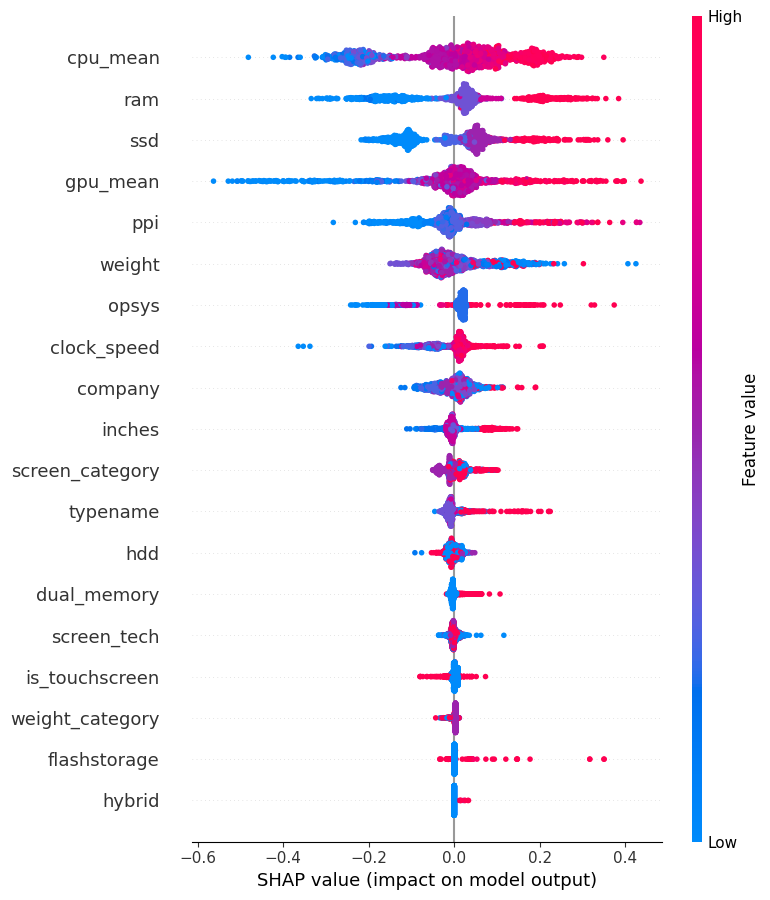

In [851]:

explainer = shap.Explainer(model_fs, X_fs)
shap_values = explainer(X_fs)

# Plot summary of feature importance
shap.summary_plot(shap_values, X_fs)

* `ram,cpu_mean,ssd,gpu_mean` are top performing features from shap analysis


In [852]:
# Compute mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values.values).mean(axis=0)
# Create a DataFrame for better visualization
shap_importance_df = pd.DataFrame({'feature': X_fs.columns, 'importance': shap_importance})
# Sort features by importance (descending order)
shap_importance_df = shap_importance_df.sort_values(by='importance', ascending=False)
# Get the list of features in order of SHAP importance
shap_selected_features = shap_importance_df['feature'][:15].tolist()
print(shap_selected_features)

['cpu_mean', 'ram', 'ssd', 'gpu_mean', 'ppi', 'weight', 'opsys', 'clock_speed', 'company', 'inches', 'screen_category', 'typename', 'hdd', 'dual_memory', 'screen_tech']


### 3. TOP FEATURES SELECTION FROM ABOVE ANALYSIS

In [853]:
top_features = set(rfe_selected_features).intersection(fi_selected_features,pi_selected_features,shap_selected_features)
print([col for col in shap_selected_features if col in top_features]+[col for col in top_features if col not in shap_selected_features])

['cpu_mean', 'ram', 'ssd', 'gpu_mean', 'ppi', 'weight', 'opsys', 'clock_speed', 'company', 'inches', 'screen_category', 'typename']


* As `ssd` is involved we also need to include other storage types like `hdd,hybrid,flashstorage & dual memory`.
* as screen_category and inches are same columns we should eliminate one 
* from permutation importance and shap analysis it is clear that inches column has high effect on accuracy and screen_category is derived from inches so we are dropping `screen_category` column

In [854]:
top_features = ['company','typename','opsys','cpu_mean','gpu_mean'
                'ram', 'ssd','hdd','flashstorage','hybrid','dual_memory',
                'inches','ppi','is_touchscreen','weight','clock_speed']

## IX. MODEL IMPLEMENTATION & HYPERPARAMETER TUNING

In [855]:
df.columns

Index(['company', 'typename', 'inches', 'cpu', 'ram', 'gpu', 'opsys', 'weight',
       'price', 'ssd', 'hdd', 'flashstorage', 'hybrid', 'dual_memory',
       'screen_tech', 'is_touchscreen', 'ppi', 'clock_speed', 'price_log',
       'screen_category', 'weight_category', 'cpu_common', 'gpu_common'],
      dtype='object')

In [856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   company          1219 non-null   object  
 1   typename         1219 non-null   object  
 2   inches           1219 non-null   float64 
 3   cpu              1219 non-null   object  
 4   ram              1219 non-null   float64 
 5   gpu              1219 non-null   object  
 6   opsys            1219 non-null   object  
 7   weight           1219 non-null   float64 
 8   price            1219 non-null   float64 
 9   ssd              1219 non-null   int64   
 10  hdd              1219 non-null   int64   
 11  flashstorage     1219 non-null   int64   
 12  hybrid           1219 non-null   int64   
 13  dual_memory      1219 non-null   int64   
 14  screen_tech      1219 non-null   object  
 15  is_touchscreen   1219 non-null   int64   
 16  ppi              1219 non-null   float64 


In [857]:
ordinal_encoding_main = OrdinalEncoder()
ordinal_encoding_main_array = ordinal_encoding_main.fit_transform(df[['company','typename','opsys','cpu_common','gpu_common']])
ordinal_encoding_main_df = pd.DataFrame(ordinal_encoding_main_array,columns = ['company','typename','opsys','cpu_common','gpu_common'])
ordinal_encoding_main_df = ordinal_encoding_main_df.astype('category')
ordinal_encoding_main_df.head()

company typename opsys cpu_common gpu_common
0     1.0      4.0   8.0       22.0       24.0
1     1.0      4.0   8.0       22.0       24.0
2     7.0      3.0   4.0        8.0       12.0
3     1.0      4.0   8.0       22.0       24.0
4     1.0      4.0   8.0       22.0       24.0

In [858]:
final_numerical_columns = ['ram','ssd','hdd','flashstorage','hybrid','dual_memory',
                           'inches','ppi','is_touchscreen','weight','clock_speed','price_log','price']
df_main_encoded = pd.concat([ordinal_encoding_main_df,df[final_numerical_columns]],axis = 1)
df_main_encoded.head()

company typename opsys cpu_common gpu_common   ram  ssd  hdd  flashstorage  \
0     1.0      4.0   8.0       22.0       24.0   8.0  128    0             0   
1     1.0      4.0   8.0       22.0       24.0   8.0    0    0           128   
2     7.0      3.0   4.0        8.0       12.0   8.0  256    0             0   
3     1.0      4.0   8.0       22.0       24.0  16.0  512    0             0   
4     1.0      4.0   8.0       22.0       24.0   8.0  256    0             0   

   hybrid  dual_memory  inches     ppi  is_touchscreen  weight  clock_speed  \
0       0            0    13.3  226.98               0    1.37          2.3   
1       0            0    13.3  127.68               0    1.34          1.8   
2       0            0    15.6  141.21               0    1.86          2.5   
3       0            0    15.4  220.53               0    1.83          2.7   
4       0            0    13.3  226.98               0    1.37          3.1   

   price_log        price  
0  11.175755   71378.6832  
1  10.776777   47895.5232  
2  10.329931   30636.0000  
3  11.814476  135195.3360  
4  11.473101   96095.8080

In [859]:
# Selecting only top featured 
X = df_main_encoded.drop(columns = ['price_log','price'])

# clear distinction of price_log and price column is necessary
# because converting log to exp just before calculations will become tedious
y_log = df_main_encoded['price_log']
y_exp = df_main_encoded['price']

### 1. HYPERPARAMETER TUNING

** performing multiple times gives different results so we are going to fix the hyperparameters as the first result

In [860]:
run_flag = False #running the hyperparameter tuning only once saving it from running again and again 
run_flag = True   #--uncomment this line to run the cell block


######### For consistent results the cv should be same
if run_flag:
    cv_splitter = KFold(n_splits=5, shuffle=True, random_state=42)

    def run_grid_search(X, y, param_grid, base_params=None, cv=cv_splitter, verbose=1, scoring='neg_root_mean_squared_error'):
        base_params = base_params or {}
        model = XGBRegressor(enable_categorical='True',random_state=42, **base_params)
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            verbose=verbose,
            n_jobs=-1
        )
        grid.fit(X, y)
        print("Best Params:", grid.best_params_)
        return grid.best_params_

    ######## Stage 1
    param_grid_stage1 = {
        'max_depth': [ 4, 5, 6, 7, 8],
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01,0.03, 0.05, 0.07, 0.09]
    }
    best_params_stage1 = run_grid_search(X, y_log, param_grid_stage1)
    # best_params_stage1 = {'n_estimators':200,'learning_rate':0.07}
    ######## Stage 2
    param_grid_stage2 = {

        'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0],
        'subsample': [0.2, 0.4, 0.6, 0.8, 1.0]
    }
    best_params_stage2 = run_grid_search(X, y_log, param_grid_stage2, base_params=best_params_stage1)

    ######## Stage 3
    param_grid_stage3 = {
        'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 1.5, 2, 2.5, 3]
    }
    best_params_stage3 = run_grid_search(X, y_log, param_grid_stage3, base_params={**best_params_stage1, **best_params_stage2})

    ####### Combine all best parameters
    final_best_params = {**best_params_stage1, **best_params_stage2, **best_params_stage3}
    print("\n✅ Final Best Hyperparameters for XGBRegressor:")
    for k, v in final_best_params.items():
        print(f"{k}: {v}")
    

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 400}
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Params: {'colsample_bytree': 0.4, 'subsample': 0.8}
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Params: {'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 1.5}

✅ Final Best Hyperparameters for XGBRegressor:
learning_rate: 0.05
max_depth: 4
n_estimators: 400
colsample_bytree: 0.4
subsample: 0.8
gamma: 0
reg_alpha: 0.1
reg_lambda: 1.5


Final Best Hyperparameters for XGBRegressor:
learning_rate: 0.07
max_depth: 4
n_estimators: 400
colsample_bytree: 0.4
subsample: 1.0
gamma: 0
reg_alpha: 0.1
reg_lambda: 2

Final Best Hyperparameters for XGBRegressor:
learning_rate: 0.05
max_depth: 5
n_estimators: 400
colsample_bytree: 0.4
subsample: 0.8
gamma: 0
reg_alpha: 0
reg_lambda: 2

In [861]:
best_parameters = {
    'learning_rate': 0.0,
    'n_estimators': 200,
    'colsample_bytree': 0.4,
    'max_depth': 6,
    'subsample': 0.8,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1}

# 2. MODEL TRAINING & EVALUATIONS

In [862]:
main_model = XGBRegressor(enable_categorical=True,random_state = 42,objective='reg:squarederror',**final_best_params)

In [864]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def stratified_cross_validate_regression(X, y, model, n_splits=5, random_state=42, bins=7, verbose=False):
    # Create stratification bins
    y_binned = pd.qcut(y, q=bins, duplicates='drop', labels=False)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    rmse_list, mae_list, r2_list = [], [], []
    y_max_list = []
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_binned)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        preds = model.predict(X_val)

        rmse = root_mean_squared_error(y_val, preds)
        mae = mean_absolute_error(y_val, preds)
        r2 = r2_score(y_val, preds)

        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        
        y_max_list.append(max(y_val))
        if verbose:
            print(f"Fold {fold + 1}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.3f}")

    results = {
        'RMSE ':rmse_list,
        'mae': mae_list ,
        'r2':r2_list,
        'y_max':y_max_list
    }

    results_mean = {
        'RMSE Mean': np.mean(rmse_list),
        'RMSE Std': np.std(rmse_list),
        'MAE Mean': np.mean(mae_list),
        'R2 Mean': np.mean(r2_list)
    }

    return results,results_mean
results,results_mean = stratified_cross_validate_regression(X,y_exp,main_model)
for k,v in results.items():
    print(k, ':',v)
results_mean

RMSE  : [14624.31884149981, 13571.640443497601, 13157.23184343045, 14837.02848910386, 13931.270101234606]
mae : [9105.064427132429, 9309.44086828253, 8692.81947234247, 9306.16999868084, 8948.278203350052]
r2 : [0.8728434483230401, 0.8674891205816715, 0.8693419124280464, 0.8264811203896938, 0.862203536089794]
y_max : [324954.72, 292986.72, 191211.264, 233845.92, 261018.72]


{'RMSE Mean': 14024.297943753267,
 'RMSE Std': 630.2241873220734,
 'MAE Mean': 9072.354593957663,
 'R2 Mean': 0.8596718275624491}

In [865]:
# X_train,X_test,y_train,y_test = train_test_split(X_top_features,y,test_size=0.2,random_state=42)
y_binned = pd.qcut(y_exp, q=7, duplicates='drop')  # q=10 means deciles
print(sorted(y_binned.unique()))
# Now use stratify with the binned variable
X_train, X_test, y_log_train, y_log_test, y_exp_train, y_exp_test = train_test_split(
    X, y_log, y_exp,
    test_size=0.2,
    random_state=42,
    stratify=y_binned
)
# obtaining y_train_exp,y_test_exp (original price column) for future analysis
print(max(y_exp_train),max(y_exp_test))



[Interval(9270.719, 24503.472, closed='right'), Interval(24503.472, 35004.96, closed='right'), Interval(35004.96, 46353.6, closed='right'), Interval(46353.6, 58607.467, closed='right'), Interval(58607.467, 74059.2, closed='right'), Interval(74059.2, 99580.32, closed='right'), Interval(99580.32, 324954.72, closed='right')]
324954.72 233845.92


In [866]:
main_model = XGBRegressor(enable_categorical=True,random_state = 42,objective='reg:squarederror',**final_best_params)
main_model.fit(X_train,y_log_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [867]:
y_log_train_pred = main_model.predict(X_train) 
y_log_test_pred = main_model.predict(X_test)

# converting to exp_scale 
y_exp_train_pred,y_exp_test_pred = np.exp(y_log_train_pred),np.exp(y_log_test_pred)
# Calculate Metrics
def calculate_metrics(y_train,y_train_pred,y_test,y_test_pred,verbose = False):
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = root_mean_squared_error(y_train,y_train_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    if verbose:
        print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
        print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
        print(f"Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")

    return {'train_mae':train_mae,'test_mae':test_mae,
            'train_rmse':train_rmse,'test_rmse':test_rmse,
            'train_r2':train_r2,'test_r2':test_r2}
print('Metrics withrespect to log_scale: ')
metrics_log = calculate_metrics(y_log_train,y_log_train_pred,y_log_test,y_log_test_pred,verbose=True)
print('\nMetrics withrespect to original_scale (rs/-): ')
metrics_exp = calculate_metrics(y_exp_train,y_exp_train_pred,y_exp_test,y_exp_test_pred,verbose=True)

Metrics withrespect to log_scale: 
Train MAE: 0.09, Test MAE: 0.13
Train RMSE: 0.11, Test RMSE: 0.17
Train R²: 0.97, Test R²: 0.92

Metrics withrespect to original_scale (rs/-): 
Train MAE: 5171.05, Test MAE: 8360.07
Train RMSE: 8079.47, Test RMSE: 12876.56
Train R²: 0.95, Test R²: 0.87


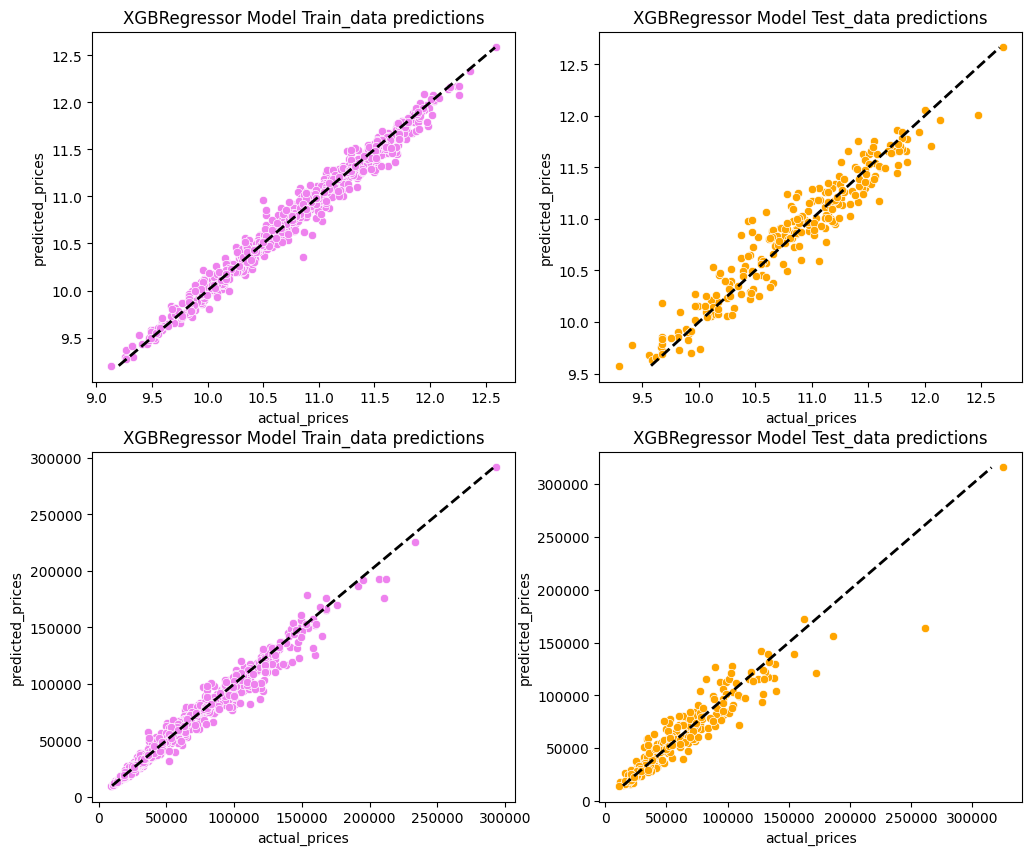

In [154]:
fig = plt.figure(figsize=(12,10))
a = [y_log_train,y_log_train_pred,y_log_test,y_log_test_pred]
b = [y_exp_train,y_exp_train_pred,y_exp_test,y_exp_test_pred]
plot_no = 1
for i in [a,b]:
    ax1 = fig.add_subplot(2,2,plot_no)
    sns.scatterplot(x=i[0],y=i[1],ax=ax1,color = 'violet')
    sns.lineplot(x=[i[1].min(),i[1].max()],y=[i[1].min(),i[1].max()],color = 'black',ls='--',lw=2,ax = ax1)
    ax1.set_xlabel('actual_prices')
    ax1.set_ylabel('predicted_prices')
    ax1.set_title(f'XGBRegressor Model Train_data predictions')
    ax2 = fig.add_subplot(2,2,plot_no+1)
    sns.scatterplot(x=i[2],y=i[3],ax=ax2,color = 'orange')
    sns.lineplot(x=[i[3].min(),i[3].max()],y=[i[3].min(),i[3].max()],color = 'black',ls = '--',lw = 2,ax = ax2)
    ax2.set_xlabel('actual_prices')
    ax2.set_ylabel('predicted_prices')
    ax2.set_title(f'XGBRegressor Model Test_data predictions')
    plot_no+=2

plt.show()

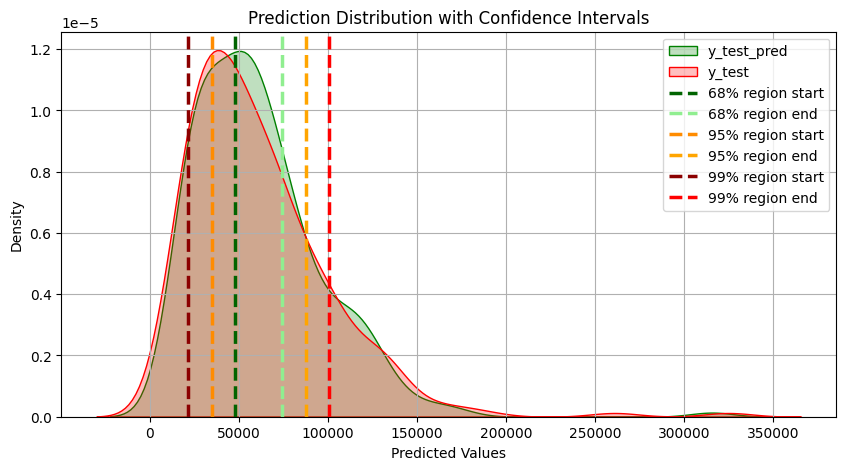

61200.05
48018.11833764287 74381.98322485713
34836.18589403573 87563.91566846427
21654.253450428587 100745.84811207141
 Percent within 1 SD (≈68%): 32.37%
 Percent within 1.645 SD (≈95%): 54.36%
 Percent within 1.926 SD (≈99%): 77.59%


In [155]:
test_rmse = metrics_exp['test_rmse']
# RMSE boundaries
sd_1 = test_rmse
sd_2 = 2 * test_rmse
sd_3 = 3 * test_rmse

# Create the KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data=y_exp_test_pred, color='green', fill=True,label= 'y_test_pred')
sns.kdeplot(data= y_exp_test,color = 'red',fill = True,label = 'y_test')

# Vertical lines for SDs
mean_pred = np.mean(y_exp_test_pred)

# Lines at mean ± sd_1
plt.axvline(x=mean_pred - sd_1, color='darkgreen', linestyle='--', linewidth=2.5, label='68% region start')
plt.axvline(x=mean_pred + sd_1, color='lightgreen', linestyle='--', linewidth=2.5, label='68% region end')
plt.axvline(x=mean_pred - sd_2, color='darkorange', linestyle='--', linewidth=2.5, label='95% region start')
plt.axvline(x=mean_pred + sd_2, color='orange', linestyle='--', linewidth=2.5, label='95% region end')
plt.axvline(x=mean_pred - sd_3, color='darkred', linestyle='--', linewidth=2.5, label='99% region start')
plt.axvline(x=mean_pred + sd_3, color='red', linestyle='--', linewidth=2.5, label='99% region end')


# Plot formatting
# plt.ylim(0, 1.6e-5)
plt.legend()
plt.title("Prediction Distribution with Confidence Intervals")
plt.xlabel("Predicted Values")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# ✅ Now calculate how much data falls within each region
y_1 = np.array(y_exp_test_pred)

# Centered around the median or mean if needed (optional)
mean_pred = np.mean(y_1)
print(mean_pred)
within_1sd = np.mean((y_1 >= mean_pred - sd_1) & (y_1 <= mean_pred + sd_1))
within_2sd = np.mean((y_1 >= mean_pred - sd_2) & (y_1 <= mean_pred + sd_2))
within_3sd = np.mean((y_1 >= mean_pred - sd_3) & (y_1 <= mean_pred + sd_3))
print(mean_pred - sd_1,mean_pred +sd_1)
print(mean_pred - sd_2,mean_pred +sd_2)
print(mean_pred - sd_3,mean_pred +sd_3)


print(f" Percent within 1 SD (≈68%): {within_1sd*100:.2f}%")
print(f" Percent within 1.645 SD (≈95%): {within_2sd*100:.2f}%")
print(f" Percent within 1.926 SD (≈99%): {within_3sd*100:.2f}%")


* for 1sd our model predictions should be greater than 68% but we got only 24% which indicates our model predictions is wider and skewed compared to the actual
* as the disturbution of original y_test also follows  the same as y_pred we can ignore the CI of 68%
AS our model is tree based 
* Predictions may still work, but inference (like CI, p-values) becomes unreliable.

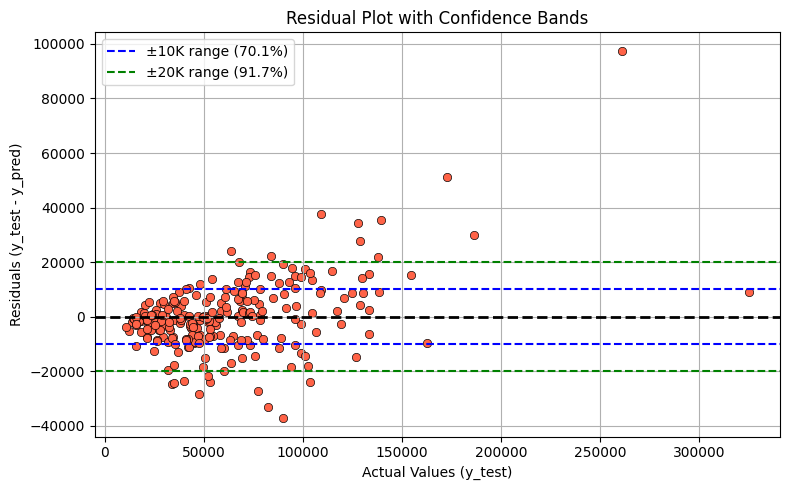

In [156]:
# Residuals
residuals = y_exp_test - y_exp_test_pred

# Compute percentages to plot 
total_points = len(residuals)
within_10k = np.sum((residuals >= -10000) & (residuals <= 10000)) / total_points * 100
within_20k = np.sum((residuals >= -20000) & (residuals <= 20000)) / total_points * 100

# other percentages to therotically understand the behaviour of low and high end laptops 


# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_exp_test, y=residuals, color='tomato', edgecolor='black')
plt.axhline(0, linestyle='--', color='black', linewidth=2)
plt.axhline(-10000, linestyle='--', color='blue', linewidth=1.5, label=f'±10K range ({within_10k:.1f}%)')
plt.axhline(10000, linestyle='--', color='blue', linewidth=1.5)
plt.axhline(-20000, linestyle='--', color='green', linewidth=1.5, label=f'±20K range ({within_20k:.1f}%)')
plt.axhline(20000, linestyle='--', color='green', linewidth=1.5)

plt.title("Residual Plot with Confidence Bands")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals (y_test - y_pred)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#

In [157]:
within_10k_price_below_1L = np.sum(((residuals>=-10000) & (residuals <= 10000) ) & (y_exp_test <=100000))/sum((y_exp_test<100000))
within_20k_price_below_1L = np.sum(((residuals>=-20000) & (residuals <= 20000) ) & (y_exp_test <=100000))/sum((y_exp_test<=100000))
within_10k_price_above_1L = np.sum(((residuals>=-10000) & (residuals <= 10000) ) & (y_exp_test > 100000))/sum((y_exp_test> 100000))
within_20k_price_above_1L = np.sum(((residuals>=-20000) & (residuals <= 20000) ) & (y_exp_test > 100000))/sum((y_exp_test> 100000))

print('The percentage of Low end laptops prediction that has error below 10,000 rs/- is :',round(within_10k_price_below_1L*100,2))
print('The percentage of Low end laptops prediction that has error below 20,000 rs/- is :',round(within_20k_price_below_1L*100,2))
print('The percentage of high end laptops prediction that has error below 10,000 rs/- is :',round(within_10k_price_above_1L*100,2))
print('The percentage of high end laptops prediction that has error below 20,000 rs/- is :',round(within_20k_price_above_1L*100,2))
print('\nThe percentage of Low end laptops prediction that has error above 20,000 rs/- is :',round(100-within_20k_price_below_1L*100,2))
print('The percentage of high end laptops prediction that has error above 20,000 rs/- is :',round(100-within_20k_price_above_1L*100,2))


The percentage of Low end laptops prediction that has error below 10,000 rs/- is : 74.4
The percentage of Low end laptops prediction that has error below 20,000 rs/- is : 94.69
The percentage of high end laptops prediction that has error below 10,000 rs/- is : 44.12
The percentage of high end laptops prediction that has error below 20,000 rs/- is : 73.53

The percentage of Low end laptops prediction that has error above 20,000 rs/- is : 5.31
The percentage of high end laptops prediction that has error above 20,000 rs/- is : 26.47


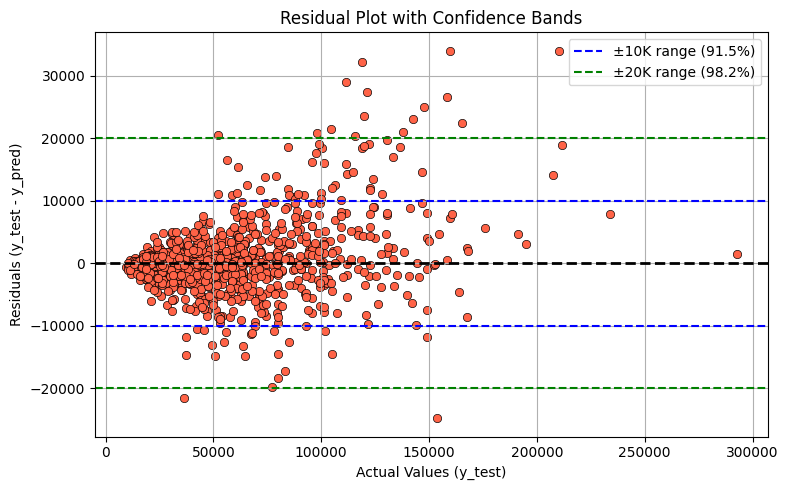

In [158]:
# Residuals
residuals = y_exp_train - y_exp_train_pred

# Compute percentages to plot 
total_points = len(residuals)
within_10k = np.sum((residuals >= -10000) & (residuals <= 10000)) / total_points * 100
within_20k = np.sum((residuals >= -20000) & (residuals <= 20000)) / total_points * 100

# other percentages to therotically understand the behaviour of low and high end laptops 


# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_exp_train, y=residuals, color='tomato', edgecolor='black')
plt.axhline(0, linestyle='--', color='black', linewidth=2)
plt.axhline(-10000, linestyle='--', color='blue', linewidth=1.5, label=f'±10K range ({within_10k:.1f}%)')
plt.axhline(10000, linestyle='--', color='blue', linewidth=1.5)
plt.axhline(-20000, linestyle='--', color='green', linewidth=1.5, label=f'±20K range ({within_20k:.1f}%)')
plt.axhline(20000, linestyle='--', color='green', linewidth=1.5)

plt.title("Residual Plot with Confidence Bands")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Residuals (y_test - y_pred)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#

* Residual increase with higher prices indicating the model struggling with high-end laptop 
* The IQR of the actual prices (32,655-79813) suggests the model sees most data in this mid-range.
* Data scarcity for high priced laptops likely to lead poor generalization in that range.
* The residual spread appears heteroscedastic(variance increases with price) which suggests non-constant prediction error. 
* Despite stratified sampling, the model might need more high-price examples or price-sensitive features to improve performance.



### 3. MODEL INTERPRETATION & FEATURE CONTRIBUTION ANALYSIS

#### A) FEATURE IMPORTANCE

In [159]:
main_model_feature_importance_score = pd.Series(main_model.feature_importances_, index=X_train.columns)
main_model_feature_importance_score = main_model_feature_importance_score.sort_values(ascending=False)
main_model_feature_importance_score

ram               0.273725
ssd               0.166537
typename          0.118226
cpu_common        0.080681
ppi               0.073178
flashstorage      0.048560
clock_speed       0.046961
gpu_common        0.039988
opsys             0.038971
dual_memory       0.026609
company           0.022053
weight            0.018006
inches            0.016445
hdd               0.014578
is_touchscreen    0.012978
hybrid            0.002503
dtype: float32

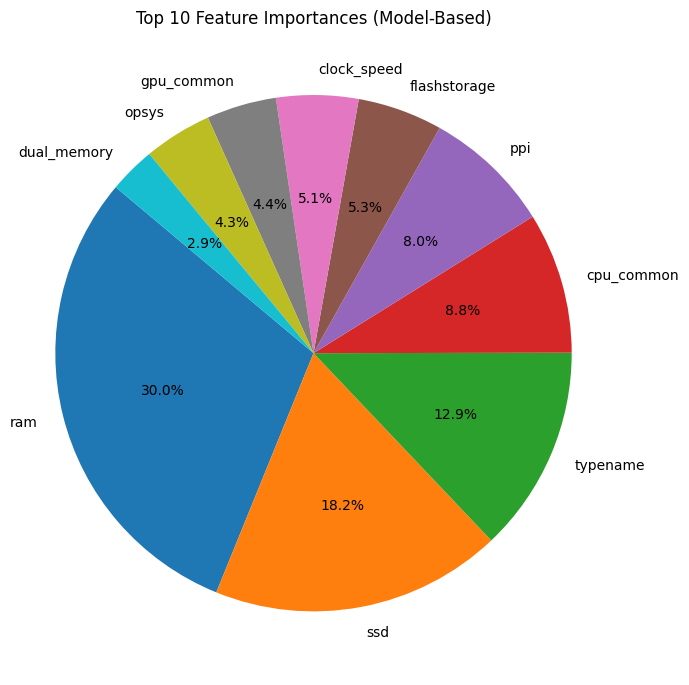

In [160]:


# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(main_model_feature_importance_score[:10], labels=main_model_feature_importance_score.index[:10], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Feature Importances (Model-Based)")
plt.axis('equal')
plt.tight_layout()
plt.show()

#### B) PERMUTATION IMPORTANCE

In [ ]:
print('Model_name:',type(main_model))
perm_result = permutation_importance(main_model, X_train, y_log_train, scoring='r2', n_repeats=10, random_state=42)
perm_importance = pd.Series(perm_result.importances_mean, index=X_train.columns)
perm_importance = perm_importance.sort_values(ascending=False)
print(perm_importance)

Model_name: <class 'xgboost.sklearn.XGBRegressor'>
ram               0.154445
ppi               0.074192
cpu_common        0.071226
ssd               0.065059
clock_speed       0.059134
gpu_common        0.052579
weight            0.051126
opsys             0.029416
typename          0.026422
company           0.021719
inches            0.012122
hdd               0.009449
flashstorage      0.003644
is_touchscreen    0.003171
dual_memory       0.002882
hybrid            0.000171
dtype: float64


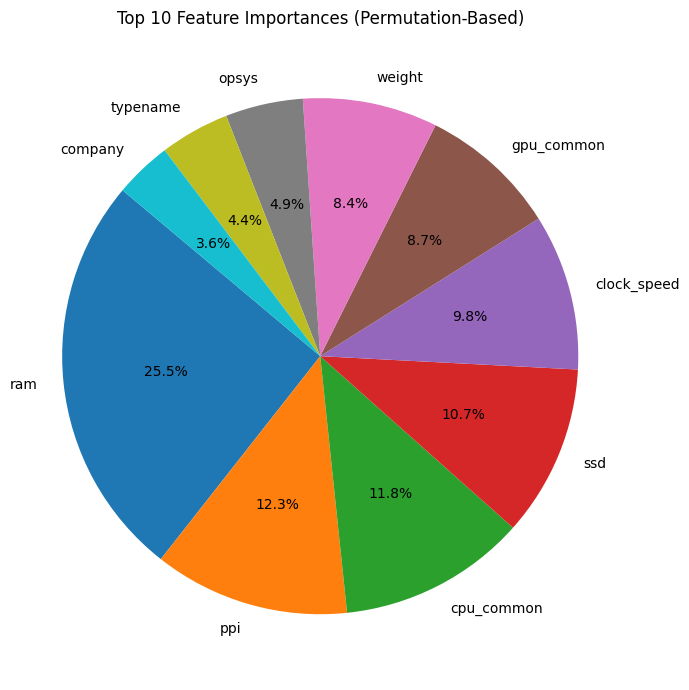

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(perm_importance[:10], labels=perm_importance.index[:10], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Feature Importances (Permutation-Based)")
plt.axis('equal')
plt.tight_layout()
plt.show()

#### C) SHAP ANALYSIS

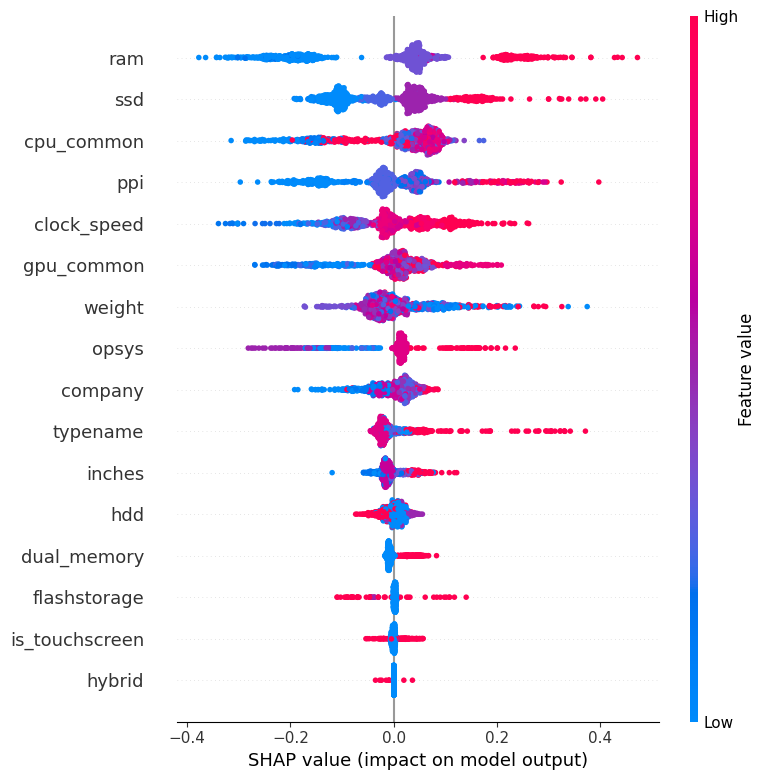

In [ ]:
explainer = shap.Explainer(main_model, X_train)
shap_values = explainer(X_train)

# Plot summary of feature importance
shap.summary_plot(shap_values, X_train)

#### D) PARTIAL DEPENDENCY PLOT

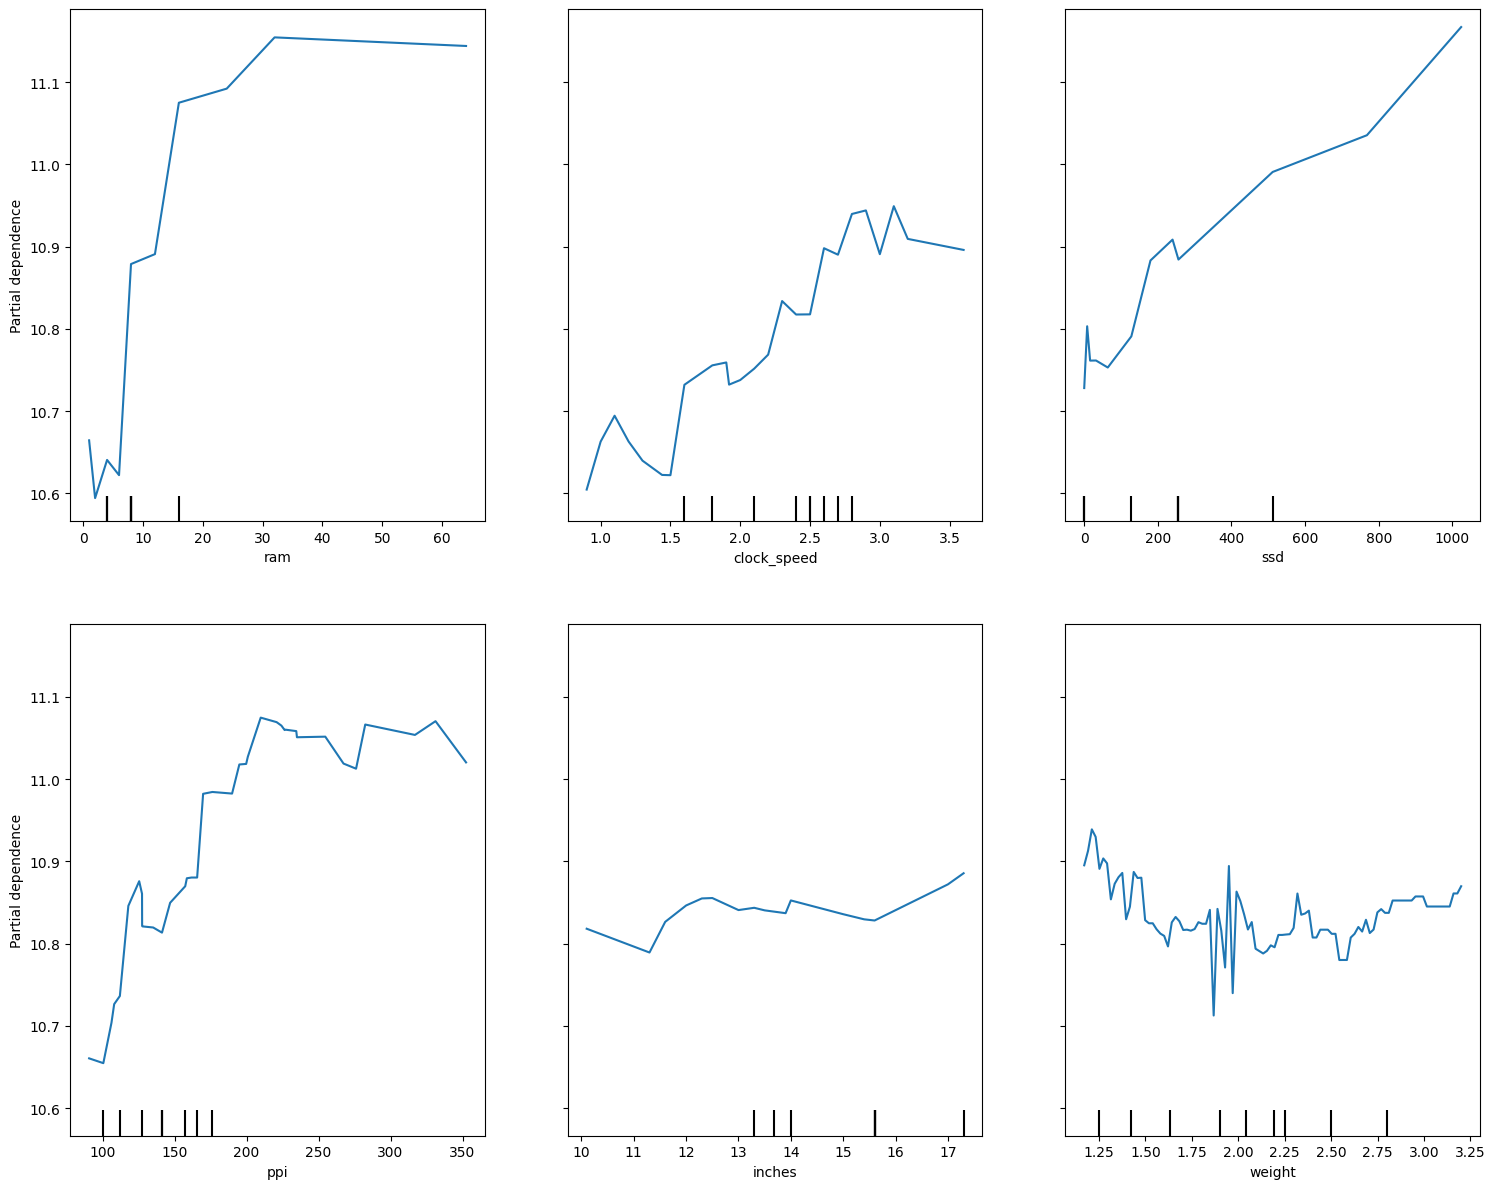

In [ ]:
features_to_plot = ['ram','clock_speed','ssd','ppi','inches','weight']  # list of column names or column indices
fig, ax = plt.subplots(figsize=(15, 12))  
PartialDependenceDisplay.from_estimator(main_model, X_train, features_to_plot, ax=ax)
plt.tight_layout()
plt.show()

#### E) TREE PLOT TO VISUALIZE XGBREGRESSOR MODEL

* NOTE: there are a total of 200 estimators .i.e. we are building 200 Trees for the model 
* we are just visualizing the very first tree out of 200 trees.

In [ ]:

plt.figure(figsize=(20,10),dpi=900)
plot_tree(main_model, num_trees=0, rankdir='LR',ax=plt.gca())
plt.show()
plt.savefig("xgb_tree.png", dpi=900)

<Figure size 640x480 with 0 Axes>

## X. SAVING, LOADING & VERIFYING THE MODEL

### 1. SAVING THE MODEL

In [ ]:
# Saving the main_model encoder
joblib.dump(ordinal_encoding_main, 'encoder_mappings.pkl')
# Saving the main_model
joblib.dump(main_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
# Saving the encoded data frame used for training and testing
pd.concat([X,y_log,y_exp],axis=1).to_csv('encoded_data')

### 2. LOADING THE MODEL

In [ ]:
ordinal_encoding_loaded = joblib.load('encoder_mappings.pkl')

In [ ]:
main_model_loaded = joblib.load('xgb_model.pkl')

In [ ]:
y_log_train_pred = main_model_loaded.predict(X_train)
y_log_test_pred = main_model_loaded.predict(X_test)
# Calculating log Metrics
log_train_mae = mean_absolute_error(y_log_train, y_log_train_pred)
log_test_mae = mean_absolute_error(y_log_test, y_log_test_pred)
log_train_rmse = root_mean_squared_error(y_log_train,y_log_train_pred)
log_test_rmse = root_mean_squared_error(y_log_test, y_log_test_pred)
log_train_r2 = r2_score(y_log_train, y_log_train_pred)
log_test_r2 = r2_score(y_log_test, y_log_test_pred)

print(f"Train MAE: {log_train_mae:.2f}, Test MAE: {log_test_mae:.2f}")
print(f"Train RMSE: {log_train_rmse:.2f}, Test RMSE: {log_test_rmse:.2f}")

print(f"Train R²: {log_train_r2:.2f}, Test R²: {log_test_r2:.2f}")

Train MAE: 0.07, Test MAE: 0.13
Train RMSE: 0.09, Test RMSE: 0.16
Train R²: 0.98, Test R²: 0.92


In [ ]:
y_exp_train_pred,y_exp_test_pred = np.exp(y_log_train_pred),np.exp(y_log_test_pred)
# Calculate Metrics
exp_train_mae = mean_absolute_error(y_exp_train, y_exp_train_pred)
exp_test_mae = mean_absolute_error(y_exp_test, y_exp_test_pred)
exp_train_rmse = root_mean_squared_error(y_exp_train,y_exp_train_pred)
exp_test_rmse = root_mean_squared_error(y_exp_test, y_exp_test_pred)
exp_train_r2 = r2_score(y_exp_train, y_exp_train_pred)
exp_test_r2 = r2_score(y_exp_test, y_exp_test_pred)

print(f"Train MAE: {exp_train_mae:.2f}, Test MAE: {exp_test_mae:.2f}")
print(f"Train RMSE: {exp_train_rmse:.2f}, Test RMSE: {exp_test_rmse:.2f}")

print(f"Train R²: {exp_train_r2:.2f}, Test R²: {exp_test_r2:.2f}")

Train MAE: 4185.15, Test MAE: 7325.19
Train RMSE: 6419.24, Test RMSE: 10312.96
Train R²: 0.97, Test R²: 0.91


### SAMPLE PREDICTIONS

In [ ]:
def predict_results(model,input_X,y_true = None):
    y_log_pred = model.predict(input_X)
    y_exp_pred = np.exp(y_log_pred)
    if y_true:
        return {'y_pred_log':y_log_pred,
                'y_pred_log_max':y_log_pred+log_test_rmse,'y_pred_log_min':y_log_pred-log_test_rmse,
                'y_pred_org':y_exp_pred,
                'y_pred_org_max':y_exp_pred + exp_test_rmse, 'y_pred_org_min':y_exp_pred - exp_test_rmse,
                'y_true_log':y_true,'y_true_org':np.exp(y_true)}
    else:
        return {'y_pred_log':y_log_pred,
                'y_pred_log_max':y_log_pred+log_test_rmse,'y_pred_log_min':y_log_pred-log_test_rmse,
                'y_pred_org':y_exp_pred,
                'y_pred_org_max':y_exp_pred + exp_test_rmse, 'y_pred_org_min':y_exp_pred - exp_test_rmse}
    

In [ ]:
input_X = np.array(X_test.iloc[15,:].values).reshape(1,-1)
y_true = y_log_test.iloc[15]
print(f'{input_X}')
print(y_true)

[[4.0000e+00 1.0000e+00 5.0000e+00 1.8000e+01 1.8000e+01 8.0000e+00
  1.2800e+02 1.0240e+03 0.0000e+00 0.0000e+00 1.0000e+00 1.5600e+01
  2.8242e+02 0.0000e+00 2.6200e+00 2.8000e+00]]
11.2874471903093


In [ ]:
ordinal_encoding_loaded.inverse_transform(np.array([input_X[0,:5]]))

array([['Dell', 'Gaming', 'Windows 10', 'Intel Core i7 7700HQ 2.8GHz',
        'Nvidia GeForce GTX 1050 Ti']], dtype=object)

In [ ]:
X_test.iloc[:1,:5]

company  typename  opsys  cpu_common  gpu_common
641      4.0       3.0    5.0        19.0         1.0

In [ ]:
print('predicted_results :')
result_metrics = predict_results(input_X=input_X,model=main_model_loaded,y_true = y_true)
for k,v in result_metrics.items():
    print(k,':',v)


predicted_results :
y_pred_log : [11.258861]
y_pred_log_max : [11.423545]
y_pred_log_min : [11.094176]
y_pred_org : [77564.15]
y_pred_org_max : [87877.11]
y_pred_org_min : [67251.19]
y_true_log : 11.2874471903093
y_true_org : 79813.44000000006


company - a list of 19 values 
typename - a list of 6 values 
opsys - a list of  9 values 
cpu_common - a list of 23 values 
gpu_common - a list of 25 values

ram - a list of 10 values 
dual_memory - a bool 
select_memory_type - 4 values ssd,hdd,flashstorage,hybrid (select 4 or 1 depending upon dual_memory)
the selected_memory_type should have input fields to enter the memory size 

screen-inches - min 10, max 18 
screen_width - int_input_field (a common examples 1366,1600,1920, 2560, 3200, 3840)
screen_height - int_input_field (a common examples 768,900, 1440, 1080, 1900, 2160)
is_touchscreen - a bool 
weight = min 1 to max 5 
clock speed - this input field should only be accepted if other is selected in cpu_common column


In [ ]:
X_train.columns

Index(['company', 'typename', 'opsys', 'cpu_common', 'gpu_common', 'ram',
       'ssd', 'hdd', 'flashstorage', 'hybrid', 'dual_memory', 'inches', 'ppi',
       'is_touchscreen', 'weight', 'clock_speed'],
      dtype='object')

# INTERFACE DESIGN

In [ ]:
def generate_model_input(*inputs,oe_encoder=ordinal_encoding_loaded):
    
    # Unpacking inputs
    (company, typename, opsys, cpu, gpu, 
    ram, dual_memory, memory1, memory1_size, memory2, memory2_size, 
    screen_inches, is_touchscreen, weight, 
    optional,screen_height, screen_width,clock_speed) = inputs

    # Extracting clock_speed early from the input
    if cpu != 'other':
        clock_speed = float(re.search(r'([\d\.]+)GHz',cpu).group(1))

    # Confiramtion message for inputs
    user_input = f"""### ✅ INPUT PARAMETERS SYSTEM ACCEPTED:\n
    **Company:** {company}  |  **Typename:** {typename}  |  **OpSys:** {opsys}  |  \
    **CPU:** {cpu}  |  **GPU:** {gpu}  |  **RAM:** {ram} GB  |  \
    **Primary Storage:** {memory1} ({memory1_size} GB)  |  **Secondary Storage:** {memory2} ({memory2_size} GB)  |  \
    **Dual Memory:** {dual_memory}  |  **Touchscreen:** {is_touchscreen}  |  **Screen Inches:** {screen_inches}  |  \
    **Weight:** {weight} kg  |  **Optionals:** {optional}  |  **Clock Speed:** {clock_speed} GHz  |  \
    **Screen Height:** {screen_height} px  |  **Screen Width:** {screen_width} px
    
    ---
    """


    #adjusting memory column
    memory = {'ssd':0,'hdd':0,'hybrid':0,'flashstorage':0}
    memory[memory1] = memory.get(memory1,0) + memory1_size
    if dual_memory:
        memory[memory2] = memory.get(memory2,0) + memory2_size 

    ppi = round((((screen_height**2)+(screen_width**2))**0.5)/screen_inches,2)
    
    num_cols = {'ram':ram,'inches':screen_inches,'clock_speed':clock_speed,'is_touchscreen':float(is_touchscreen),'ppi':ppi,
                'weight':weight,'dual_memory':float(dual_memory)}
    num_cols = {**num_cols,**memory}
    cat_df = pd.DataFrame([{'company':company,'typename':typename,'opsys':opsys,'cpu_common':cpu,'gpu_common':gpu}])
    num_df = pd.DataFrame([num_cols])
    oe_arr = oe_encoder.transform(cat_df)
    oe_df = pd.DataFrame(oe_arr,columns = cat_df.columns)
    input_df = pd.concat([oe_df,num_df],axis =1)
    # arranging in order
    input_df = input_df[X_train.columns]
    return user_input , input_df

In [ ]:
def predictions(input_df,model,avg_error): 
    y_pred_log = model.predict(input_df)
    # y_pred is in log scale converting back to original scale 
    predicted_price = np.exp(y_pred_log)[0]
    minimum_price = predicted_price - avg_error 
    maximum_price = predicted_price + avg_error 
    output_message = f"""**The predicted laptop price is ₹{float(predicted_price):.2f}**
    --

    Based on the model's average prediction error of ₹{avg_error:.2f}, the estimated price ranges are:

    - **70% Confidence Interval:** ₹{minimum_price:.2f} to ₹{maximum_price:.2f}  
    - **95% Confidence Interval:** ₹{(minimum_price - 0.96 * avg_error):.2f} to ₹{(maximum_price + 0.96 * avg_error):.2f}

    ⚠️ **Note:** For high-end laptops (price > ₹100,000), the confidence level may drop:
    - From ~70% to ~40% within ±1 standard error  
    - From ~95% to ~75% within ±2 standard errors

    ---
    """
    
    return y_pred_log,predicted_price,output_message

In [ ]:
def gradio_logic(*inputs,model=main_model_loaded,oe_encoder=ordinal_encoding_loaded,avg_error=exp_test_rmse):
    input_message,input_df = generate_model_input(oe_encoder = oe_encoder,*inputs)
    input_dict = input_df.iloc[0].to_dict()
    model_input_message = f"""### ✅ INPUT FEATUES FED TO MODEL (EXTRACTED FROM USER INPUT):

    **Company:** {input_dict['company']}  |  **Typename:** {input_dict['typename']}  |  **OpSys:** {input_dict['opsys']}  |  \
    **CPU:** {input_dict['cpu_common']}  |  **GPU:** {input_dict['gpu_common']}  |  **RAM:** {input_dict['ram']} GB  |  \
    **SSD:** {input_dict['ssd']} (GB)  |  **HDD:** {input_dict['hdd']} (GB)  |  **flashstorage:** {input_dict['flashstorage']} (GB)  |  \
    **hybrid:** {input_dict['hybrid']} (GB)  |  **Dual Memory:** {input_dict['dual_memory']}  |  \
    **Touchscreen:** {input_dict['is_touchscreen']}  |  **Screen Inches:** {input_dict['inches']}  |  \
    **PPI:** {input_dict['ppi']}  |  **Weight:** {input_dict['weight']} kg  |  **Clock Speed:** {input_dict['clock_speed']} GHz
    
    ---
    """


    y_pred_log,predicted_price,output_message = predictions(input_df =input_df,model = model,avg_error=avg_error)    
    return output_message, input_message, model_input_message, 

In [ ]:
# /* Main Container */
# .gradio-container {
#     max-width: 900px;
#     margin: 40px auto;
#     padding: 30px;
#     background-color: #1e1e1e;
#     border-radius: 12px;
#     box-shadow: 0 0 15px rgba(255, 255, 255, 0.1);
# }

In [ ]:


company_list = sorted(df['company'].unique().tolist())
typename_list = df['typename'].unique().tolist()
opsys_list = df['opsys'].unique().tolist()
cpu_list = sorted(df['cpu_common'].unique().tolist())
gpu_list = sorted(df['gpu_common'].unique().tolist())
ram_list = sorted(df['ram'].unique().tolist())

memory_types = ["ssd", "hdd", "flashstorage", "hybrid"]




with gr.Blocks(theme = gr.themes.Citrus(spacing_size='sm', radius_size='lg', text_size='lg')) as demo:
    gr.Markdown("## 🧠 Laptop Configuration Prediction")

    with gr.Row(equal_height=True):
        with gr.Column(scale=2):
            company = gr.Dropdown(choices=company_list, label="Company",value = 'HP',info = "(default 'HP')")
            cpu = gr.Dropdown(choices = cpu_list,label = 'CPU',value = 'other',info = "(default 'other')")
            gpu = gr.Dropdown(choices = gpu_list,label = 'GPU',value = 'other',info = "(default 'other')")
            with gr.Row():
                memory1 = gr.Dropdown(choices=memory_types, label="Hard Drive 1",value = 'ssd',info = " (default 'SSD')")
                memory1_size = gr.Number(label="Memory Size 1 (in GB) (default 256GB)", precision=0,value = 256,
                                        info = "common examples: 256,512,1024,2048")
                



        with gr.Column(scale=3):
            typename = gr.Radio(choices=typename_list, label="Type",value = 'Notebook',info = "(default 'Notebook')")
            opsys = gr.Radio(choices = opsys_list,label = 'OpSys',value = 'Windows 10',info = "(default 'Windows 10)")
            ram = gr.Radio (choices = ram_list,label = 'RAM(GB)',value = 8,info = "(default 8GB)")

            with gr.Row():
                screen_inches = gr.Number(label="Screen Inches (default 15.6)",value = 15.6, precision=1)
                weight = gr.Number(label = "Weight (kg) (default 2.2 kg) ",value = 2.2,precision = 1,
                                   info = "(min 1kg else default value is accepted)")
    with gr.Row():
        dual_memory = gr.Checkbox(label="Enable Dual Memory")
        is_touchscreen = gr.Checkbox(label ="Touch Screen")
        optional = gr.Checkbox(label = 'Optionals (Screen Width, Screen Height, Clock Speed)',)
    with gr.Row():
        memory2 = gr.Dropdown(choices=memory_types, label="Hard Drive 2", value = 'ssd',info = "(default 'SSD')" ,visible=False)
        memory2_size = gr.Number(label="Memory Size 2 (in GB) (default 0 GB)", precision=0,value = 0, visible=False,
                                    info = "common examples: 256,512,1024,2048")
        screen_height = gr.Number(label ='Screen Height (default 1920)',value = 1920,precision =0,visible = False,
                                info = "*(Common examples: 1366, 1600, 1920, 2560, 3200, 3840)*")
        screen_width = gr.Number(label ='Screen Width (default 1080)',value = 1080,precision =0,visible = False,
                                info = "*(Common examples: 768, 900, 1440, 1080, 1900, 2160))*")
        clock_speed = gr.Number(label = "Clock Speed (default 2.8GHz for 'other' in cpu)",value = 2.8,precision = 1,visible = False,
                                info =("only enter the data if you select other in cpu else clock_speed is extracted from cpu input"))
    with gr.Row():
        submit_btn = gr.Button("Predict")
    with gr.Row():
        with gr.Column(scale=1):
            output_1 = gr.Markdown(label="input variables")
            output_2 = gr.Markdown(label ="Dataframe formed")
            output_3 = gr.Markdown(label = "predictions")

    def toggle_dual_memory(show):
        return {
            memory2: gr.update(visible=show),
            memory2_size: gr.update(visible=show),
        }
    def toggle_optional(show):
        return{
            screen_height: gr.update(visible = show),
            screen_width: gr.update(visible = show),
            clock_speed: gr.update(visible = show),
        }

    dual_memory.change(fn=toggle_dual_memory, inputs=dual_memory, outputs=[memory2, memory2_size])
    optional.change(fn = toggle_optional, inputs = optional, outputs = [screen_width,screen_height,clock_speed])
    submit_btn.click(fn=gradio_logic,
                     inputs=[company, typename, opsys, cpu, gpu, 
                             ram, dual_memory, memory1, memory1_size, memory2, memory2_size, 
                             screen_inches, is_touchscreen, weight, 
                             optional,screen_height, screen_width,clock_speed],
                     outputs=[output_1,output_2,output_3])
demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
